# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data 
science libraries in an attempt to build a machine learning model capable of
predicting whether or not someone has heart disease based on their 
medical attributes

we're going to take the following approach:
1. problem definition
2. data
3. evaluation
4. features
5. modelling
6. hyperparameter tuning
7. deep evaluation
   
## 1. Problem definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.

https://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in the data.

**Create data dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


# Preparing the tools

We're going to use pandas, Matplotlib and Numpy for data analysis and manipulation

In [2]:
# Import all the tools we need
import os 
import sys

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Skicit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# To save the model
import pickle

In [3]:
# Load data
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# Data Exploration (EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset we're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Let's find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

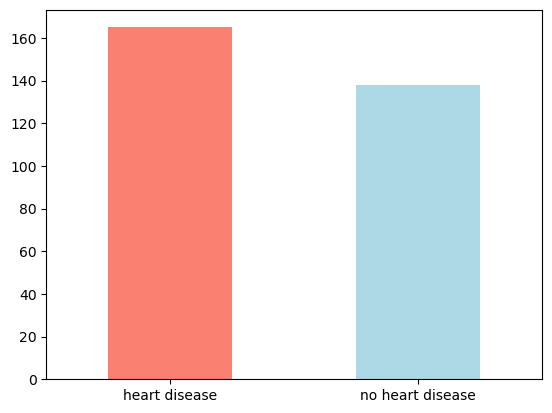

In [6]:
ax = df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
ax.set_xticklabels(["heart disease", "no heart disease"], rotation = 0);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [10]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
ct = pd.crosstab(df.target, df.sex)
ct

sex,0,1
target,,
0,24,114
1,72,93


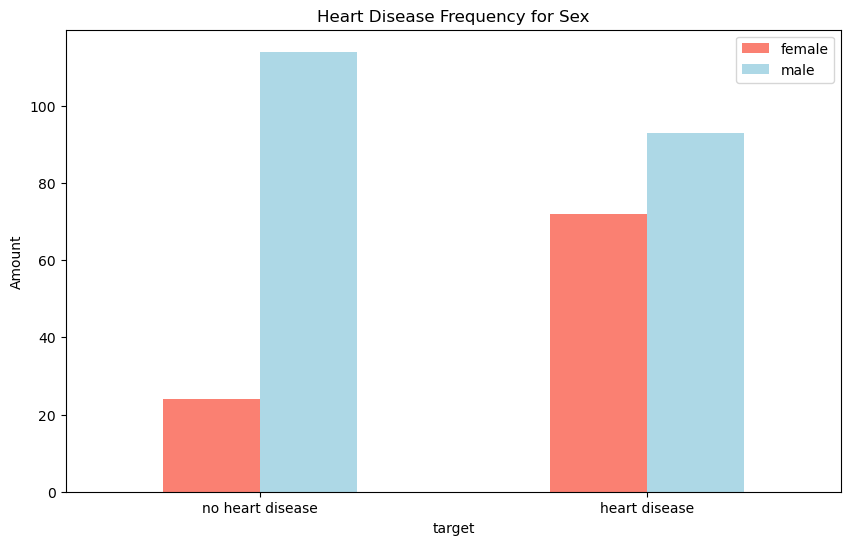

In [12]:
ct.plot.bar(figsize=(10, 6),
           color=["salmon", "lightblue"])
plt.xticks([0, 1], labels=["no heart disease", "heart disease"], rotation=0)
plt.legend(["female", "male"])
plt.title("Heart Disease Frequency for Sex")
plt.ylabel("Amount");

### Age vs. Max Heart rate for heart disease

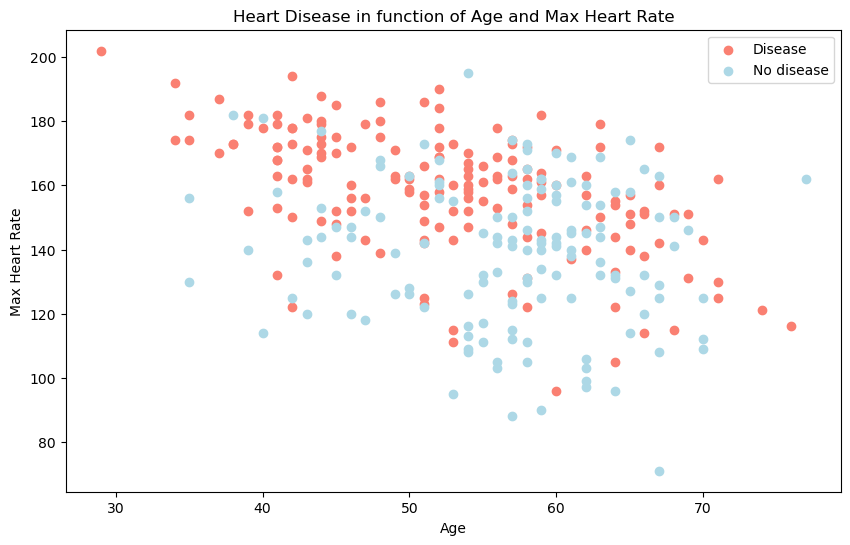

In [13]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target ==0],
            df.thalach[df.target==0],
            c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"])

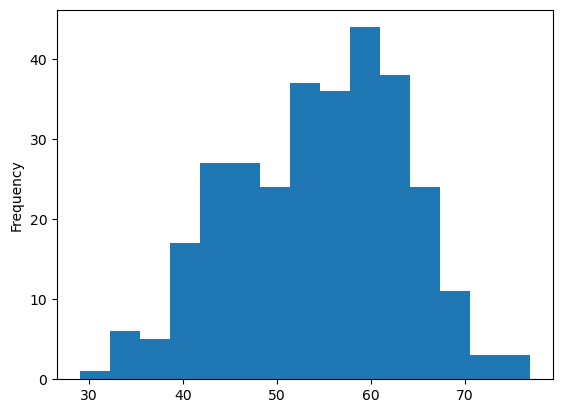

In [14]:
# Check the distribution of the age column with a histogram
df["age"].plot.hist(bins=15);

### Heart Disease Frequency per Chest Pain type


In [15]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


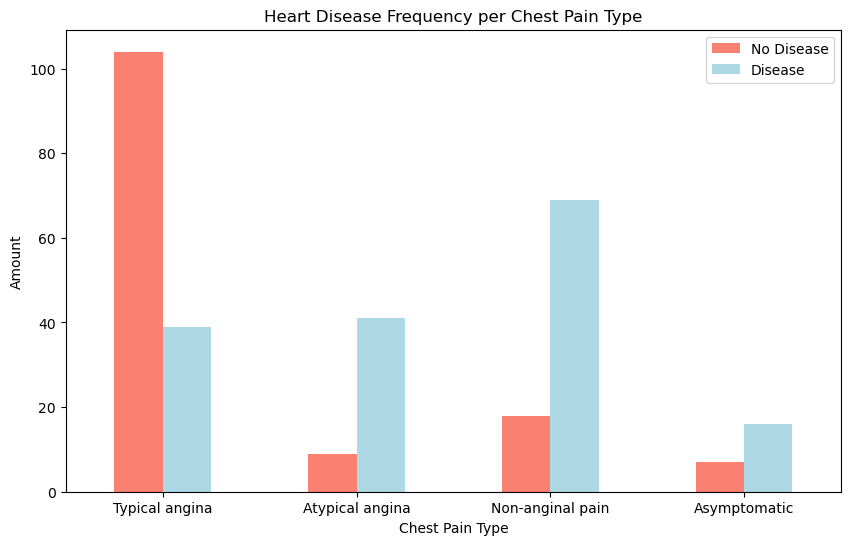

In [16]:
# Make crosstab more visual
pd.crosstab(df["cp"], df["target"]).plot.bar(figsize=(10, 6),
                                             color =["salmon", "lightblue"])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks([0,1,2,3],
           ["Typical angina","Atypical angina", "Non-anginal pain","Asymptomatic"],
           rotation=0);

### Correlation between features and target

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


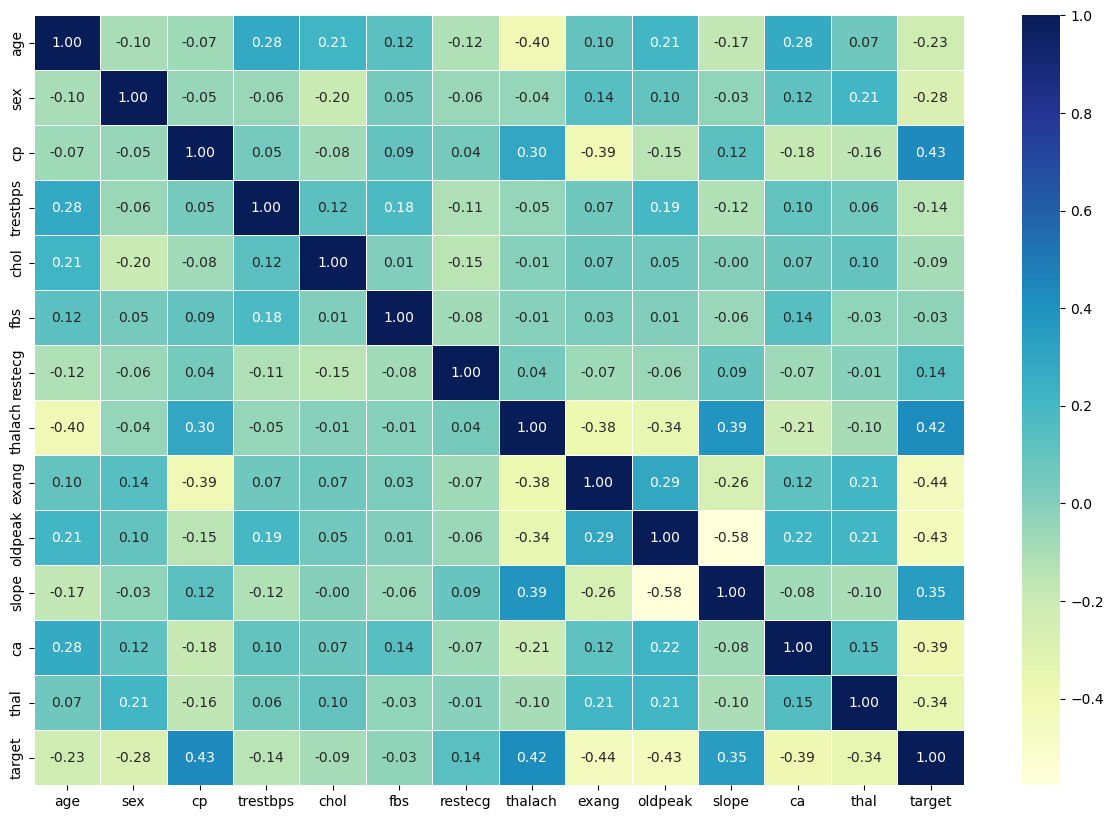

In [19]:
corr_matrix= df.corr()
fig, ax = plt. subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## 5. Modelling 

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split data into X and Y
x = df.drop("target", axis=1)
y = df["target"]

In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# Split data into train and test sets
np.random.seed(2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


Now we've got our data split into train and test sets, it's time to build a machine learning model.

We'll train it on the training set and test it on the test set.

We're going to try 6 different machine learning models:
  1. Logistic Regression
  2. KNeighborsClassifier
  3. RandomForestClassifier
  4. XGBClassifier
  5. GaussianNB
  6. CatBoostClassifier
  

In [24]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNeighbors": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGB Classifier": XGBClassifier(),
          "GaussianNB": GaussianNB(),
          "CatBoost Classifier": CatBoostClassifier(verbose=False)}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates the given machine learning models. 
    models: a dict of different Scikit-Learn machine learning models
    """
    # Set a random seed
    np.random.seed(2)
    
    model_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models, 
                             x_train,
                             x_test, 
                             y_train,
                             y_test)
model_scores

C:\Users\nigar\Documents\Programming\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'KNeighbors': 0.7049180327868853,
 'Random Forest': 0.9016393442622951,
 'XGB Classifier': 0.8524590163934426,
 'GaussianNB': 0.8852459016393442,
 'CatBoost Classifier': 0.8852459016393442}

### Model Comparison

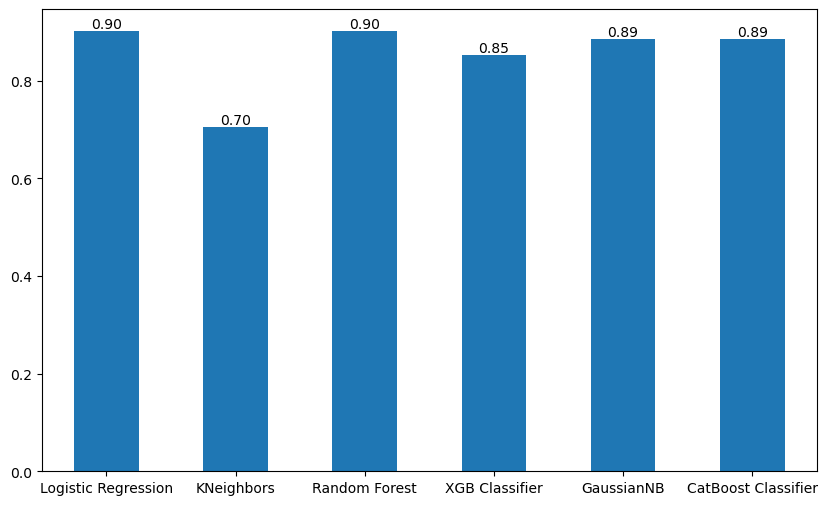

In [26]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
ax = model_compare.T.plot.bar(legend=False, figsize=(10, 6))
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], fmt='%.2f');

Let's look at the following:
   * Hyperparameter tuning
   * Feature importance
   * Confusion matrix
   * Cross-validation
   * Precision
   * Recall
   * F1 score
   * Classification report
   * ROC curve
   * Area under the curve (AUC)
   
### Hyperparameter tuning by hand (not recommended)

In [27]:
train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [28]:
train_scores

[1.0,
 0.7892561983471075,
 0.7396694214876033,
 0.7355371900826446,
 0.7396694214876033,
 0.7396694214876033,
 0.7231404958677686,
 0.7107438016528925,
 0.7066115702479339,
 0.6900826446280992,
 0.7107438016528925,
 0.6983471074380165,
 0.7066115702479339,
 0.7024793388429752,
 0.6859504132231405,
 0.6735537190082644,
 0.6900826446280992,
 0.6735537190082644,
 0.6818181818181818,
 0.6735537190082644]

In [29]:
test_scores

[0.6065573770491803,
 0.639344262295082,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885]

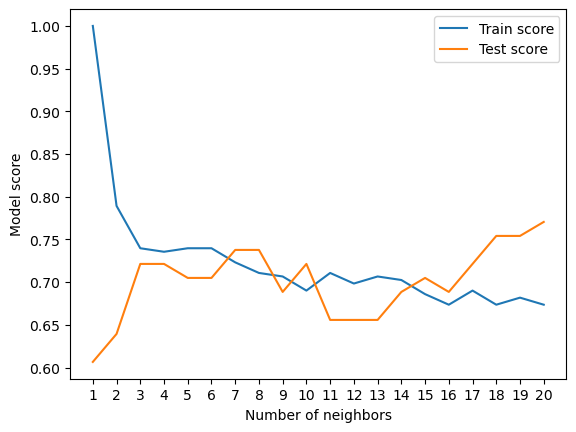

In [30]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

In [31]:
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Maximum KNN score on the test data: 77.05%


1) As we can see, even after the tuning KNN is yet enough far from the wanted accuracy score which means we can eliminate it for this project.

2) And a better way of tuning the hyperparameters would be using RandomizedSearchCV
rather than tuning it with our hand for every parameter which would be quite tedious.

# 6. Hyperparameter tuning with RandomizedSearchCV and GridSearchCV



We're going to tune:
* LogisticRegression()
* RandomForestClassifier()
* GaussianNB()
* CatBoostClassifier()

... using RandomizedSearchCV since they were the highest on accuracy

In [32]:
def Model_tuner(tuner, model, params):

    if tuner == RandomizedSearchCV:
        # Suppress output by redirecting stdout to a null device
        sys.stdout = open(os.devnull, 'w')
        np.random.seed(45)
        clf = tuner(model(),
                    param_distributions=params,
                    cv=5,
                    n_iter=20,
                    verbose=False)
        # Restore stdout
        sys.stdout = sys.__stdout__
    elif tuner == GridSearchCV:
        
        clf = tuner(model(),
                    param_grid=params,
                    cv=5,
                    verbose=False)
        
    return clf
        

In [33]:
# Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-10,10,100),
                "penalty": ["l1","l2"],
                "solver": ["liblinear"],
                "max_iter": [3000]}

# Hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(280, 310, 10),
           "max_depth": [4],
           "min_samples_split": [ 1, 2],
           "min_samples_leaf": [26,27]}

# Hyperparameter grid for GaussianNB
nb_grid = {'var_smoothing': np.logspace(-4,-5, num=100)}

# Hyperparameter grid for CatBoost
cat_grid = { "iterations": np.arange(300,600,20),
            "learning_rate": np.logspace(-1,-3, num=10),
            "max_depth": [3,4,5]}

In [34]:
r_logreg = Model_tuner(GridSearchCV, LogisticRegression, log_reg_grid)
r_ranfor = Model_tuner(RandomizedSearchCV, RandomForestClassifier, rf_grid)
r_nb = Model_tuner(GridSearchCV, GaussianNB, nb_grid)
r_cat = Model_tuner(RandomizedSearchCV, CatBoostClassifier, cat_grid)

0:	learn: 0.6920896	total: 1.5ms	remaining: 627ms
1:	learn: 0.6912080	total: 2.89ms	remaining: 605ms
2:	learn: 0.6904807	total: 4ms	remaining: 556ms
3:	learn: 0.6895627	total: 5.13ms	remaining: 534ms
4:	learn: 0.6886301	total: 6.17ms	remaining: 512ms
5:	learn: 0.6874216	total: 7.21ms	remaining: 497ms
6:	learn: 0.6865383	total: 8.24ms	remaining: 486ms
7:	learn: 0.6854266	total: 9.27ms	remaining: 477ms
8:	learn: 0.6845627	total: 10.3ms	remaining: 471ms
9:	learn: 0.6835293	total: 11.3ms	remaining: 465ms
10:	learn: 0.6827006	total: 12.4ms	remaining: 460ms
11:	learn: 0.6818501	total: 13.4ms	remaining: 456ms
12:	learn: 0.6808594	total: 14.7ms	remaining: 459ms
13:	learn: 0.6797157	total: 15.9ms	remaining: 461ms
14:	learn: 0.6785783	total: 17ms	remaining: 458ms
15:	learn: 0.6776736	total: 18ms	remaining: 454ms
16:	learn: 0.6765490	total: 19ms	remaining: 451ms
17:	learn: 0.6754160	total: 20.1ms	remaining: 448ms
18:	learn: 0.6746233	total: 21.1ms	remaining: 445ms
19:	learn: 0.6734872	total: 22.1

180:	learn: 0.5547106	total: 192ms	remaining: 254ms
181:	learn: 0.5538844	total: 193ms	remaining: 253ms
182:	learn: 0.5532400	total: 195ms	remaining: 252ms
183:	learn: 0.5525154	total: 196ms	remaining: 251ms
184:	learn: 0.5517335	total: 197ms	remaining: 250ms
185:	learn: 0.5509852	total: 198ms	remaining: 250ms
186:	learn: 0.5503630	total: 200ms	remaining: 249ms
187:	learn: 0.5498106	total: 201ms	remaining: 248ms
188:	learn: 0.5490301	total: 202ms	remaining: 247ms
189:	learn: 0.5481656	total: 203ms	remaining: 246ms
190:	learn: 0.5478222	total: 205ms	remaining: 245ms
191:	learn: 0.5472103	total: 206ms	remaining: 244ms
192:	learn: 0.5469349	total: 207ms	remaining: 243ms
193:	learn: 0.5462975	total: 208ms	remaining: 243ms
194:	learn: 0.5457854	total: 210ms	remaining: 242ms
195:	learn: 0.5451189	total: 212ms	remaining: 243ms
196:	learn: 0.5443518	total: 213ms	remaining: 242ms
197:	learn: 0.5436677	total: 215ms	remaining: 241ms
198:	learn: 0.5429791	total: 216ms	remaining: 240ms
199:	learn: 

347:	learn: 0.4738609	total: 385ms	remaining: 79.7ms
348:	learn: 0.4735649	total: 387ms	remaining: 78.7ms
349:	learn: 0.4732236	total: 388ms	remaining: 77.6ms
350:	learn: 0.4728022	total: 389ms	remaining: 76.6ms
351:	learn: 0.4725802	total: 390ms	remaining: 75.4ms
352:	learn: 0.4722152	total: 392ms	remaining: 74.3ms
353:	learn: 0.4716203	total: 393ms	remaining: 73.2ms
354:	learn: 0.4711412	total: 394ms	remaining: 72.1ms
355:	learn: 0.4709061	total: 395ms	remaining: 71ms
356:	learn: 0.4703599	total: 396ms	remaining: 69.9ms
357:	learn: 0.4698743	total: 398ms	remaining: 68.9ms
358:	learn: 0.4694742	total: 399ms	remaining: 67.9ms
359:	learn: 0.4691113	total: 401ms	remaining: 66.9ms
360:	learn: 0.4687991	total: 403ms	remaining: 65.8ms
361:	learn: 0.4684130	total: 404ms	remaining: 64.7ms
362:	learn: 0.4678364	total: 405ms	remaining: 63.6ms
363:	learn: 0.4675140	total: 406ms	remaining: 62.5ms
364:	learn: 0.4670803	total: 408ms	remaining: 61.4ms
365:	learn: 0.4668441	total: 409ms	remaining: 60

213:	learn: 0.5237025	total: 279ms	remaining: 268ms
214:	learn: 0.5232477	total: 280ms	remaining: 267ms
215:	learn: 0.5227184	total: 282ms	remaining: 266ms
216:	learn: 0.5225208	total: 282ms	remaining: 264ms
217:	learn: 0.5219792	total: 284ms	remaining: 263ms
218:	learn: 0.5214860	total: 285ms	remaining: 261ms
219:	learn: 0.5208016	total: 286ms	remaining: 260ms
220:	learn: 0.5202918	total: 287ms	remaining: 258ms
221:	learn: 0.5199927	total: 288ms	remaining: 257ms
222:	learn: 0.5193974	total: 289ms	remaining: 255ms
223:	learn: 0.5185745	total: 290ms	remaining: 254ms
224:	learn: 0.5180119	total: 291ms	remaining: 253ms
225:	learn: 0.5174217	total: 293ms	remaining: 251ms
226:	learn: 0.5167114	total: 294ms	remaining: 250ms
227:	learn: 0.5163816	total: 295ms	remaining: 249ms
228:	learn: 0.5158488	total: 297ms	remaining: 247ms
229:	learn: 0.5153627	total: 298ms	remaining: 246ms
230:	learn: 0.5146109	total: 299ms	remaining: 245ms
231:	learn: 0.5139412	total: 301ms	remaining: 244ms
232:	learn: 

382:	learn: 0.4417178	total: 477ms	remaining: 46.1ms
383:	learn: 0.4412524	total: 478ms	remaining: 44.8ms
384:	learn: 0.4408772	total: 480ms	remaining: 43.6ms
385:	learn: 0.4404954	total: 481ms	remaining: 42.4ms
386:	learn: 0.4402338	total: 483ms	remaining: 41.2ms
387:	learn: 0.4398313	total: 484ms	remaining: 39.9ms
388:	learn: 0.4395509	total: 485ms	remaining: 38.6ms
389:	learn: 0.4392379	total: 486ms	remaining: 37.4ms
390:	learn: 0.4389017	total: 488ms	remaining: 36.2ms
391:	learn: 0.4384944	total: 489ms	remaining: 34.9ms
392:	learn: 0.4381082	total: 490ms	remaining: 33.7ms
393:	learn: 0.4378151	total: 492ms	remaining: 32.4ms
394:	learn: 0.4372738	total: 493ms	remaining: 31.2ms
395:	learn: 0.4369801	total: 494ms	remaining: 29.9ms
396:	learn: 0.4366123	total: 495ms	remaining: 28.7ms
397:	learn: 0.4362655	total: 496ms	remaining: 27.4ms
398:	learn: 0.4358842	total: 497ms	remaining: 26.2ms
399:	learn: 0.4355789	total: 498ms	remaining: 24.9ms
400:	learn: 0.4351451	total: 499ms	remaining: 

124:	learn: 0.5778355	total: 132ms	remaining: 312ms
125:	learn: 0.5766202	total: 133ms	remaining: 311ms
126:	learn: 0.5757189	total: 135ms	remaining: 312ms
127:	learn: 0.5749816	total: 137ms	remaining: 312ms
128:	learn: 0.5740805	total: 138ms	remaining: 312ms
129:	learn: 0.5734250	total: 140ms	remaining: 312ms
130:	learn: 0.5726126	total: 141ms	remaining: 312ms
131:	learn: 0.5718564	total: 143ms	remaining: 311ms
132:	learn: 0.5710024	total: 144ms	remaining: 311ms
133:	learn: 0.5703512	total: 145ms	remaining: 310ms
134:	learn: 0.5697107	total: 146ms	remaining: 309ms
135:	learn: 0.5690417	total: 147ms	remaining: 308ms
136:	learn: 0.5686628	total: 149ms	remaining: 307ms
137:	learn: 0.5681643	total: 150ms	remaining: 306ms
138:	learn: 0.5675444	total: 151ms	remaining: 304ms
139:	learn: 0.5670113	total: 152ms	remaining: 304ms
140:	learn: 0.5663721	total: 153ms	remaining: 302ms
141:	learn: 0.5654688	total: 154ms	remaining: 301ms
142:	learn: 0.5649326	total: 155ms	remaining: 300ms
143:	learn: 

290:	learn: 0.4777868	total: 323ms	remaining: 143ms
291:	learn: 0.4774275	total: 324ms	remaining: 142ms
292:	learn: 0.4771271	total: 325ms	remaining: 141ms
293:	learn: 0.4768416	total: 326ms	remaining: 140ms
294:	learn: 0.4763288	total: 328ms	remaining: 139ms
295:	learn: 0.4759156	total: 329ms	remaining: 138ms
296:	learn: 0.4752327	total: 330ms	remaining: 137ms
297:	learn: 0.4745323	total: 331ms	remaining: 135ms
298:	learn: 0.4740847	total: 332ms	remaining: 134ms
299:	learn: 0.4738593	total: 333ms	remaining: 133ms
300:	learn: 0.4734393	total: 334ms	remaining: 132ms
301:	learn: 0.4731638	total: 335ms	remaining: 131ms
302:	learn: 0.4726663	total: 337ms	remaining: 130ms
303:	learn: 0.4722172	total: 338ms	remaining: 129ms
304:	learn: 0.4718606	total: 339ms	remaining: 128ms
305:	learn: 0.4714272	total: 341ms	remaining: 127ms
306:	learn: 0.4708763	total: 342ms	remaining: 126ms
307:	learn: 0.4702421	total: 343ms	remaining: 125ms
308:	learn: 0.4699023	total: 345ms	remaining: 124ms
309:	learn: 

150:	learn: 0.5699714	total: 202ms	remaining: 361ms
151:	learn: 0.5692801	total: 204ms	remaining: 359ms
152:	learn: 0.5686969	total: 205ms	remaining: 357ms
153:	learn: 0.5678691	total: 206ms	remaining: 356ms
154:	learn: 0.5670322	total: 207ms	remaining: 354ms
155:	learn: 0.5663654	total: 208ms	remaining: 352ms
156:	learn: 0.5657734	total: 209ms	remaining: 350ms
157:	learn: 0.5650756	total: 210ms	remaining: 348ms
158:	learn: 0.5645102	total: 211ms	remaining: 347ms
159:	learn: 0.5637589	total: 212ms	remaining: 345ms
160:	learn: 0.5629913	total: 213ms	remaining: 343ms
161:	learn: 0.5624687	total: 214ms	remaining: 341ms
162:	learn: 0.5616585	total: 216ms	remaining: 340ms
163:	learn: 0.5610562	total: 217ms	remaining: 339ms
164:	learn: 0.5604245	total: 218ms	remaining: 337ms
165:	learn: 0.5597423	total: 220ms	remaining: 336ms
166:	learn: 0.5590586	total: 221ms	remaining: 335ms
167:	learn: 0.5583401	total: 222ms	remaining: 333ms
168:	learn: 0.5577756	total: 224ms	remaining: 332ms
169:	learn: 

328:	learn: 0.4766508	total: 398ms	remaining: 110ms
329:	learn: 0.4763727	total: 399ms	remaining: 109ms
330:	learn: 0.4760839	total: 400ms	remaining: 108ms
331:	learn: 0.4756404	total: 401ms	remaining: 106ms
332:	learn: 0.4750137	total: 403ms	remaining: 105ms
333:	learn: 0.4745455	total: 404ms	remaining: 104ms
334:	learn: 0.4741917	total: 405ms	remaining: 103ms
335:	learn: 0.4736755	total: 407ms	remaining: 102ms
336:	learn: 0.4732448	total: 408ms	remaining: 100ms
337:	learn: 0.4729269	total: 409ms	remaining: 99.2ms
338:	learn: 0.4725133	total: 411ms	remaining: 98.1ms
339:	learn: 0.4719385	total: 412ms	remaining: 96.9ms
340:	learn: 0.4716401	total: 413ms	remaining: 95.6ms
341:	learn: 0.4712613	total: 414ms	remaining: 94.4ms
342:	learn: 0.4710643	total: 415ms	remaining: 93.1ms
343:	learn: 0.4707687	total: 416ms	remaining: 91.9ms
344:	learn: 0.4703410	total: 417ms	remaining: 90.7ms
345:	learn: 0.4699793	total: 418ms	remaining: 89.4ms
346:	learn: 0.4696055	total: 419ms	remaining: 88.2ms
34

72:	learn: 0.6304496	total: 77.4ms	remaining: 368ms
73:	learn: 0.6297479	total: 78.8ms	remaining: 369ms
74:	learn: 0.6290561	total: 80.3ms	remaining: 369ms
75:	learn: 0.6282786	total: 81.7ms	remaining: 370ms
76:	learn: 0.6274439	total: 83.2ms	remaining: 370ms
77:	learn: 0.6268166	total: 84.4ms	remaining: 370ms
78:	learn: 0.6260453	total: 85.7ms	remaining: 370ms
79:	learn: 0.6250006	total: 87.1ms	remaining: 370ms
80:	learn: 0.6240604	total: 88.5ms	remaining: 370ms
81:	learn: 0.6233084	total: 90ms	remaining: 371ms
82:	learn: 0.6221889	total: 105ms	remaining: 426ms
83:	learn: 0.6214904	total: 106ms	remaining: 424ms
84:	learn: 0.6207909	total: 107ms	remaining: 423ms
85:	learn: 0.6201015	total: 109ms	remaining: 423ms
86:	learn: 0.6193450	total: 110ms	remaining: 421ms
87:	learn: 0.6187696	total: 111ms	remaining: 420ms
88:	learn: 0.6182002	total: 112ms	remaining: 418ms
89:	learn: 0.6174637	total: 114ms	remaining: 417ms
90:	learn: 0.6166503	total: 115ms	remaining: 415ms
91:	learn: 0.6160749	to

357:	learn: 0.4766519	total: 468ms	remaining: 81ms
358:	learn: 0.4765476	total: 469ms	remaining: 79.7ms
359:	learn: 0.4761501	total: 470ms	remaining: 78.3ms
360:	learn: 0.4759008	total: 471ms	remaining: 77ms
361:	learn: 0.4754193	total: 473ms	remaining: 75.7ms
362:	learn: 0.4750833	total: 474ms	remaining: 74.4ms
363:	learn: 0.4746150	total: 475ms	remaining: 73ms
364:	learn: 0.4742926	total: 476ms	remaining: 71.7ms
365:	learn: 0.4739815	total: 477ms	remaining: 70.4ms
366:	learn: 0.4734388	total: 478ms	remaining: 69.1ms
367:	learn: 0.4731411	total: 479ms	remaining: 67.7ms
368:	learn: 0.4729260	total: 480ms	remaining: 66.4ms
369:	learn: 0.4724200	total: 482ms	remaining: 65.1ms
370:	learn: 0.4721732	total: 483ms	remaining: 63.7ms
371:	learn: 0.4717434	total: 484ms	remaining: 62.5ms
372:	learn: 0.4713080	total: 485ms	remaining: 61.2ms
373:	learn: 0.4709888	total: 487ms	remaining: 59.9ms
374:	learn: 0.4706426	total: 488ms	remaining: 58.5ms
375:	learn: 0.4703198	total: 489ms	remaining: 57.2ms

228:	learn: 0.0743156	total: 291ms	remaining: 192ms
229:	learn: 0.0740126	total: 293ms	remaining: 191ms
230:	learn: 0.0735628	total: 295ms	remaining: 190ms
231:	learn: 0.0730190	total: 296ms	remaining: 189ms
232:	learn: 0.0729591	total: 298ms	remaining: 188ms
233:	learn: 0.0726283	total: 299ms	remaining: 187ms
234:	learn: 0.0722532	total: 301ms	remaining: 185ms
235:	learn: 0.0721405	total: 302ms	remaining: 184ms
236:	learn: 0.0712495	total: 303ms	remaining: 183ms
237:	learn: 0.0708222	total: 305ms	remaining: 182ms
238:	learn: 0.0704508	total: 306ms	remaining: 181ms
239:	learn: 0.0703798	total: 307ms	remaining: 179ms
240:	learn: 0.0701102	total: 308ms	remaining: 178ms
241:	learn: 0.0700175	total: 310ms	remaining: 177ms
242:	learn: 0.0699133	total: 311ms	remaining: 175ms
243:	learn: 0.0697250	total: 312ms	remaining: 174ms
244:	learn: 0.0694341	total: 313ms	remaining: 173ms
245:	learn: 0.0690836	total: 314ms	remaining: 171ms
246:	learn: 0.0688424	total: 315ms	remaining: 170ms
247:	learn: 

139:	learn: 0.1251080	total: 193ms	remaining: 330ms
140:	learn: 0.1235521	total: 194ms	remaining: 329ms
141:	learn: 0.1229029	total: 195ms	remaining: 327ms
142:	learn: 0.1222722	total: 197ms	remaining: 326ms
143:	learn: 0.1220068	total: 198ms	remaining: 324ms
144:	learn: 0.1212096	total: 199ms	remaining: 323ms
145:	learn: 0.1209868	total: 201ms	remaining: 321ms
146:	learn: 0.1208637	total: 202ms	remaining: 320ms
147:	learn: 0.1197864	total: 203ms	remaining: 318ms
148:	learn: 0.1181314	total: 204ms	remaining: 317ms
149:	learn: 0.1174028	total: 206ms	remaining: 315ms
150:	learn: 0.1165288	total: 207ms	remaining: 314ms
151:	learn: 0.1159617	total: 208ms	remaining: 313ms
152:	learn: 0.1148455	total: 210ms	remaining: 311ms
153:	learn: 0.1144218	total: 211ms	remaining: 310ms
154:	learn: 0.1136197	total: 213ms	remaining: 309ms
155:	learn: 0.1131937	total: 215ms	remaining: 308ms
156:	learn: 0.1116732	total: 216ms	remaining: 307ms
157:	learn: 0.1115621	total: 217ms	remaining: 305ms
158:	learn: 

18:	learn: 0.4063164	total: 27.1ms	remaining: 515ms
19:	learn: 0.3993604	total: 28.7ms	remaining: 517ms
20:	learn: 0.3929235	total: 30.3ms	remaining: 517ms
21:	learn: 0.3872538	total: 31.7ms	remaining: 517ms
22:	learn: 0.3837078	total: 33.4ms	remaining: 518ms
23:	learn: 0.3759222	total: 34.8ms	remaining: 517ms
24:	learn: 0.3720911	total: 36.4ms	remaining: 517ms
25:	learn: 0.3664117	total: 37.9ms	remaining: 517ms
26:	learn: 0.3603954	total: 39.3ms	remaining: 514ms
27:	learn: 0.3542905	total: 41ms	remaining: 516ms
28:	learn: 0.3485288	total: 42.6ms	remaining: 515ms
29:	learn: 0.3418327	total: 44.2ms	remaining: 516ms
30:	learn: 0.3370046	total: 45.4ms	remaining: 511ms
31:	learn: 0.3337023	total: 46.5ms	remaining: 506ms
32:	learn: 0.3280085	total: 47.7ms	remaining: 501ms
33:	learn: 0.3224700	total: 48.9ms	remaining: 497ms
34:	learn: 0.3171887	total: 50.2ms	remaining: 495ms
35:	learn: 0.3118998	total: 51.6ms	remaining: 493ms
36:	learn: 0.3076532	total: 52.8ms	remaining: 489ms
37:	learn: 0.3

186:	learn: 0.1079287	total: 230ms	remaining: 238ms
187:	learn: 0.1072973	total: 231ms	remaining: 236ms
188:	learn: 0.1066384	total: 233ms	remaining: 235ms
189:	learn: 0.1058867	total: 235ms	remaining: 235ms
190:	learn: 0.1054304	total: 236ms	remaining: 234ms
191:	learn: 0.1047959	total: 237ms	remaining: 233ms
192:	learn: 0.1041157	total: 239ms	remaining: 232ms
193:	learn: 0.1035463	total: 241ms	remaining: 231ms
194:	learn: 0.1032279	total: 242ms	remaining: 230ms
195:	learn: 0.1025875	total: 244ms	remaining: 229ms
196:	learn: 0.1022385	total: 245ms	remaining: 227ms
197:	learn: 0.1021426	total: 246ms	remaining: 226ms
198:	learn: 0.1019401	total: 247ms	remaining: 225ms
199:	learn: 0.1015791	total: 249ms	remaining: 224ms
200:	learn: 0.1015490	total: 250ms	remaining: 222ms
201:	learn: 0.1014479	total: 251ms	remaining: 221ms
202:	learn: 0.1002518	total: 252ms	remaining: 220ms
203:	learn: 0.0991446	total: 253ms	remaining: 218ms
204:	learn: 0.0979688	total: 254ms	remaining: 217ms
205:	learn: 

81:	learn: 0.2146367	total: 116ms	remaining: 420ms
82:	learn: 0.2123501	total: 117ms	remaining: 418ms
83:	learn: 0.2112801	total: 118ms	remaining: 417ms
84:	learn: 0.2103118	total: 120ms	remaining: 415ms
85:	learn: 0.2082429	total: 121ms	remaining: 413ms
86:	learn: 0.2066204	total: 122ms	remaining: 411ms
87:	learn: 0.2047437	total: 124ms	remaining: 410ms
88:	learn: 0.2020412	total: 125ms	remaining: 408ms
89:	learn: 0.1992251	total: 126ms	remaining: 406ms
90:	learn: 0.1988455	total: 127ms	remaining: 404ms
91:	learn: 0.1967142	total: 128ms	remaining: 402ms
92:	learn: 0.1935911	total: 130ms	remaining: 401ms
93:	learn: 0.1925789	total: 131ms	remaining: 399ms
94:	learn: 0.1913709	total: 133ms	remaining: 398ms
95:	learn: 0.1903112	total: 134ms	remaining: 397ms
96:	learn: 0.1892295	total: 136ms	remaining: 396ms
97:	learn: 0.1880234	total: 137ms	remaining: 394ms
98:	learn: 0.1868015	total: 138ms	remaining: 393ms
99:	learn: 0.1859847	total: 140ms	remaining: 391ms
100:	learn: 0.1851783	total: 14

356:	learn: 0.0420009	total: 513ms	remaining: 33.1ms
357:	learn: 0.0419465	total: 515ms	remaining: 31.6ms
358:	learn: 0.0417006	total: 516ms	remaining: 30.2ms
359:	learn: 0.0416911	total: 518ms	remaining: 28.8ms
360:	learn: 0.0414352	total: 519ms	remaining: 27.3ms
361:	learn: 0.0412073	total: 521ms	remaining: 25.9ms
362:	learn: 0.0408815	total: 523ms	remaining: 24.5ms
363:	learn: 0.0406567	total: 524ms	remaining: 23ms
364:	learn: 0.0404805	total: 526ms	remaining: 21.6ms
365:	learn: 0.0403859	total: 527ms	remaining: 20.2ms
366:	learn: 0.0402441	total: 529ms	remaining: 18.7ms
367:	learn: 0.0402158	total: 530ms	remaining: 17.3ms
368:	learn: 0.0400359	total: 531ms	remaining: 15.8ms
369:	learn: 0.0398592	total: 532ms	remaining: 14.4ms
370:	learn: 0.0394962	total: 533ms	remaining: 12.9ms
371:	learn: 0.0392358	total: 535ms	remaining: 11.5ms
372:	learn: 0.0390046	total: 536ms	remaining: 10.1ms
373:	learn: 0.0388394	total: 537ms	remaining: 8.61ms
374:	learn: 0.0387804	total: 538ms	remaining: 7.

286:	learn: 0.0766768	total: 348ms	remaining: 113ms
287:	learn: 0.0762332	total: 349ms	remaining: 112ms
288:	learn: 0.0757679	total: 351ms	remaining: 110ms
289:	learn: 0.0752219	total: 352ms	remaining: 109ms
290:	learn: 0.0751947	total: 353ms	remaining: 108ms
291:	learn: 0.0749419	total: 354ms	remaining: 107ms
292:	learn: 0.0743383	total: 356ms	remaining: 106ms
293:	learn: 0.0738258	total: 357ms	remaining: 104ms
294:	learn: 0.0735476	total: 358ms	remaining: 103ms
295:	learn: 0.0734976	total: 359ms	remaining: 102ms
296:	learn: 0.0734670	total: 360ms	remaining: 101ms
297:	learn: 0.0728113	total: 362ms	remaining: 99.5ms
298:	learn: 0.0727536	total: 363ms	remaining: 98.3ms
299:	learn: 0.0724666	total: 364ms	remaining: 97.1ms
300:	learn: 0.0724300	total: 366ms	remaining: 96ms
301:	learn: 0.0718478	total: 367ms	remaining: 94.9ms
302:	learn: 0.0712989	total: 369ms	remaining: 93.7ms
303:	learn: 0.0712469	total: 370ms	remaining: 92.6ms
304:	learn: 0.0706724	total: 372ms	remaining: 91.4ms
305:	l

194:	learn: 0.1295899	total: 237ms	remaining: 371ms
195:	learn: 0.1288913	total: 238ms	remaining: 370ms
196:	learn: 0.1284305	total: 239ms	remaining: 368ms
197:	learn: 0.1281105	total: 240ms	remaining: 367ms
198:	learn: 0.1278560	total: 241ms	remaining: 365ms
199:	learn: 0.1277823	total: 243ms	remaining: 364ms
200:	learn: 0.1270865	total: 244ms	remaining: 362ms
201:	learn: 0.1261679	total: 245ms	remaining: 361ms
202:	learn: 0.1251478	total: 246ms	remaining: 360ms
203:	learn: 0.1244356	total: 247ms	remaining: 358ms
204:	learn: 0.1243358	total: 248ms	remaining: 357ms
205:	learn: 0.1234544	total: 249ms	remaining: 355ms
206:	learn: 0.1226239	total: 250ms	remaining: 354ms
207:	learn: 0.1217964	total: 251ms	remaining: 353ms
208:	learn: 0.1211619	total: 252ms	remaining: 351ms
209:	learn: 0.1203672	total: 253ms	remaining: 350ms
210:	learn: 0.1201565	total: 254ms	remaining: 348ms
211:	learn: 0.1200444	total: 255ms	remaining: 347ms
212:	learn: 0.1197883	total: 257ms	remaining: 346ms
213:	learn: 

371:	learn: 0.0608445	total: 433ms	remaining: 149ms
372:	learn: 0.0603857	total: 434ms	remaining: 148ms
373:	learn: 0.0603710	total: 435ms	remaining: 146ms
374:	learn: 0.0600114	total: 436ms	remaining: 145ms
375:	learn: 0.0597497	total: 437ms	remaining: 144ms
376:	learn: 0.0592885	total: 438ms	remaining: 143ms
377:	learn: 0.0587124	total: 440ms	remaining: 142ms
378:	learn: 0.0585037	total: 441ms	remaining: 141ms
379:	learn: 0.0581481	total: 442ms	remaining: 140ms
380:	learn: 0.0579873	total: 444ms	remaining: 139ms
381:	learn: 0.0577007	total: 445ms	remaining: 138ms
382:	learn: 0.0573206	total: 447ms	remaining: 136ms
383:	learn: 0.0573072	total: 448ms	remaining: 135ms
384:	learn: 0.0569432	total: 449ms	remaining: 134ms
385:	learn: 0.0566780	total: 449ms	remaining: 133ms
386:	learn: 0.0565243	total: 451ms	remaining: 132ms
387:	learn: 0.0563414	total: 452ms	remaining: 130ms
388:	learn: 0.0559712	total: 453ms	remaining: 129ms
389:	learn: 0.0558535	total: 454ms	remaining: 128ms
390:	learn: 

47:	learn: 0.2862618	total: 47.8ms	remaining: 450ms
48:	learn: 0.2840028	total: 49ms	remaining: 451ms
49:	learn: 0.2814074	total: 50.1ms	remaining: 451ms
50:	learn: 0.2791285	total: 51.4ms	remaining: 453ms
51:	learn: 0.2764674	total: 52.8ms	remaining: 455ms
52:	learn: 0.2735701	total: 53.8ms	remaining: 454ms
53:	learn: 0.2716372	total: 54.8ms	remaining: 453ms
54:	learn: 0.2698727	total: 55.9ms	remaining: 452ms
55:	learn: 0.2679033	total: 56.8ms	remaining: 450ms
56:	learn: 0.2640193	total: 57.8ms	remaining: 449ms
57:	learn: 0.2624301	total: 59ms	remaining: 449ms
58:	learn: 0.2611224	total: 60ms	remaining: 448ms
59:	learn: 0.2580435	total: 61.2ms	remaining: 449ms
60:	learn: 0.2556654	total: 62.3ms	remaining: 448ms
61:	learn: 0.2546013	total: 63.6ms	remaining: 449ms
62:	learn: 0.2517044	total: 64.8ms	remaining: 449ms
63:	learn: 0.2496897	total: 66.1ms	remaining: 450ms
64:	learn: 0.2484767	total: 67.4ms	remaining: 451ms
65:	learn: 0.2481570	total: 68.5ms	remaining: 450ms
66:	learn: 0.24572

235:	learn: 0.0952549	total: 245ms	remaining: 274ms
236:	learn: 0.0948484	total: 246ms	remaining: 273ms
237:	learn: 0.0939724	total: 247ms	remaining: 272ms
238:	learn: 0.0930286	total: 248ms	remaining: 271ms
239:	learn: 0.0929176	total: 249ms	remaining: 270ms
240:	learn: 0.0923776	total: 250ms	remaining: 269ms
241:	learn: 0.0923029	total: 251ms	remaining: 268ms
242:	learn: 0.0922566	total: 252ms	remaining: 267ms
243:	learn: 0.0919399	total: 253ms	remaining: 266ms
244:	learn: 0.0918950	total: 254ms	remaining: 265ms
245:	learn: 0.0915469	total: 255ms	remaining: 264ms
246:	learn: 0.0915034	total: 256ms	remaining: 263ms
247:	learn: 0.0910224	total: 257ms	remaining: 262ms
248:	learn: 0.0904872	total: 259ms	remaining: 261ms
249:	learn: 0.0904201	total: 260ms	remaining: 260ms
250:	learn: 0.0903773	total: 262ms	remaining: 260ms
251:	learn: 0.0903144	total: 263ms	remaining: 259ms
252:	learn: 0.0899301	total: 264ms	remaining: 258ms
253:	learn: 0.0891536	total: 265ms	remaining: 257ms
254:	learn: 

33:	learn: 0.3341073	total: 43.3ms	remaining: 594ms
34:	learn: 0.3324979	total: 44.4ms	remaining: 590ms
35:	learn: 0.3292815	total: 45.5ms	remaining: 586ms
36:	learn: 0.3263102	total: 46.6ms	remaining: 584ms
37:	learn: 0.3226807	total: 47.8ms	remaining: 581ms
38:	learn: 0.3187702	total: 48.9ms	remaining: 578ms
39:	learn: 0.3166596	total: 49.9ms	remaining: 574ms
40:	learn: 0.3132337	total: 50.8ms	remaining: 569ms
41:	learn: 0.3107533	total: 52.1ms	remaining: 568ms
42:	learn: 0.3085045	total: 53.1ms	remaining: 565ms
43:	learn: 0.3062114	total: 54.1ms	remaining: 560ms
44:	learn: 0.3024592	total: 55.1ms	remaining: 557ms
45:	learn: 0.2984758	total: 56ms	remaining: 553ms
46:	learn: 0.2973678	total: 57ms	remaining: 550ms
47:	learn: 0.2950950	total: 58.1ms	remaining: 547ms
48:	learn: 0.2941209	total: 59.3ms	remaining: 546ms
49:	learn: 0.2917538	total: 60.3ms	remaining: 543ms
50:	learn: 0.2901044	total: 61.4ms	remaining: 541ms
51:	learn: 0.2894154	total: 74.2ms	remaining: 639ms
52:	learn: 0.288

192:	learn: 0.1364022	total: 234ms	remaining: 373ms
193:	learn: 0.1352167	total: 235ms	remaining: 371ms
194:	learn: 0.1344517	total: 237ms	remaining: 370ms
195:	learn: 0.1341705	total: 238ms	remaining: 369ms
196:	learn: 0.1332774	total: 239ms	remaining: 368ms
197:	learn: 0.1326256	total: 240ms	remaining: 367ms
198:	learn: 0.1312126	total: 241ms	remaining: 365ms
199:	learn: 0.1305554	total: 243ms	remaining: 364ms
200:	learn: 0.1297975	total: 244ms	remaining: 363ms
201:	learn: 0.1288942	total: 245ms	remaining: 362ms
202:	learn: 0.1280700	total: 247ms	remaining: 361ms
203:	learn: 0.1274919	total: 248ms	remaining: 360ms
204:	learn: 0.1274149	total: 249ms	remaining: 359ms
205:	learn: 0.1273425	total: 250ms	remaining: 357ms
206:	learn: 0.1259010	total: 251ms	remaining: 356ms
207:	learn: 0.1258273	total: 252ms	remaining: 354ms
208:	learn: 0.1250050	total: 253ms	remaining: 353ms
209:	learn: 0.1245329	total: 254ms	remaining: 351ms
210:	learn: 0.1238961	total: 255ms	remaining: 350ms
211:	learn: 

376:	learn: 0.0609463	total: 435ms	remaining: 142ms
377:	learn: 0.0608309	total: 436ms	remaining: 141ms
378:	learn: 0.0606521	total: 438ms	remaining: 140ms
379:	learn: 0.0604515	total: 439ms	remaining: 139ms
380:	learn: 0.0600922	total: 440ms	remaining: 137ms
381:	learn: 0.0600203	total: 441ms	remaining: 136ms
382:	learn: 0.0597314	total: 442ms	remaining: 135ms
383:	learn: 0.0593264	total: 443ms	remaining: 134ms
384:	learn: 0.0590851	total: 445ms	remaining: 133ms
385:	learn: 0.0590364	total: 446ms	remaining: 132ms
386:	learn: 0.0589677	total: 447ms	remaining: 131ms
387:	learn: 0.0589002	total: 448ms	remaining: 129ms
388:	learn: 0.0586727	total: 449ms	remaining: 128ms
389:	learn: 0.0581949	total: 450ms	remaining: 127ms
390:	learn: 0.0581086	total: 451ms	remaining: 126ms
391:	learn: 0.0580398	total: 453ms	remaining: 125ms
392:	learn: 0.0578239	total: 453ms	remaining: 123ms
393:	learn: 0.0575495	total: 454ms	remaining: 122ms
394:	learn: 0.0575125	total: 455ms	remaining: 121ms
395:	learn: 

40:	learn: 0.3221501	total: 52.8ms	remaining: 591ms
41:	learn: 0.3192372	total: 53.8ms	remaining: 587ms
42:	learn: 0.3166277	total: 55ms	remaining: 584ms
43:	learn: 0.3147023	total: 55.9ms	remaining: 579ms
44:	learn: 0.3127215	total: 56.9ms	remaining: 575ms
45:	learn: 0.3116895	total: 57.9ms	remaining: 571ms
46:	learn: 0.3088401	total: 58.8ms	remaining: 567ms
47:	learn: 0.3062577	total: 59.8ms	remaining: 563ms
48:	learn: 0.3044639	total: 60.8ms	remaining: 560ms
49:	learn: 0.3022762	total: 61.8ms	remaining: 556ms
50:	learn: 0.3007330	total: 62.9ms	remaining: 554ms
51:	learn: 0.2995832	total: 64ms	remaining: 551ms
52:	learn: 0.2970203	total: 65.1ms	remaining: 549ms
53:	learn: 0.2959705	total: 66.2ms	remaining: 547ms
54:	learn: 0.2929283	total: 67.6ms	remaining: 547ms
55:	learn: 0.2917880	total: 69ms	remaining: 547ms
56:	learn: 0.2890564	total: 70.3ms	remaining: 547ms
57:	learn: 0.2873927	total: 71.7ms	remaining: 547ms
58:	learn: 0.2856388	total: 73.2ms	remaining: 547ms
59:	learn: 0.28159

351:	learn: 0.0664690	total: 445ms	remaining: 187ms
352:	learn: 0.0660395	total: 446ms	remaining: 186ms
353:	learn: 0.0659018	total: 448ms	remaining: 185ms
354:	learn: 0.0658695	total: 449ms	remaining: 183ms
355:	learn: 0.0654467	total: 450ms	remaining: 182ms
356:	learn: 0.0653727	total: 451ms	remaining: 181ms
357:	learn: 0.0650888	total: 452ms	remaining: 179ms
358:	learn: 0.0650078	total: 453ms	remaining: 178ms
359:	learn: 0.0649311	total: 454ms	remaining: 176ms
360:	learn: 0.0649028	total: 455ms	remaining: 175ms
361:	learn: 0.0648316	total: 456ms	remaining: 174ms
362:	learn: 0.0648109	total: 457ms	remaining: 172ms
363:	learn: 0.0647437	total: 458ms	remaining: 171ms
364:	learn: 0.0646902	total: 459ms	remaining: 170ms
365:	learn: 0.0642827	total: 460ms	remaining: 168ms
366:	learn: 0.0639954	total: 461ms	remaining: 167ms
367:	learn: 0.0634673	total: 462ms	remaining: 166ms
368:	learn: 0.0634337	total: 463ms	remaining: 164ms
369:	learn: 0.0631080	total: 464ms	remaining: 163ms
370:	learn: 

23:	learn: 0.3993437	total: 25.1ms	remaining: 498ms
24:	learn: 0.3964400	total: 26.3ms	remaining: 500ms
25:	learn: 0.3936387	total: 27.4ms	remaining: 499ms
26:	learn: 0.3908526	total: 28.7ms	remaining: 504ms
27:	learn: 0.3860623	total: 29.9ms	remaining: 504ms
28:	learn: 0.3813919	total: 31.2ms	remaining: 507ms
29:	learn: 0.3782382	total: 32.5ms	remaining: 509ms
30:	learn: 0.3742381	total: 33.5ms	remaining: 507ms
31:	learn: 0.3713511	total: 34.9ms	remaining: 511ms
32:	learn: 0.3670703	total: 36.1ms	remaining: 511ms
33:	learn: 0.3651840	total: 37.5ms	remaining: 514ms
34:	learn: 0.3633249	total: 38.5ms	remaining: 512ms
35:	learn: 0.3604674	total: 39.6ms	remaining: 510ms
36:	learn: 0.3572778	total: 40.6ms	remaining: 508ms
37:	learn: 0.3533383	total: 41.6ms	remaining: 505ms
38:	learn: 0.3515233	total: 42.6ms	remaining: 503ms
39:	learn: 0.3490858	total: 43.8ms	remaining: 504ms
40:	learn: 0.3460419	total: 44.8ms	remaining: 501ms
41:	learn: 0.3435537	total: 45.8ms	remaining: 499ms
42:	learn: 0

222:	learn: 0.1526473	total: 228ms	remaining: 283ms
223:	learn: 0.1525905	total: 229ms	remaining: 282ms
224:	learn: 0.1521424	total: 230ms	remaining: 281ms
225:	learn: 0.1519496	total: 232ms	remaining: 281ms
226:	learn: 0.1505432	total: 233ms	remaining: 280ms
227:	learn: 0.1495144	total: 234ms	remaining: 279ms
228:	learn: 0.1494259	total: 235ms	remaining: 278ms
229:	learn: 0.1490938	total: 236ms	remaining: 278ms
230:	learn: 0.1475299	total: 238ms	remaining: 277ms
231:	learn: 0.1474481	total: 239ms	remaining: 276ms
232:	learn: 0.1468168	total: 240ms	remaining: 275ms
233:	learn: 0.1456952	total: 241ms	remaining: 274ms
234:	learn: 0.1448337	total: 242ms	remaining: 273ms
235:	learn: 0.1433731	total: 243ms	remaining: 272ms
236:	learn: 0.1426203	total: 244ms	remaining: 271ms
237:	learn: 0.1425088	total: 245ms	remaining: 270ms
238:	learn: 0.1423263	total: 246ms	remaining: 269ms
239:	learn: 0.1414742	total: 247ms	remaining: 268ms
240:	learn: 0.1402215	total: 248ms	remaining: 267ms
241:	learn: 

486:	learn: 0.0604023	total: 595ms	remaining: 15.9ms
487:	learn: 0.0602054	total: 597ms	remaining: 14.7ms
488:	learn: 0.0600890	total: 598ms	remaining: 13.4ms
489:	learn: 0.0599130	total: 599ms	remaining: 12.2ms
490:	learn: 0.0597000	total: 600ms	remaining: 11ms
491:	learn: 0.0596628	total: 601ms	remaining: 9.77ms
492:	learn: 0.0595903	total: 602ms	remaining: 8.54ms
493:	learn: 0.0594115	total: 603ms	remaining: 7.32ms
494:	learn: 0.0592679	total: 604ms	remaining: 6.1ms
495:	learn: 0.0590860	total: 605ms	remaining: 4.88ms
496:	learn: 0.0590695	total: 606ms	remaining: 3.66ms
497:	learn: 0.0590351	total: 607ms	remaining: 2.44ms
498:	learn: 0.0588474	total: 608ms	remaining: 1.22ms
499:	learn: 0.0586885	total: 609ms	remaining: 0us
0:	learn: 0.6921030	total: 1.3ms	remaining: 544ms
1:	learn: 0.6912758	total: 2.32ms	remaining: 485ms
2:	learn: 0.6902651	total: 3.32ms	remaining: 462ms
3:	learn: 0.6893982	total: 4.49ms	remaining: 466ms
4:	learn: 0.6883868	total: 5.53ms	remaining: 459ms
5:	learn: 

254:	learn: 0.5387639	total: 345ms	remaining: 223ms
255:	learn: 0.5383315	total: 346ms	remaining: 222ms
256:	learn: 0.5377921	total: 347ms	remaining: 220ms
257:	learn: 0.5374412	total: 349ms	remaining: 219ms
258:	learn: 0.5371665	total: 351ms	remaining: 218ms
259:	learn: 0.5367773	total: 352ms	remaining: 217ms
260:	learn: 0.5362379	total: 354ms	remaining: 215ms
261:	learn: 0.5359113	total: 355ms	remaining: 214ms
262:	learn: 0.5355019	total: 356ms	remaining: 213ms
263:	learn: 0.5350946	total: 358ms	remaining: 211ms
264:	learn: 0.5347775	total: 359ms	remaining: 210ms
265:	learn: 0.5343883	total: 360ms	remaining: 209ms
266:	learn: 0.5340061	total: 362ms	remaining: 207ms
267:	learn: 0.5335979	total: 363ms	remaining: 206ms
268:	learn: 0.5332231	total: 364ms	remaining: 205ms
269:	learn: 0.5328294	total: 366ms	remaining: 203ms
270:	learn: 0.5324093	total: 368ms	remaining: 202ms
271:	learn: 0.5320683	total: 370ms	remaining: 202ms
272:	learn: 0.5316766	total: 372ms	remaining: 200ms
273:	learn: 

79:	learn: 0.6311630	total: 128ms	remaining: 544ms
80:	learn: 0.6305272	total: 130ms	remaining: 545ms
81:	learn: 0.6296381	total: 132ms	remaining: 546ms
82:	learn: 0.6289441	total: 134ms	remaining: 546ms
83:	learn: 0.6285585	total: 137ms	remaining: 547ms
84:	learn: 0.6279819	total: 138ms	remaining: 544ms
85:	learn: 0.6271010	total: 140ms	remaining: 545ms
86:	learn: 0.6260849	total: 141ms	remaining: 540ms
87:	learn: 0.6254691	total: 142ms	remaining: 537ms
88:	learn: 0.6248624	total: 145ms	remaining: 540ms
89:	learn: 0.6241916	total: 146ms	remaining: 536ms
90:	learn: 0.6233117	total: 147ms	remaining: 532ms
91:	learn: 0.6227292	total: 148ms	remaining: 528ms
92:	learn: 0.6222305	total: 149ms	remaining: 525ms
93:	learn: 0.6212640	total: 151ms	remaining: 524ms
94:	learn: 0.6206318	total: 152ms	remaining: 520ms
95:	learn: 0.6199218	total: 153ms	remaining: 518ms
96:	learn: 0.6189628	total: 155ms	remaining: 515ms
97:	learn: 0.6181163	total: 156ms	remaining: 513ms
98:	learn: 0.6173157	total: 158

348:	learn: 0.4890631	total: 497ms	remaining: 101ms
349:	learn: 0.4886812	total: 499ms	remaining: 99.8ms
350:	learn: 0.4883082	total: 502ms	remaining: 98.7ms
351:	learn: 0.4878173	total: 503ms	remaining: 97.2ms
352:	learn: 0.4874076	total: 504ms	remaining: 95.7ms
353:	learn: 0.4870451	total: 506ms	remaining: 94.2ms
354:	learn: 0.4867537	total: 507ms	remaining: 92.8ms
355:	learn: 0.4862850	total: 509ms	remaining: 91.5ms
356:	learn: 0.4859231	total: 510ms	remaining: 90ms
357:	learn: 0.4856620	total: 511ms	remaining: 88.5ms
358:	learn: 0.4851282	total: 512ms	remaining: 87ms
359:	learn: 0.4845900	total: 513ms	remaining: 85.5ms
360:	learn: 0.4841281	total: 514ms	remaining: 84ms
361:	learn: 0.4837625	total: 515ms	remaining: 82.5ms
362:	learn: 0.4833389	total: 516ms	remaining: 81ms
363:	learn: 0.4830504	total: 517ms	remaining: 79.5ms
364:	learn: 0.4827882	total: 518ms	remaining: 78.1ms
365:	learn: 0.4823065	total: 520ms	remaining: 76.7ms
366:	learn: 0.4819703	total: 521ms	remaining: 75.2ms
36

262:	learn: 0.5205775	total: 267ms	remaining: 159ms
263:	learn: 0.5201394	total: 268ms	remaining: 158ms
264:	learn: 0.5197216	total: 269ms	remaining: 158ms
265:	learn: 0.5194570	total: 271ms	remaining: 157ms
266:	learn: 0.5189718	total: 272ms	remaining: 156ms
267:	learn: 0.5182819	total: 273ms	remaining: 155ms
268:	learn: 0.5178674	total: 275ms	remaining: 154ms
269:	learn: 0.5175915	total: 276ms	remaining: 153ms
270:	learn: 0.5171077	total: 277ms	remaining: 152ms
271:	learn: 0.5167503	total: 278ms	remaining: 151ms
272:	learn: 0.5162368	total: 280ms	remaining: 151ms
273:	learn: 0.5157791	total: 281ms	remaining: 150ms
274:	learn: 0.5154312	total: 282ms	remaining: 149ms
275:	learn: 0.5149243	total: 283ms	remaining: 148ms
276:	learn: 0.5145257	total: 284ms	remaining: 147ms
277:	learn: 0.5141143	total: 286ms	remaining: 146ms
278:	learn: 0.5134426	total: 287ms	remaining: 145ms
279:	learn: 0.5132483	total: 288ms	remaining: 144ms
280:	learn: 0.5128545	total: 290ms	remaining: 143ms
281:	learn: 

0:	learn: 0.6923238	total: 1.16ms	remaining: 486ms
1:	learn: 0.6915015	total: 2.17ms	remaining: 454ms
2:	learn: 0.6905993	total: 3.13ms	remaining: 435ms
3:	learn: 0.6899235	total: 4.05ms	remaining: 422ms
4:	learn: 0.6891376	total: 5.3ms	remaining: 440ms
5:	learn: 0.6881977	total: 9.14ms	remaining: 631ms
6:	learn: 0.6872658	total: 11.6ms	remaining: 686ms
7:	learn: 0.6866019	total: 12.7ms	remaining: 657ms
8:	learn: 0.6854805	total: 13.8ms	remaining: 631ms
9:	learn: 0.6847053	total: 14.8ms	remaining: 608ms
10:	learn: 0.6837858	total: 15.9ms	remaining: 593ms
11:	learn: 0.6829588	total: 17ms	remaining: 577ms
12:	learn: 0.6821589	total: 18.1ms	remaining: 567ms
13:	learn: 0.6816443	total: 19.3ms	remaining: 558ms
14:	learn: 0.6807919	total: 20.2ms	remaining: 546ms
15:	learn: 0.6801129	total: 21.3ms	remaining: 537ms
16:	learn: 0.6792114	total: 22.2ms	remaining: 527ms
17:	learn: 0.6780778	total: 23.1ms	remaining: 517ms
18:	learn: 0.6775668	total: 24.3ms	remaining: 513ms
19:	learn: 0.6764908	tota

167:	learn: 0.5778515	total: 195ms	remaining: 293ms
168:	learn: 0.5770986	total: 196ms	remaining: 292ms
169:	learn: 0.5764951	total: 198ms	remaining: 291ms
170:	learn: 0.5759396	total: 199ms	remaining: 290ms
171:	learn: 0.5754374	total: 200ms	remaining: 288ms
172:	learn: 0.5749241	total: 201ms	remaining: 287ms
173:	learn: 0.5741819	total: 202ms	remaining: 286ms
174:	learn: 0.5734576	total: 203ms	remaining: 284ms
175:	learn: 0.5729668	total: 204ms	remaining: 283ms
176:	learn: 0.5724286	total: 205ms	remaining: 282ms
177:	learn: 0.5721029	total: 206ms	remaining: 281ms
178:	learn: 0.5715279	total: 207ms	remaining: 279ms
179:	learn: 0.5709980	total: 208ms	remaining: 278ms
180:	learn: 0.5703584	total: 210ms	remaining: 277ms
181:	learn: 0.5696926	total: 211ms	remaining: 276ms
182:	learn: 0.5690583	total: 213ms	remaining: 276ms
183:	learn: 0.5683907	total: 214ms	remaining: 274ms
184:	learn: 0.5679505	total: 215ms	remaining: 273ms
185:	learn: 0.5673634	total: 216ms	remaining: 272ms
186:	learn: 

354:	learn: 0.4930133	total: 394ms	remaining: 72.1ms
355:	learn: 0.4927143	total: 395ms	remaining: 71ms
356:	learn: 0.4924341	total: 396ms	remaining: 69.9ms
357:	learn: 0.4920061	total: 397ms	remaining: 68.8ms
358:	learn: 0.4916397	total: 398ms	remaining: 67.7ms
359:	learn: 0.4913036	total: 399ms	remaining: 66.5ms
360:	learn: 0.4907855	total: 400ms	remaining: 65.4ms
361:	learn: 0.4904675	total: 401ms	remaining: 64.3ms
362:	learn: 0.4901466	total: 402ms	remaining: 63.2ms
363:	learn: 0.4897753	total: 404ms	remaining: 62.1ms
364:	learn: 0.4894820	total: 405ms	remaining: 61ms
365:	learn: 0.4891480	total: 406ms	remaining: 59.9ms
366:	learn: 0.4888877	total: 407ms	remaining: 58.8ms
367:	learn: 0.4885410	total: 409ms	remaining: 57.7ms
368:	learn: 0.4882931	total: 410ms	remaining: 56.6ms
369:	learn: 0.4880845	total: 411ms	remaining: 55.5ms
370:	learn: 0.4879377	total: 412ms	remaining: 54.4ms
371:	learn: 0.4876620	total: 413ms	remaining: 53.3ms
372:	learn: 0.4872071	total: 414ms	remaining: 52.1

109:	learn: 0.6152312	total: 113ms	remaining: 317ms
110:	learn: 0.6146430	total: 114ms	remaining: 316ms
111:	learn: 0.6139933	total: 115ms	remaining: 316ms
112:	learn: 0.6134706	total: 116ms	remaining: 316ms
113:	learn: 0.6128055	total: 118ms	remaining: 317ms
114:	learn: 0.6123437	total: 119ms	remaining: 317ms
115:	learn: 0.6117617	total: 121ms	remaining: 316ms
116:	learn: 0.6111814	total: 122ms	remaining: 316ms
117:	learn: 0.6103856	total: 123ms	remaining: 315ms
118:	learn: 0.6098127	total: 124ms	remaining: 314ms
119:	learn: 0.6090827	total: 125ms	remaining: 314ms
120:	learn: 0.6085040	total: 127ms	remaining: 313ms
121:	learn: 0.6077599	total: 128ms	remaining: 313ms
122:	learn: 0.6070742	total: 130ms	remaining: 313ms
123:	learn: 0.6064079	total: 132ms	remaining: 315ms
124:	learn: 0.6058348	total: 133ms	remaining: 314ms
125:	learn: 0.6053462	total: 134ms	remaining: 313ms
126:	learn: 0.6046935	total: 135ms	remaining: 313ms
127:	learn: 0.6041238	total: 136ms	remaining: 311ms
128:	learn: 

279:	learn: 0.5324902	total: 306ms	remaining: 153ms
280:	learn: 0.5319220	total: 307ms	remaining: 152ms
281:	learn: 0.5314797	total: 308ms	remaining: 151ms
282:	learn: 0.5311621	total: 309ms	remaining: 149ms
283:	learn: 0.5306967	total: 310ms	remaining: 148ms
284:	learn: 0.5302943	total: 311ms	remaining: 147ms
285:	learn: 0.5297609	total: 312ms	remaining: 146ms
286:	learn: 0.5291589	total: 313ms	remaining: 145ms
287:	learn: 0.5287567	total: 314ms	remaining: 144ms
288:	learn: 0.5282733	total: 315ms	remaining: 143ms
289:	learn: 0.5278831	total: 316ms	remaining: 142ms
290:	learn: 0.5273447	total: 317ms	remaining: 140ms
291:	learn: 0.5270656	total: 318ms	remaining: 139ms
292:	learn: 0.5265729	total: 319ms	remaining: 138ms
293:	learn: 0.5262949	total: 320ms	remaining: 137ms
294:	learn: 0.5258386	total: 321ms	remaining: 136ms
295:	learn: 0.5254687	total: 323ms	remaining: 135ms
296:	learn: 0.5251017	total: 325ms	remaining: 134ms
297:	learn: 0.5245725	total: 326ms	remaining: 133ms
298:	learn: 

165:	learn: 0.1585180	total: 215ms	remaining: 304ms
166:	learn: 0.1577406	total: 216ms	remaining: 302ms
167:	learn: 0.1575586	total: 218ms	remaining: 301ms
168:	learn: 0.1567843	total: 219ms	remaining: 299ms
169:	learn: 0.1557763	total: 220ms	remaining: 297ms
170:	learn: 0.1553239	total: 221ms	remaining: 296ms
171:	learn: 0.1541604	total: 222ms	remaining: 294ms
172:	learn: 0.1531699	total: 223ms	remaining: 293ms
173:	learn: 0.1514310	total: 224ms	remaining: 291ms
174:	learn: 0.1506581	total: 226ms	remaining: 290ms
175:	learn: 0.1494212	total: 227ms	remaining: 289ms
176:	learn: 0.1483709	total: 228ms	remaining: 287ms
177:	learn: 0.1472359	total: 229ms	remaining: 286ms
178:	learn: 0.1470120	total: 230ms	remaining: 285ms
179:	learn: 0.1457902	total: 232ms	remaining: 283ms
180:	learn: 0.1452760	total: 233ms	remaining: 282ms
181:	learn: 0.1444537	total: 234ms	remaining: 281ms
182:	learn: 0.1442125	total: 235ms	remaining: 279ms
183:	learn: 0.1438741	total: 237ms	remaining: 278ms
184:	learn: 

347:	learn: 0.0664893	total: 419ms	remaining: 62.5ms
348:	learn: 0.0661250	total: 420ms	remaining: 61.3ms
349:	learn: 0.0659393	total: 421ms	remaining: 60.1ms
350:	learn: 0.0658269	total: 422ms	remaining: 59ms
351:	learn: 0.0656871	total: 424ms	remaining: 57.8ms
352:	learn: 0.0652407	total: 425ms	remaining: 56.6ms
353:	learn: 0.0652134	total: 427ms	remaining: 55.5ms
354:	learn: 0.0648033	total: 428ms	remaining: 54.3ms
355:	learn: 0.0646821	total: 429ms	remaining: 53.1ms
356:	learn: 0.0646615	total: 431ms	remaining: 51.9ms
357:	learn: 0.0643997	total: 432ms	remaining: 50.7ms
358:	learn: 0.0639338	total: 434ms	remaining: 49.5ms
359:	learn: 0.0634359	total: 435ms	remaining: 48.4ms
360:	learn: 0.0633994	total: 437ms	remaining: 47.2ms
361:	learn: 0.0632529	total: 438ms	remaining: 45.9ms
362:	learn: 0.0627422	total: 439ms	remaining: 44.7ms
363:	learn: 0.0627163	total: 440ms	remaining: 43.5ms
364:	learn: 0.0626236	total: 441ms	remaining: 42.3ms
365:	learn: 0.0622162	total: 442ms	remaining: 41

121:	learn: 0.1839304	total: 129ms	remaining: 295ms
122:	learn: 0.1825716	total: 130ms	remaining: 294ms
123:	learn: 0.1816350	total: 132ms	remaining: 294ms
124:	learn: 0.1807821	total: 133ms	remaining: 293ms
125:	learn: 0.1800493	total: 135ms	remaining: 293ms
126:	learn: 0.1790133	total: 136ms	remaining: 293ms
127:	learn: 0.1781196	total: 137ms	remaining: 292ms
128:	learn: 0.1765683	total: 139ms	remaining: 291ms
129:	learn: 0.1760826	total: 140ms	remaining: 291ms
130:	learn: 0.1750005	total: 141ms	remaining: 290ms
131:	learn: 0.1742306	total: 143ms	remaining: 290ms
132:	learn: 0.1737448	total: 144ms	remaining: 290ms
133:	learn: 0.1732813	total: 145ms	remaining: 288ms
134:	learn: 0.1727948	total: 146ms	remaining: 287ms
135:	learn: 0.1713308	total: 148ms	remaining: 286ms
136:	learn: 0.1700289	total: 149ms	remaining: 285ms
137:	learn: 0.1693053	total: 150ms	remaining: 284ms
138:	learn: 0.1688615	total: 151ms	remaining: 283ms
139:	learn: 0.1677491	total: 152ms	remaining: 282ms
140:	learn: 

288:	learn: 0.0849711	total: 319ms	remaining: 123ms
289:	learn: 0.0846491	total: 320ms	remaining: 122ms
290:	learn: 0.0845950	total: 322ms	remaining: 120ms
291:	learn: 0.0841334	total: 323ms	remaining: 119ms
292:	learn: 0.0835510	total: 324ms	remaining: 118ms
293:	learn: 0.0832948	total: 326ms	remaining: 117ms
294:	learn: 0.0832642	total: 327ms	remaining: 116ms
295:	learn: 0.0826591	total: 328ms	remaining: 115ms
296:	learn: 0.0823568	total: 329ms	remaining: 114ms
297:	learn: 0.0820165	total: 331ms	remaining: 113ms
298:	learn: 0.0815343	total: 332ms	remaining: 112ms
299:	learn: 0.0810953	total: 334ms	remaining: 111ms
300:	learn: 0.0808609	total: 335ms	remaining: 110ms
301:	learn: 0.0804136	total: 337ms	remaining: 109ms
302:	learn: 0.0797949	total: 338ms	remaining: 108ms
303:	learn: 0.0794417	total: 339ms	remaining: 107ms
304:	learn: 0.0791810	total: 341ms	remaining: 106ms
305:	learn: 0.0786913	total: 342ms	remaining: 105ms
306:	learn: 0.0783655	total: 343ms	remaining: 104ms
307:	learn: 

162:	learn: 0.1676565	total: 220ms	remaining: 320ms
163:	learn: 0.1668943	total: 221ms	remaining: 318ms
164:	learn: 0.1661578	total: 222ms	remaining: 316ms
165:	learn: 0.1656359	total: 223ms	remaining: 315ms
166:	learn: 0.1646836	total: 224ms	remaining: 313ms
167:	learn: 0.1638004	total: 226ms	remaining: 312ms
168:	learn: 0.1628090	total: 227ms	remaining: 310ms
169:	learn: 0.1619131	total: 228ms	remaining: 309ms
170:	learn: 0.1615598	total: 229ms	remaining: 307ms
171:	learn: 0.1610428	total: 230ms	remaining: 305ms
172:	learn: 0.1609327	total: 232ms	remaining: 304ms
173:	learn: 0.1608521	total: 233ms	remaining: 303ms
174:	learn: 0.1602839	total: 235ms	remaining: 302ms
175:	learn: 0.1595424	total: 236ms	remaining: 300ms
176:	learn: 0.1588207	total: 237ms	remaining: 299ms
177:	learn: 0.1580056	total: 239ms	remaining: 298ms
178:	learn: 0.1567715	total: 241ms	remaining: 297ms
179:	learn: 0.1548411	total: 242ms	remaining: 296ms
180:	learn: 0.1538041	total: 243ms	remaining: 295ms
181:	learn: 

335:	learn: 0.0800445	total: 419ms	remaining: 79.8ms
336:	learn: 0.0799565	total: 420ms	remaining: 78.5ms
337:	learn: 0.0796914	total: 422ms	remaining: 77.3ms
338:	learn: 0.0793458	total: 423ms	remaining: 76.1ms
339:	learn: 0.0786560	total: 424ms	remaining: 74.9ms
340:	learn: 0.0785294	total: 426ms	remaining: 73.6ms
341:	learn: 0.0782136	total: 427ms	remaining: 72.4ms
342:	learn: 0.0780628	total: 428ms	remaining: 71.1ms
343:	learn: 0.0776300	total: 429ms	remaining: 69.9ms
344:	learn: 0.0772589	total: 431ms	remaining: 68.7ms
345:	learn: 0.0769566	total: 432ms	remaining: 67.4ms
346:	learn: 0.0766441	total: 434ms	remaining: 66.2ms
347:	learn: 0.0763120	total: 435ms	remaining: 64.9ms
348:	learn: 0.0762297	total: 436ms	remaining: 63.7ms
349:	learn: 0.0760085	total: 437ms	remaining: 62.4ms
350:	learn: 0.0759844	total: 438ms	remaining: 61.1ms
351:	learn: 0.0759483	total: 439ms	remaining: 59.9ms
352:	learn: 0.0755613	total: 440ms	remaining: 58.6ms
353:	learn: 0.0752986	total: 441ms	remaining: 

209:	learn: 0.1306299	total: 295ms	remaining: 267ms
210:	learn: 0.1303329	total: 296ms	remaining: 265ms
211:	learn: 0.1290421	total: 297ms	remaining: 263ms
212:	learn: 0.1279755	total: 298ms	remaining: 262ms
213:	learn: 0.1276064	total: 300ms	remaining: 260ms
214:	learn: 0.1268805	total: 301ms	remaining: 259ms
215:	learn: 0.1261460	total: 302ms	remaining: 257ms
216:	learn: 0.1255425	total: 303ms	remaining: 256ms
217:	learn: 0.1245123	total: 304ms	remaining: 254ms
218:	learn: 0.1238332	total: 305ms	remaining: 252ms
219:	learn: 0.1232129	total: 307ms	remaining: 251ms
220:	learn: 0.1226792	total: 308ms	remaining: 250ms
221:	learn: 0.1220269	total: 309ms	remaining: 248ms
222:	learn: 0.1210972	total: 311ms	remaining: 247ms
223:	learn: 0.1206246	total: 325ms	remaining: 255ms
224:	learn: 0.1200079	total: 327ms	remaining: 254ms
225:	learn: 0.1199509	total: 328ms	remaining: 253ms
226:	learn: 0.1197877	total: 330ms	remaining: 251ms
227:	learn: 0.1189618	total: 331ms	remaining: 250ms
228:	learn: 

71:	learn: 0.2853574	total: 101ms	remaining: 460ms
72:	learn: 0.2830764	total: 102ms	remaining: 458ms
73:	learn: 0.2819255	total: 103ms	remaining: 455ms
74:	learn: 0.2802401	total: 104ms	remaining: 452ms
75:	learn: 0.2795172	total: 105ms	remaining: 449ms
76:	learn: 0.2775346	total: 107ms	remaining: 447ms
77:	learn: 0.2769134	total: 108ms	remaining: 445ms
78:	learn: 0.2748900	total: 109ms	remaining: 442ms
79:	learn: 0.2732535	total: 110ms	remaining: 441ms
80:	learn: 0.2726622	total: 111ms	remaining: 438ms
81:	learn: 0.2713374	total: 112ms	remaining: 435ms
82:	learn: 0.2684109	total: 113ms	remaining: 433ms
83:	learn: 0.2673839	total: 115ms	remaining: 431ms
84:	learn: 0.2662413	total: 116ms	remaining: 429ms
85:	learn: 0.2650964	total: 117ms	remaining: 427ms
86:	learn: 0.2625856	total: 118ms	remaining: 426ms
87:	learn: 0.2617897	total: 120ms	remaining: 424ms
88:	learn: 0.2605815	total: 121ms	remaining: 424ms
89:	learn: 0.2601025	total: 123ms	remaining: 425ms
90:	learn: 0.2596288	total: 125

242:	learn: 0.1427125	total: 300ms	remaining: 194ms
243:	learn: 0.1421913	total: 301ms	remaining: 192ms
244:	learn: 0.1421245	total: 302ms	remaining: 191ms
245:	learn: 0.1416373	total: 304ms	remaining: 190ms
246:	learn: 0.1415485	total: 305ms	remaining: 189ms
247:	learn: 0.1414594	total: 307ms	remaining: 188ms
248:	learn: 0.1408974	total: 308ms	remaining: 187ms
249:	learn: 0.1407528	total: 309ms	remaining: 186ms
250:	learn: 0.1406805	total: 311ms	remaining: 185ms
251:	learn: 0.1397201	total: 312ms	remaining: 183ms
252:	learn: 0.1393721	total: 314ms	remaining: 182ms
253:	learn: 0.1387613	total: 315ms	remaining: 181ms
254:	learn: 0.1377420	total: 317ms	remaining: 180ms
255:	learn: 0.1375870	total: 318ms	remaining: 179ms
256:	learn: 0.1375051	total: 319ms	remaining: 177ms
257:	learn: 0.1374535	total: 320ms	remaining: 176ms
258:	learn: 0.1365218	total: 321ms	remaining: 175ms
259:	learn: 0.1364537	total: 322ms	remaining: 173ms
260:	learn: 0.1361955	total: 323ms	remaining: 172ms
261:	learn: 

0:	learn: 0.6872391	total: 1.54ms	remaining: 801ms
1:	learn: 0.6817589	total: 2.87ms	remaining: 743ms
2:	learn: 0.6759404	total: 4.4ms	remaining: 758ms
3:	learn: 0.6709453	total: 5.67ms	remaining: 731ms
4:	learn: 0.6656363	total: 7.17ms	remaining: 739ms
5:	learn: 0.6605325	total: 8.69ms	remaining: 744ms
6:	learn: 0.6569661	total: 10.2ms	remaining: 745ms
7:	learn: 0.6525897	total: 11.6ms	remaining: 741ms
8:	learn: 0.6480209	total: 13.1ms	remaining: 742ms
9:	learn: 0.6430509	total: 14.6ms	remaining: 744ms
10:	learn: 0.6384423	total: 15.7ms	remaining: 729ms
11:	learn: 0.6352192	total: 16.9ms	remaining: 714ms
12:	learn: 0.6303266	total: 18ms	remaining: 703ms
13:	learn: 0.6262902	total: 19.1ms	remaining: 692ms
14:	learn: 0.6206198	total: 20.3ms	remaining: 682ms
15:	learn: 0.6162402	total: 21.5ms	remaining: 676ms
16:	learn: 0.6125157	total: 22.6ms	remaining: 669ms
17:	learn: 0.6077124	total: 23.7ms	remaining: 662ms
18:	learn: 0.6052004	total: 24.9ms	remaining: 655ms
19:	learn: 0.6016157	tota

235:	learn: 0.2760564	total: 380ms	remaining: 457ms
236:	learn: 0.2756395	total: 381ms	remaining: 455ms
237:	learn: 0.2749382	total: 382ms	remaining: 453ms
238:	learn: 0.2743053	total: 384ms	remaining: 451ms
239:	learn: 0.2738235	total: 385ms	remaining: 449ms
240:	learn: 0.2732428	total: 386ms	remaining: 447ms
241:	learn: 0.2725834	total: 387ms	remaining: 445ms
242:	learn: 0.2715109	total: 389ms	remaining: 443ms
243:	learn: 0.2709397	total: 390ms	remaining: 441ms
244:	learn: 0.2703116	total: 391ms	remaining: 439ms
245:	learn: 0.2696347	total: 393ms	remaining: 438ms
246:	learn: 0.2691583	total: 394ms	remaining: 436ms
247:	learn: 0.2685887	total: 396ms	remaining: 434ms
248:	learn: 0.2679728	total: 397ms	remaining: 432ms
249:	learn: 0.2672366	total: 398ms	remaining: 430ms
250:	learn: 0.2668077	total: 400ms	remaining: 429ms
251:	learn: 0.2659319	total: 401ms	remaining: 427ms
252:	learn: 0.2652930	total: 403ms	remaining: 425ms
253:	learn: 0.2650084	total: 405ms	remaining: 424ms
254:	learn: 

0:	learn: 0.6861066	total: 1.86ms	remaining: 964ms
1:	learn: 0.6826435	total: 3.42ms	remaining: 885ms
2:	learn: 0.6766695	total: 4.98ms	remaining: 858ms
3:	learn: 0.6705771	total: 6.23ms	remaining: 804ms
4:	learn: 0.6647443	total: 7.69ms	remaining: 792ms
5:	learn: 0.6592316	total: 9.21ms	remaining: 789ms
6:	learn: 0.6561714	total: 10.7ms	remaining: 785ms
7:	learn: 0.6511163	total: 12ms	remaining: 768ms
8:	learn: 0.6460290	total: 13.5ms	remaining: 766ms
9:	learn: 0.6416351	total: 14.9ms	remaining: 760ms
10:	learn: 0.6378052	total: 16.6ms	remaining: 770ms
11:	learn: 0.6342832	total: 18.1ms	remaining: 765ms
12:	learn: 0.6293712	total: 19.3ms	remaining: 753ms
13:	learn: 0.6245109	total: 20.4ms	remaining: 739ms
14:	learn: 0.6202152	total: 22ms	remaining: 741ms
15:	learn: 0.6148064	total: 23.2ms	remaining: 731ms
16:	learn: 0.6108293	total: 24.4ms	remaining: 721ms
17:	learn: 0.6059159	total: 25.5ms	remaining: 711ms
18:	learn: 0.6022563	total: 26.6ms	remaining: 702ms
19:	learn: 0.5989235	total

159:	learn: 0.3123177	total: 203ms	remaining: 457ms
160:	learn: 0.3111721	total: 205ms	remaining: 456ms
161:	learn: 0.3103556	total: 206ms	remaining: 455ms
162:	learn: 0.3091354	total: 207ms	remaining: 453ms
163:	learn: 0.3082498	total: 208ms	remaining: 452ms
164:	learn: 0.3077885	total: 210ms	remaining: 451ms
165:	learn: 0.3066033	total: 211ms	remaining: 450ms
166:	learn: 0.3059572	total: 212ms	remaining: 448ms
167:	learn: 0.3052051	total: 213ms	remaining: 447ms
168:	learn: 0.3047356	total: 215ms	remaining: 446ms
169:	learn: 0.3041712	total: 216ms	remaining: 444ms
170:	learn: 0.3029368	total: 217ms	remaining: 444ms
171:	learn: 0.3018339	total: 219ms	remaining: 443ms
172:	learn: 0.3009541	total: 220ms	remaining: 442ms
173:	learn: 0.2998754	total: 222ms	remaining: 441ms
174:	learn: 0.2988768	total: 223ms	remaining: 441ms
175:	learn: 0.2980739	total: 225ms	remaining: 440ms
176:	learn: 0.2967124	total: 227ms	remaining: 439ms
177:	learn: 0.2958830	total: 228ms	remaining: 438ms
178:	learn: 

431:	learn: 0.1736683	total: 601ms	remaining: 122ms
432:	learn: 0.1735222	total: 603ms	remaining: 121ms
433:	learn: 0.1734481	total: 604ms	remaining: 120ms
434:	learn: 0.1728677	total: 605ms	remaining: 118ms
435:	learn: 0.1725938	total: 607ms	remaining: 117ms
436:	learn: 0.1724316	total: 608ms	remaining: 115ms
437:	learn: 0.1720977	total: 609ms	remaining: 114ms
438:	learn: 0.1717584	total: 611ms	remaining: 113ms
439:	learn: 0.1714799	total: 612ms	remaining: 111ms
440:	learn: 0.1710986	total: 614ms	remaining: 110ms
441:	learn: 0.1706734	total: 615ms	remaining: 109ms
442:	learn: 0.1704663	total: 617ms	remaining: 107ms
443:	learn: 0.1703367	total: 619ms	remaining: 106ms
444:	learn: 0.1700844	total: 621ms	remaining: 105ms
445:	learn: 0.1696806	total: 623ms	remaining: 103ms
446:	learn: 0.1694693	total: 625ms	remaining: 102ms
447:	learn: 0.1692915	total: 626ms	remaining: 101ms
448:	learn: 0.1689892	total: 627ms	remaining: 99.2ms
449:	learn: 0.1688427	total: 629ms	remaining: 97.8ms
450:	learn

178:	learn: 0.3029477	total: 232ms	remaining: 442ms
179:	learn: 0.3020461	total: 233ms	remaining: 441ms
180:	learn: 0.3016658	total: 235ms	remaining: 440ms
181:	learn: 0.3011070	total: 236ms	remaining: 439ms
182:	learn: 0.3000008	total: 238ms	remaining: 438ms
183:	learn: 0.2994954	total: 239ms	remaining: 437ms
184:	learn: 0.2988768	total: 241ms	remaining: 436ms
185:	learn: 0.2980669	total: 242ms	remaining: 435ms
186:	learn: 0.2971070	total: 244ms	remaining: 434ms
187:	learn: 0.2964392	total: 245ms	remaining: 433ms
188:	learn: 0.2957360	total: 246ms	remaining: 432ms
189:	learn: 0.2950445	total: 248ms	remaining: 431ms
190:	learn: 0.2945561	total: 249ms	remaining: 430ms
191:	learn: 0.2935784	total: 251ms	remaining: 429ms
192:	learn: 0.2928913	total: 252ms	remaining: 428ms
193:	learn: 0.2916930	total: 254ms	remaining: 426ms
194:	learn: 0.2908701	total: 256ms	remaining: 426ms
195:	learn: 0.2903243	total: 258ms	remaining: 426ms
196:	learn: 0.2896055	total: 259ms	remaining: 424ms
197:	learn: 

464:	learn: 0.1789691	total: 633ms	remaining: 74.8ms
465:	learn: 0.1789046	total: 634ms	remaining: 73.4ms
466:	learn: 0.1786423	total: 635ms	remaining: 72.1ms
467:	learn: 0.1784026	total: 636ms	remaining: 70.7ms
468:	learn: 0.1781980	total: 638ms	remaining: 69.3ms
469:	learn: 0.1780261	total: 639ms	remaining: 68ms
470:	learn: 0.1778626	total: 640ms	remaining: 66.6ms
471:	learn: 0.1777111	total: 642ms	remaining: 65.3ms
472:	learn: 0.1773370	total: 643ms	remaining: 63.9ms
473:	learn: 0.1771955	total: 644ms	remaining: 62.5ms
474:	learn: 0.1769252	total: 646ms	remaining: 61.2ms
475:	learn: 0.1768149	total: 648ms	remaining: 59.9ms
476:	learn: 0.1767113	total: 649ms	remaining: 58.5ms
477:	learn: 0.1765706	total: 650ms	remaining: 57.1ms
478:	learn: 0.1762705	total: 652ms	remaining: 55.8ms
479:	learn: 0.1760892	total: 654ms	remaining: 54.5ms
480:	learn: 0.1756960	total: 655ms	remaining: 53.1ms
481:	learn: 0.1755157	total: 657ms	remaining: 51.8ms
482:	learn: 0.1753168	total: 658ms	remaining: 50

189:	learn: 0.3059700	total: 258ms	remaining: 447ms
190:	learn: 0.3049300	total: 259ms	remaining: 447ms
191:	learn: 0.3043821	total: 261ms	remaining: 445ms
192:	learn: 0.3036582	total: 262ms	remaining: 443ms
193:	learn: 0.3028744	total: 263ms	remaining: 442ms
194:	learn: 0.3021827	total: 265ms	remaining: 441ms
195:	learn: 0.3017281	total: 266ms	remaining: 440ms
196:	learn: 0.3006837	total: 268ms	remaining: 439ms
197:	learn: 0.2997514	total: 269ms	remaining: 438ms
198:	learn: 0.2989298	total: 273ms	remaining: 440ms
199:	learn: 0.2983813	total: 274ms	remaining: 439ms
200:	learn: 0.2977415	total: 276ms	remaining: 438ms
201:	learn: 0.2971447	total: 278ms	remaining: 438ms
202:	learn: 0.2962891	total: 280ms	remaining: 437ms
203:	learn: 0.2956999	total: 281ms	remaining: 435ms
204:	learn: 0.2950824	total: 282ms	remaining: 434ms
205:	learn: 0.2946423	total: 283ms	remaining: 432ms
206:	learn: 0.2941633	total: 285ms	remaining: 430ms
207:	learn: 0.2934853	total: 286ms	remaining: 429ms
208:	learn: 

476:	learn: 0.1794245	total: 647ms	remaining: 58.3ms
477:	learn: 0.1791089	total: 648ms	remaining: 57ms
478:	learn: 0.1788521	total: 650ms	remaining: 55.6ms
479:	learn: 0.1786403	total: 652ms	remaining: 54.3ms
480:	learn: 0.1783590	total: 654ms	remaining: 53ms
481:	learn: 0.1781128	total: 655ms	remaining: 51.7ms
482:	learn: 0.1779864	total: 656ms	remaining: 50.3ms
483:	learn: 0.1775758	total: 658ms	remaining: 48.9ms
484:	learn: 0.1773388	total: 659ms	remaining: 47.6ms
485:	learn: 0.1769566	total: 661ms	remaining: 46.2ms
486:	learn: 0.1766305	total: 662ms	remaining: 44.8ms
487:	learn: 0.1761839	total: 663ms	remaining: 43.5ms
488:	learn: 0.1760538	total: 664ms	remaining: 42.1ms
489:	learn: 0.1756598	total: 666ms	remaining: 40.8ms
490:	learn: 0.1754042	total: 667ms	remaining: 39.4ms
491:	learn: 0.1752123	total: 669ms	remaining: 38ms
492:	learn: 0.1748378	total: 670ms	remaining: 36.7ms
493:	learn: 0.1746528	total: 671ms	remaining: 35.3ms
494:	learn: 0.1742439	total: 673ms	remaining: 34ms
4

163:	learn: 0.3408489	total: 275ms	remaining: 597ms
164:	learn: 0.3399515	total: 278ms	remaining: 597ms
165:	learn: 0.3389906	total: 280ms	remaining: 597ms
166:	learn: 0.3379936	total: 282ms	remaining: 596ms
167:	learn: 0.3367596	total: 284ms	remaining: 594ms
168:	learn: 0.3358057	total: 285ms	remaining: 592ms
169:	learn: 0.3347638	total: 287ms	remaining: 590ms
170:	learn: 0.3338973	total: 288ms	remaining: 588ms
171:	learn: 0.3332042	total: 290ms	remaining: 586ms
172:	learn: 0.3326574	total: 291ms	remaining: 583ms
173:	learn: 0.3314901	total: 292ms	remaining: 581ms
174:	learn: 0.3304834	total: 294ms	remaining: 579ms
175:	learn: 0.3298763	total: 295ms	remaining: 577ms
176:	learn: 0.3290357	total: 297ms	remaining: 576ms
177:	learn: 0.3275726	total: 299ms	remaining: 574ms
178:	learn: 0.3271331	total: 300ms	remaining: 572ms
179:	learn: 0.3262012	total: 302ms	remaining: 570ms
180:	learn: 0.3253840	total: 304ms	remaining: 570ms
181:	learn: 0.3240973	total: 306ms	remaining: 569ms
182:	learn: 

437:	learn: 0.2041314	total: 658ms	remaining: 123ms
438:	learn: 0.2040521	total: 660ms	remaining: 122ms
439:	learn: 0.2034790	total: 662ms	remaining: 120ms
440:	learn: 0.2032296	total: 663ms	remaining: 119ms
441:	learn: 0.2030181	total: 665ms	remaining: 117ms
442:	learn: 0.2026770	total: 667ms	remaining: 116ms
443:	learn: 0.2024492	total: 668ms	remaining: 114ms
444:	learn: 0.2020236	total: 670ms	remaining: 113ms
445:	learn: 0.2016082	total: 671ms	remaining: 111ms
446:	learn: 0.2011646	total: 673ms	remaining: 110ms
447:	learn: 0.2009881	total: 674ms	remaining: 108ms
448:	learn: 0.2008940	total: 676ms	remaining: 107ms
449:	learn: 0.2005825	total: 678ms	remaining: 105ms
450:	learn: 0.2003102	total: 679ms	remaining: 104ms
451:	learn: 0.1999923	total: 682ms	remaining: 103ms
452:	learn: 0.1996813	total: 683ms	remaining: 101ms
453:	learn: 0.1993522	total: 684ms	remaining: 99.5ms
454:	learn: 0.1993114	total: 687ms	remaining: 98.1ms
455:	learn: 0.1989844	total: 689ms	remaining: 96.7ms
456:	lear

157:	learn: 0.5557991	total: 236ms	remaining: 242ms
158:	learn: 0.5550506	total: 238ms	remaining: 241ms
159:	learn: 0.5541854	total: 239ms	remaining: 239ms
160:	learn: 0.5534166	total: 241ms	remaining: 238ms
161:	learn: 0.5524792	total: 242ms	remaining: 236ms
162:	learn: 0.5517453	total: 244ms	remaining: 235ms
163:	learn: 0.5511032	total: 245ms	remaining: 233ms
164:	learn: 0.5503578	total: 246ms	remaining: 231ms
165:	learn: 0.5496536	total: 247ms	remaining: 229ms
166:	learn: 0.5488647	total: 249ms	remaining: 228ms
167:	learn: 0.5482827	total: 250ms	remaining: 226ms
168:	learn: 0.5474658	total: 251ms	remaining: 225ms
169:	learn: 0.5469329	total: 253ms	remaining: 223ms
170:	learn: 0.5462019	total: 254ms	remaining: 221ms
171:	learn: 0.5457009	total: 256ms	remaining: 220ms
172:	learn: 0.5448978	total: 257ms	remaining: 219ms
173:	learn: 0.5443390	total: 259ms	remaining: 218ms
174:	learn: 0.5439788	total: 261ms	remaining: 216ms
175:	learn: 0.5432996	total: 262ms	remaining: 215ms
176:	learn: 

129:	learn: 0.5676839	total: 150ms	remaining: 220ms
130:	learn: 0.5670271	total: 152ms	remaining: 219ms
131:	learn: 0.5661411	total: 153ms	remaining: 218ms
132:	learn: 0.5652747	total: 155ms	remaining: 217ms
133:	learn: 0.5646213	total: 156ms	remaining: 217ms
134:	learn: 0.5641575	total: 157ms	remaining: 215ms
135:	learn: 0.5634362	total: 159ms	remaining: 215ms
136:	learn: 0.5624898	total: 160ms	remaining: 214ms
137:	learn: 0.5617622	total: 162ms	remaining: 213ms
138:	learn: 0.5611278	total: 163ms	remaining: 212ms
139:	learn: 0.5604993	total: 165ms	remaining: 212ms
140:	learn: 0.5594739	total: 166ms	remaining: 211ms
141:	learn: 0.5585788	total: 168ms	remaining: 211ms
142:	learn: 0.5577193	total: 169ms	remaining: 210ms
143:	learn: 0.5574280	total: 170ms	remaining: 208ms
144:	learn: 0.5565124	total: 172ms	remaining: 207ms
145:	learn: 0.5557132	total: 173ms	remaining: 206ms
146:	learn: 0.5550866	total: 174ms	remaining: 205ms
147:	learn: 0.5542894	total: 175ms	remaining: 204ms
148:	learn: 

294:	learn: 0.4605263	total: 348ms	remaining: 29.5ms
295:	learn: 0.4599216	total: 349ms	remaining: 28.3ms
296:	learn: 0.4592340	total: 351ms	remaining: 27.2ms
297:	learn: 0.4586915	total: 352ms	remaining: 26ms
298:	learn: 0.4581914	total: 354ms	remaining: 24.9ms
299:	learn: 0.4576758	total: 356ms	remaining: 23.7ms
300:	learn: 0.4570490	total: 357ms	remaining: 22.5ms
301:	learn: 0.4564616	total: 359ms	remaining: 21.4ms
302:	learn: 0.4560513	total: 360ms	remaining: 20.2ms
303:	learn: 0.4557545	total: 363ms	remaining: 19.1ms
304:	learn: 0.4551880	total: 364ms	remaining: 17.9ms
305:	learn: 0.4545953	total: 365ms	remaining: 16.7ms
306:	learn: 0.4539841	total: 366ms	remaining: 15.5ms
307:	learn: 0.4532709	total: 368ms	remaining: 14.3ms
308:	learn: 0.4527345	total: 369ms	remaining: 13.1ms
309:	learn: 0.4522872	total: 370ms	remaining: 11.9ms
310:	learn: 0.4516904	total: 371ms	remaining: 10.7ms
311:	learn: 0.4512206	total: 372ms	remaining: 9.55ms
312:	learn: 0.4508897	total: 374ms	remaining: 8.

240:	learn: 0.4894606	total: 346ms	remaining: 113ms
241:	learn: 0.4886527	total: 348ms	remaining: 112ms
242:	learn: 0.4882082	total: 349ms	remaining: 111ms
243:	learn: 0.4876126	total: 350ms	remaining: 109ms
244:	learn: 0.4870668	total: 352ms	remaining: 108ms
245:	learn: 0.4865075	total: 353ms	remaining: 106ms
246:	learn: 0.4859072	total: 354ms	remaining: 105ms
247:	learn: 0.4851098	total: 356ms	remaining: 103ms
248:	learn: 0.4842580	total: 357ms	remaining: 102ms
249:	learn: 0.4837689	total: 358ms	remaining: 100ms
250:	learn: 0.4831559	total: 360ms	remaining: 98.9ms
251:	learn: 0.4825548	total: 361ms	remaining: 97.4ms
252:	learn: 0.4818790	total: 362ms	remaining: 96ms
253:	learn: 0.4811449	total: 364ms	remaining: 94.6ms
254:	learn: 0.4807843	total: 366ms	remaining: 93.2ms
255:	learn: 0.4803725	total: 368ms	remaining: 92ms
256:	learn: 0.4796741	total: 369ms	remaining: 90.5ms
257:	learn: 0.4792303	total: 371ms	remaining: 89.1ms
258:	learn: 0.4787104	total: 372ms	remaining: 87.7ms
259:	le

219:	learn: 0.5111544	total: 272ms	remaining: 124ms
220:	learn: 0.5106123	total: 273ms	remaining: 123ms
221:	learn: 0.5101749	total: 275ms	remaining: 122ms
222:	learn: 0.5096754	total: 277ms	remaining: 120ms
223:	learn: 0.5091372	total: 278ms	remaining: 119ms
224:	learn: 0.5084279	total: 280ms	remaining: 118ms
225:	learn: 0.5076762	total: 281ms	remaining: 117ms
226:	learn: 0.5071047	total: 283ms	remaining: 116ms
227:	learn: 0.5066416	total: 284ms	remaining: 115ms
228:	learn: 0.5060918	total: 286ms	remaining: 114ms
229:	learn: 0.5055484	total: 287ms	remaining: 112ms
230:	learn: 0.5050398	total: 289ms	remaining: 111ms
231:	learn: 0.5042750	total: 291ms	remaining: 110ms
232:	learn: 0.5034742	total: 294ms	remaining: 110ms
233:	learn: 0.5027023	total: 295ms	remaining: 109ms
234:	learn: 0.5021961	total: 297ms	remaining: 107ms
235:	learn: 0.5018412	total: 299ms	remaining: 106ms
236:	learn: 0.5012070	total: 301ms	remaining: 105ms
237:	learn: 0.5005068	total: 302ms	remaining: 104ms
238:	learn: 

179:	learn: 0.5432939	total: 262ms	remaining: 204ms
180:	learn: 0.5425150	total: 263ms	remaining: 202ms
181:	learn: 0.5418752	total: 265ms	remaining: 201ms
182:	learn: 0.5413884	total: 266ms	remaining: 199ms
183:	learn: 0.5408885	total: 267ms	remaining: 197ms
184:	learn: 0.5401903	total: 268ms	remaining: 196ms
185:	learn: 0.5395530	total: 270ms	remaining: 194ms
186:	learn: 0.5390443	total: 271ms	remaining: 193ms
187:	learn: 0.5387487	total: 272ms	remaining: 191ms
188:	learn: 0.5381286	total: 273ms	remaining: 189ms
189:	learn: 0.5373123	total: 275ms	remaining: 188ms
190:	learn: 0.5367421	total: 276ms	remaining: 187ms
191:	learn: 0.5358435	total: 278ms	remaining: 185ms
192:	learn: 0.5352259	total: 279ms	remaining: 184ms
193:	learn: 0.5346440	total: 282ms	remaining: 183ms
194:	learn: 0.5338050	total: 284ms	remaining: 182ms
195:	learn: 0.5332671	total: 285ms	remaining: 181ms
196:	learn: 0.5327048	total: 287ms	remaining: 179ms
197:	learn: 0.5321070	total: 289ms	remaining: 178ms
198:	learn: 

116:	learn: 0.4585109	total: 165ms	remaining: 344ms
117:	learn: 0.4572618	total: 167ms	remaining: 342ms
118:	learn: 0.4558934	total: 168ms	remaining: 340ms
119:	learn: 0.4548778	total: 170ms	remaining: 339ms
120:	learn: 0.4538857	total: 171ms	remaining: 337ms
121:	learn: 0.4527280	total: 172ms	remaining: 336ms
122:	learn: 0.4514147	total: 174ms	remaining: 335ms
123:	learn: 0.4503786	total: 175ms	remaining: 333ms
124:	learn: 0.4487622	total: 176ms	remaining: 331ms
125:	learn: 0.4477740	total: 178ms	remaining: 330ms
126:	learn: 0.4472074	total: 179ms	remaining: 329ms
127:	learn: 0.4458601	total: 181ms	remaining: 327ms
128:	learn: 0.4445823	total: 182ms	remaining: 326ms
129:	learn: 0.4436749	total: 184ms	remaining: 325ms
130:	learn: 0.4426575	total: 185ms	remaining: 324ms
131:	learn: 0.4415245	total: 186ms	remaining: 322ms
132:	learn: 0.4403830	total: 187ms	remaining: 320ms
133:	learn: 0.4399095	total: 188ms	remaining: 318ms
134:	learn: 0.4383239	total: 190ms	remaining: 316ms
135:	learn: 

6:	learn: 0.6705785	total: 10.5ms	remaining: 529ms
7:	learn: 0.6674268	total: 11.7ms	remaining: 517ms
8:	learn: 0.6642343	total: 13.1ms	remaining: 509ms
9:	learn: 0.6614620	total: 14.4ms	remaining: 503ms
10:	learn: 0.6590230	total: 15.6ms	remaining: 494ms
11:	learn: 0.6567709	total: 16.7ms	remaining: 485ms
12:	learn: 0.6536246	total: 17.9ms	remaining: 478ms
13:	learn: 0.6505005	total: 19.2ms	remaining: 474ms
14:	learn: 0.6477201	total: 20.4ms	remaining: 469ms
15:	learn: 0.6442256	total: 21.6ms	remaining: 464ms
16:	learn: 0.6415985	total: 22.8ms	remaining: 460ms
17:	learn: 0.6386465	total: 24.1ms	remaining: 459ms
18:	learn: 0.6350614	total: 25.5ms	remaining: 458ms
19:	learn: 0.6328348	total: 26.8ms	remaining: 455ms
20:	learn: 0.6303854	total: 28.1ms	remaining: 454ms
21:	learn: 0.6286008	total: 29.8ms	remaining: 457ms
22:	learn: 0.6266710	total: 31.6ms	remaining: 463ms
23:	learn: 0.6240568	total: 33.2ms	remaining: 465ms
24:	learn: 0.6223124	total: 34.7ms	remaining: 465ms
25:	learn: 0.619

259:	learn: 0.3168012	total: 400ms	remaining: 154ms
260:	learn: 0.3162219	total: 401ms	remaining: 152ms
261:	learn: 0.3158245	total: 403ms	remaining: 151ms
262:	learn: 0.3151633	total: 404ms	remaining: 149ms
263:	learn: 0.3145343	total: 405ms	remaining: 147ms
264:	learn: 0.3139317	total: 406ms	remaining: 146ms
265:	learn: 0.3132887	total: 408ms	remaining: 144ms
266:	learn: 0.3124859	total: 409ms	remaining: 142ms
267:	learn: 0.3116986	total: 410ms	remaining: 141ms
268:	learn: 0.3109514	total: 411ms	remaining: 139ms
269:	learn: 0.3103272	total: 413ms	remaining: 138ms
270:	learn: 0.3098520	total: 414ms	remaining: 136ms
271:	learn: 0.3090590	total: 415ms	remaining: 134ms
272:	learn: 0.3084020	total: 417ms	remaining: 133ms
273:	learn: 0.3078997	total: 418ms	remaining: 131ms
274:	learn: 0.3068929	total: 420ms	remaining: 130ms
275:	learn: 0.3062088	total: 422ms	remaining: 128ms
276:	learn: 0.3058855	total: 424ms	remaining: 127ms
277:	learn: 0.3057974	total: 425ms	remaining: 125ms
278:	learn: 

195:	learn: 0.3623975	total: 240ms	remaining: 201ms
196:	learn: 0.3616666	total: 241ms	remaining: 200ms
197:	learn: 0.3610342	total: 243ms	remaining: 198ms
198:	learn: 0.3605505	total: 244ms	remaining: 197ms
199:	learn: 0.3595452	total: 246ms	remaining: 197ms
200:	learn: 0.3585322	total: 247ms	remaining: 195ms
201:	learn: 0.3578626	total: 249ms	remaining: 194ms
202:	learn: 0.3572019	total: 250ms	remaining: 193ms
203:	learn: 0.3563418	total: 252ms	remaining: 193ms
204:	learn: 0.3557665	total: 253ms	remaining: 191ms
205:	learn: 0.3549856	total: 255ms	remaining: 190ms
206:	learn: 0.3540482	total: 257ms	remaining: 190ms
207:	learn: 0.3533015	total: 258ms	remaining: 189ms
208:	learn: 0.3523386	total: 260ms	remaining: 188ms
209:	learn: 0.3518430	total: 261ms	remaining: 186ms
210:	learn: 0.3510758	total: 262ms	remaining: 185ms
211:	learn: 0.3505197	total: 263ms	remaining: 184ms
212:	learn: 0.3499699	total: 264ms	remaining: 182ms
213:	learn: 0.3493952	total: 265ms	remaining: 181ms
214:	learn: 

109:	learn: 0.4638128	total: 159ms	remaining: 361ms
110:	learn: 0.4624943	total: 160ms	remaining: 359ms
111:	learn: 0.4611296	total: 162ms	remaining: 358ms
112:	learn: 0.4594150	total: 163ms	remaining: 356ms
113:	learn: 0.4582908	total: 164ms	remaining: 354ms
114:	learn: 0.4566185	total: 165ms	remaining: 352ms
115:	learn: 0.4552689	total: 167ms	remaining: 351ms
116:	learn: 0.4538691	total: 168ms	remaining: 349ms
117:	learn: 0.4528417	total: 169ms	remaining: 347ms
118:	learn: 0.4516724	total: 171ms	remaining: 346ms
119:	learn: 0.4503908	total: 172ms	remaining: 344ms
120:	learn: 0.4489380	total: 174ms	remaining: 343ms
121:	learn: 0.4477431	total: 175ms	remaining: 341ms
122:	learn: 0.4462123	total: 176ms	remaining: 340ms
123:	learn: 0.4449984	total: 178ms	remaining: 338ms
124:	learn: 0.4440928	total: 179ms	remaining: 336ms
125:	learn: 0.4429903	total: 181ms	remaining: 336ms
126:	learn: 0.4419224	total: 183ms	remaining: 335ms
127:	learn: 0.4405461	total: 184ms	remaining: 334ms
128:	learn: 

13:	learn: 0.6539974	total: 16.5ms	remaining: 409ms
14:	learn: 0.6514249	total: 17.8ms	remaining: 410ms
15:	learn: 0.6486436	total: 19.7ms	remaining: 424ms
16:	learn: 0.6460109	total: 21.1ms	remaining: 426ms
17:	learn: 0.6432657	total: 22.8ms	remaining: 433ms
18:	learn: 0.6408822	total: 24.3ms	remaining: 436ms
19:	learn: 0.6380896	total: 25.9ms	remaining: 440ms
20:	learn: 0.6355047	total: 27.4ms	remaining: 442ms
21:	learn: 0.6328907	total: 28.8ms	remaining: 443ms
22:	learn: 0.6308139	total: 30.1ms	remaining: 442ms
23:	learn: 0.6285750	total: 31.8ms	remaining: 445ms
24:	learn: 0.6261660	total: 33.4ms	remaining: 447ms
25:	learn: 0.6236432	total: 35ms	remaining: 449ms
26:	learn: 0.6213193	total: 36.7ms	remaining: 452ms
27:	learn: 0.6186153	total: 37.9ms	remaining: 449ms
28:	learn: 0.6163112	total: 39.2ms	remaining: 448ms
29:	learn: 0.6140368	total: 40.4ms	remaining: 444ms
30:	learn: 0.6116636	total: 41.5ms	remaining: 441ms
31:	learn: 0.6088698	total: 42.7ms	remaining: 437ms
32:	learn: 0.6

307:	learn: 0.3207913	total: 404ms	remaining: 68.2ms
308:	learn: 0.3203363	total: 405ms	remaining: 66.9ms
309:	learn: 0.3199259	total: 407ms	remaining: 65.6ms
310:	learn: 0.3192241	total: 408ms	remaining: 64.3ms
311:	learn: 0.3186153	total: 409ms	remaining: 63ms
312:	learn: 0.3178526	total: 411ms	remaining: 61.6ms
313:	learn: 0.3172399	total: 412ms	remaining: 60.4ms
314:	learn: 0.3165721	total: 413ms	remaining: 59ms
315:	learn: 0.3159473	total: 415ms	remaining: 57.7ms
316:	learn: 0.3154249	total: 416ms	remaining: 56.4ms
317:	learn: 0.3149010	total: 418ms	remaining: 55.2ms
318:	learn: 0.3144927	total: 419ms	remaining: 53.9ms
319:	learn: 0.3140619	total: 420ms	remaining: 52.5ms
320:	learn: 0.3134691	total: 422ms	remaining: 51.2ms
321:	learn: 0.3130752	total: 423ms	remaining: 49.9ms
322:	learn: 0.3127105	total: 425ms	remaining: 48.6ms
323:	learn: 0.3123160	total: 426ms	remaining: 47.3ms
324:	learn: 0.3121342	total: 428ms	remaining: 46.1ms
325:	learn: 0.3116972	total: 429ms	remaining: 44.8

233:	learn: 0.1823950	total: 304ms	remaining: 346ms
234:	learn: 0.1817695	total: 305ms	remaining: 344ms
235:	learn: 0.1817014	total: 306ms	remaining: 342ms
236:	learn: 0.1816103	total: 307ms	remaining: 341ms
237:	learn: 0.1807983	total: 308ms	remaining: 339ms
238:	learn: 0.1802448	total: 309ms	remaining: 338ms
239:	learn: 0.1799100	total: 310ms	remaining: 336ms
240:	learn: 0.1791854	total: 312ms	remaining: 335ms
241:	learn: 0.1789593	total: 313ms	remaining: 334ms
242:	learn: 0.1776084	total: 314ms	remaining: 332ms
243:	learn: 0.1770423	total: 315ms	remaining: 330ms
244:	learn: 0.1764019	total: 316ms	remaining: 329ms
245:	learn: 0.1752966	total: 317ms	remaining: 327ms
246:	learn: 0.1738731	total: 318ms	remaining: 326ms
247:	learn: 0.1730613	total: 319ms	remaining: 325ms
248:	learn: 0.1728641	total: 321ms	remaining: 323ms
249:	learn: 0.1717201	total: 322ms	remaining: 322ms
250:	learn: 0.1716281	total: 323ms	remaining: 320ms
251:	learn: 0.1714932	total: 324ms	remaining: 319ms
252:	learn: 

425:	learn: 0.0997782	total: 507ms	remaining: 88ms
426:	learn: 0.0996814	total: 508ms	remaining: 86.9ms
427:	learn: 0.0993135	total: 509ms	remaining: 85.7ms
428:	learn: 0.0991618	total: 511ms	remaining: 84.5ms
429:	learn: 0.0989325	total: 512ms	remaining: 83.3ms
430:	learn: 0.0988811	total: 513ms	remaining: 82.2ms
431:	learn: 0.0987333	total: 514ms	remaining: 81ms
432:	learn: 0.0985114	total: 516ms	remaining: 79.8ms
433:	learn: 0.0984450	total: 517ms	remaining: 78.6ms
434:	learn: 0.0979833	total: 518ms	remaining: 77.4ms
435:	learn: 0.0975510	total: 519ms	remaining: 76.2ms
436:	learn: 0.0971671	total: 521ms	remaining: 75.1ms
437:	learn: 0.0967383	total: 522ms	remaining: 73.9ms
438:	learn: 0.0966503	total: 523ms	remaining: 72.7ms
439:	learn: 0.0966155	total: 525ms	remaining: 71.6ms
440:	learn: 0.0965409	total: 526ms	remaining: 70.3ms
441:	learn: 0.0965061	total: 527ms	remaining: 69.1ms
442:	learn: 0.0964232	total: 528ms	remaining: 67.9ms
443:	learn: 0.0963309	total: 529ms	remaining: 66.7

94:	learn: 0.2652924	total: 97.3ms	remaining: 415ms
95:	learn: 0.2637841	total: 98.6ms	remaining: 415ms
96:	learn: 0.2625321	total: 100ms	remaining: 415ms
97:	learn: 0.2619795	total: 101ms	remaining: 416ms
98:	learn: 0.2597848	total: 103ms	remaining: 415ms
99:	learn: 0.2583205	total: 104ms	remaining: 415ms
100:	learn: 0.2581577	total: 105ms	remaining: 414ms
101:	learn: 0.2572806	total: 106ms	remaining: 414ms
102:	learn: 0.2559326	total: 107ms	remaining: 413ms
103:	learn: 0.2548447	total: 109ms	remaining: 413ms
104:	learn: 0.2540427	total: 110ms	remaining: 413ms
105:	learn: 0.2531293	total: 111ms	remaining: 414ms
106:	learn: 0.2527571	total: 113ms	remaining: 414ms
107:	learn: 0.2512552	total: 114ms	remaining: 414ms
108:	learn: 0.2500717	total: 115ms	remaining: 413ms
109:	learn: 0.2491030	total: 116ms	remaining: 412ms
110:	learn: 0.2483936	total: 117ms	remaining: 411ms
111:	learn: 0.2479154	total: 118ms	remaining: 410ms
112:	learn: 0.2467465	total: 119ms	remaining: 408ms
113:	learn: 0.24

255:	learn: 0.1505278	total: 298ms	remaining: 284ms
256:	learn: 0.1504261	total: 299ms	remaining: 283ms
257:	learn: 0.1498276	total: 300ms	remaining: 282ms
258:	learn: 0.1488159	total: 301ms	remaining: 280ms
259:	learn: 0.1480210	total: 302ms	remaining: 279ms
260:	learn: 0.1475833	total: 303ms	remaining: 278ms
261:	learn: 0.1474827	total: 304ms	remaining: 276ms
262:	learn: 0.1467119	total: 305ms	remaining: 275ms
263:	learn: 0.1465556	total: 307ms	remaining: 274ms
264:	learn: 0.1460588	total: 308ms	remaining: 273ms
265:	learn: 0.1459316	total: 309ms	remaining: 272ms
266:	learn: 0.1458129	total: 310ms	remaining: 270ms
267:	learn: 0.1448627	total: 311ms	remaining: 269ms
268:	learn: 0.1438385	total: 312ms	remaining: 268ms
269:	learn: 0.1437436	total: 313ms	remaining: 267ms
270:	learn: 0.1433291	total: 314ms	remaining: 266ms
271:	learn: 0.1432367	total: 316ms	remaining: 265ms
272:	learn: 0.1431476	total: 317ms	remaining: 264ms
273:	learn: 0.1425395	total: 318ms	remaining: 263ms
274:	learn: 

51:	learn: 0.3397232	total: 68.5ms	remaining: 591ms
52:	learn: 0.3367093	total: 69.6ms	remaining: 587ms
53:	learn: 0.3343938	total: 70.8ms	remaining: 584ms
54:	learn: 0.3335439	total: 71.8ms	remaining: 581ms
55:	learn: 0.3317595	total: 72.9ms	remaining: 578ms
56:	learn: 0.3302675	total: 74.1ms	remaining: 576ms
57:	learn: 0.3294412	total: 75.2ms	remaining: 573ms
58:	learn: 0.3275725	total: 76.3ms	remaining: 570ms
59:	learn: 0.3261956	total: 77.4ms	remaining: 568ms
60:	learn: 0.3244591	total: 78.5ms	remaining: 565ms
61:	learn: 0.3230150	total: 79.7ms	remaining: 563ms
62:	learn: 0.3222328	total: 81ms	remaining: 562ms
63:	learn: 0.3203378	total: 82.3ms	remaining: 561ms
64:	learn: 0.3180198	total: 83.5ms	remaining: 559ms
65:	learn: 0.3157026	total: 84.7ms	remaining: 557ms
66:	learn: 0.3140855	total: 86ms	remaining: 556ms
67:	learn: 0.3128600	total: 87.2ms	remaining: 554ms
68:	learn: 0.3109246	total: 89ms	remaining: 556ms
69:	learn: 0.3097245	total: 90ms	remaining: 553ms
70:	learn: 0.3089120

243:	learn: 0.1706478	total: 266ms	remaining: 279ms
244:	learn: 0.1705566	total: 267ms	remaining: 278ms
245:	learn: 0.1704844	total: 268ms	remaining: 277ms
246:	learn: 0.1700893	total: 269ms	remaining: 276ms
247:	learn: 0.1690975	total: 271ms	remaining: 275ms
248:	learn: 0.1684335	total: 272ms	remaining: 274ms
249:	learn: 0.1676757	total: 273ms	remaining: 273ms
250:	learn: 0.1676076	total: 275ms	remaining: 272ms
251:	learn: 0.1675397	total: 276ms	remaining: 271ms
252:	learn: 0.1674858	total: 277ms	remaining: 271ms
253:	learn: 0.1667447	total: 278ms	remaining: 270ms
254:	learn: 0.1660718	total: 279ms	remaining: 268ms
255:	learn: 0.1654542	total: 281ms	remaining: 267ms
256:	learn: 0.1649149	total: 282ms	remaining: 267ms
257:	learn: 0.1642262	total: 284ms	remaining: 266ms
258:	learn: 0.1634470	total: 285ms	remaining: 265ms
259:	learn: 0.1625720	total: 286ms	remaining: 264ms
260:	learn: 0.1621467	total: 287ms	remaining: 263ms
261:	learn: 0.1615827	total: 288ms	remaining: 261ms
262:	learn: 

434:	learn: 0.0987907	total: 462ms	remaining: 69.1ms
435:	learn: 0.0986137	total: 464ms	remaining: 68ms
436:	learn: 0.0980877	total: 465ms	remaining: 67ms
437:	learn: 0.0978958	total: 466ms	remaining: 66ms
438:	learn: 0.0975392	total: 467ms	remaining: 64.9ms
439:	learn: 0.0972927	total: 469ms	remaining: 63.9ms
440:	learn: 0.0969427	total: 470ms	remaining: 62.9ms
441:	learn: 0.0967651	total: 471ms	remaining: 61.8ms
442:	learn: 0.0961993	total: 472ms	remaining: 60.8ms
443:	learn: 0.0961437	total: 474ms	remaining: 59.7ms
444:	learn: 0.0956700	total: 475ms	remaining: 58.7ms
445:	learn: 0.0953970	total: 476ms	remaining: 57.7ms
446:	learn: 0.0948508	total: 478ms	remaining: 56.6ms
447:	learn: 0.0947528	total: 479ms	remaining: 55.5ms
448:	learn: 0.0945701	total: 480ms	remaining: 54.5ms
449:	learn: 0.0942493	total: 481ms	remaining: 53.5ms
450:	learn: 0.0938443	total: 483ms	remaining: 52.5ms
451:	learn: 0.0935918	total: 484ms	remaining: 51.4ms
452:	learn: 0.0931297	total: 486ms	remaining: 50.4ms

234:	learn: 0.1720971	total: 299ms	remaining: 337ms
235:	learn: 0.1718719	total: 300ms	remaining: 336ms
236:	learn: 0.1715220	total: 301ms	remaining: 335ms
237:	learn: 0.1713413	total: 303ms	remaining: 333ms
238:	learn: 0.1706079	total: 304ms	remaining: 332ms
239:	learn: 0.1699865	total: 305ms	remaining: 330ms
240:	learn: 0.1689603	total: 306ms	remaining: 329ms
241:	learn: 0.1681286	total: 307ms	remaining: 327ms
242:	learn: 0.1680208	total: 308ms	remaining: 326ms
243:	learn: 0.1678524	total: 309ms	remaining: 324ms
244:	learn: 0.1672335	total: 310ms	remaining: 323ms
245:	learn: 0.1663682	total: 311ms	remaining: 321ms
246:	learn: 0.1656065	total: 312ms	remaining: 320ms
247:	learn: 0.1648336	total: 314ms	remaining: 319ms
248:	learn: 0.1643009	total: 315ms	remaining: 317ms
249:	learn: 0.1638087	total: 316ms	remaining: 316ms
250:	learn: 0.1636561	total: 316ms	remaining: 314ms
251:	learn: 0.1629246	total: 318ms	remaining: 313ms
252:	learn: 0.1627136	total: 319ms	remaining: 311ms
253:	learn: 

395:	learn: 0.1097709	total: 495ms	remaining: 130ms
396:	learn: 0.1091384	total: 496ms	remaining: 129ms
397:	learn: 0.1090762	total: 498ms	remaining: 128ms
398:	learn: 0.1088057	total: 499ms	remaining: 126ms
399:	learn: 0.1084082	total: 500ms	remaining: 125ms
400:	learn: 0.1078754	total: 501ms	remaining: 124ms
401:	learn: 0.1076290	total: 503ms	remaining: 123ms
402:	learn: 0.1073250	total: 504ms	remaining: 121ms
403:	learn: 0.1070892	total: 505ms	remaining: 120ms
404:	learn: 0.1070054	total: 506ms	remaining: 119ms
405:	learn: 0.1069382	total: 508ms	remaining: 118ms
406:	learn: 0.1067769	total: 509ms	remaining: 116ms
407:	learn: 0.1067328	total: 510ms	remaining: 115ms
408:	learn: 0.1064387	total: 512ms	remaining: 114ms
409:	learn: 0.1064087	total: 513ms	remaining: 113ms
410:	learn: 0.1059133	total: 514ms	remaining: 111ms
411:	learn: 0.1052825	total: 515ms	remaining: 110ms
412:	learn: 0.1051701	total: 516ms	remaining: 109ms
413:	learn: 0.1051255	total: 517ms	remaining: 107ms
414:	learn: 

67:	learn: 0.3466914	total: 67.8ms	remaining: 431ms
68:	learn: 0.3457447	total: 69.1ms	remaining: 432ms
69:	learn: 0.3449523	total: 70.4ms	remaining: 432ms
70:	learn: 0.3439629	total: 71.7ms	remaining: 433ms
71:	learn: 0.3432739	total: 72.8ms	remaining: 433ms
72:	learn: 0.3419835	total: 74ms	remaining: 433ms
73:	learn: 0.3409853	total: 75.4ms	remaining: 434ms
74:	learn: 0.3401100	total: 76.7ms	remaining: 435ms
75:	learn: 0.3387450	total: 78.1ms	remaining: 436ms
76:	learn: 0.3374916	total: 79.4ms	remaining: 436ms
77:	learn: 0.3361818	total: 80.6ms	remaining: 436ms
78:	learn: 0.3353525	total: 81.8ms	remaining: 436ms
79:	learn: 0.3340427	total: 83.1ms	remaining: 437ms
80:	learn: 0.3319120	total: 84.6ms	remaining: 437ms
81:	learn: 0.3313796	total: 85.8ms	remaining: 437ms
82:	learn: 0.3295928	total: 86.8ms	remaining: 436ms
83:	learn: 0.3282594	total: 87.8ms	remaining: 435ms
84:	learn: 0.3270911	total: 88.7ms	remaining: 433ms
85:	learn: 0.3255401	total: 89.9ms	remaining: 433ms
86:	learn: 0.3

258:	learn: 0.1987799	total: 267ms	remaining: 249ms
259:	learn: 0.1983785	total: 268ms	remaining: 248ms
260:	learn: 0.1983152	total: 269ms	remaining: 247ms
261:	learn: 0.1982185	total: 270ms	remaining: 246ms
262:	learn: 0.1973926	total: 272ms	remaining: 245ms
263:	learn: 0.1964351	total: 273ms	remaining: 244ms
264:	learn: 0.1963420	total: 274ms	remaining: 243ms
265:	learn: 0.1960927	total: 275ms	remaining: 242ms
266:	learn: 0.1959998	total: 277ms	remaining: 241ms
267:	learn: 0.1952748	total: 278ms	remaining: 240ms
268:	learn: 0.1949512	total: 279ms	remaining: 239ms
269:	learn: 0.1948656	total: 280ms	remaining: 238ms
270:	learn: 0.1944934	total: 281ms	remaining: 237ms
271:	learn: 0.1938047	total: 282ms	remaining: 236ms
272:	learn: 0.1924938	total: 283ms	remaining: 235ms
273:	learn: 0.1917038	total: 284ms	remaining: 234ms
274:	learn: 0.1915016	total: 285ms	remaining: 233ms
275:	learn: 0.1910715	total: 287ms	remaining: 233ms
276:	learn: 0.1906194	total: 289ms	remaining: 232ms
277:	learn: 

418:	learn: 0.1340122	total: 469ms	remaining: 90.7ms
419:	learn: 0.1336236	total: 470ms	remaining: 89.6ms
420:	learn: 0.1334257	total: 472ms	remaining: 88.5ms
421:	learn: 0.1333089	total: 473ms	remaining: 87.3ms
422:	learn: 0.1332714	total: 474ms	remaining: 86.2ms
423:	learn: 0.1328571	total: 475ms	remaining: 85.1ms
424:	learn: 0.1326823	total: 475ms	remaining: 83.9ms
425:	learn: 0.1322594	total: 477ms	remaining: 82.8ms
426:	learn: 0.1317173	total: 478ms	remaining: 81.7ms
427:	learn: 0.1312087	total: 479ms	remaining: 80.6ms
428:	learn: 0.1311729	total: 480ms	remaining: 79.4ms
429:	learn: 0.1308697	total: 481ms	remaining: 78.3ms
430:	learn: 0.1305630	total: 482ms	remaining: 77.2ms
431:	learn: 0.1302754	total: 483ms	remaining: 76.1ms
432:	learn: 0.1299811	total: 484ms	remaining: 75ms
433:	learn: 0.1299445	total: 486ms	remaining: 73.8ms
434:	learn: 0.1291882	total: 487ms	remaining: 72.8ms
435:	learn: 0.1288060	total: 489ms	remaining: 71.7ms
436:	learn: 0.1284842	total: 490ms	remaining: 70

222:	learn: 0.1140307	total: 265ms	remaining: 187ms
223:	learn: 0.1132884	total: 267ms	remaining: 186ms
224:	learn: 0.1126326	total: 268ms	remaining: 185ms
225:	learn: 0.1116494	total: 269ms	remaining: 183ms
226:	learn: 0.1109730	total: 270ms	remaining: 182ms
227:	learn: 0.1104070	total: 272ms	remaining: 181ms
228:	learn: 0.1096078	total: 273ms	remaining: 180ms
229:	learn: 0.1090965	total: 274ms	remaining: 179ms
230:	learn: 0.1088359	total: 275ms	remaining: 178ms
231:	learn: 0.1081881	total: 277ms	remaining: 177ms
232:	learn: 0.1080009	total: 278ms	remaining: 175ms
233:	learn: 0.1077914	total: 279ms	remaining: 174ms
234:	learn: 0.1071936	total: 281ms	remaining: 173ms
235:	learn: 0.1071492	total: 282ms	remaining: 172ms
236:	learn: 0.1059856	total: 283ms	remaining: 171ms
237:	learn: 0.1058032	total: 285ms	remaining: 170ms
238:	learn: 0.1048776	total: 286ms	remaining: 169ms
239:	learn: 0.1042677	total: 287ms	remaining: 168ms
240:	learn: 0.1036083	total: 288ms	remaining: 166ms
241:	learn: 

20:	learn: 0.3868323	total: 21.2ms	remaining: 363ms
21:	learn: 0.3805161	total: 22.5ms	remaining: 366ms
22:	learn: 0.3729987	total: 23.8ms	remaining: 370ms
23:	learn: 0.3673374	total: 25.2ms	remaining: 374ms
24:	learn: 0.3601181	total: 26.6ms	remaining: 378ms
25:	learn: 0.3575735	total: 27.9ms	remaining: 380ms
26:	learn: 0.3535165	total: 29.1ms	remaining: 381ms
27:	learn: 0.3491724	total: 30.3ms	remaining: 381ms
28:	learn: 0.3436310	total: 31.5ms	remaining: 381ms
29:	learn: 0.3407770	total: 32.5ms	remaining: 379ms
30:	learn: 0.3375604	total: 33.8ms	remaining: 380ms
31:	learn: 0.3326633	total: 35.2ms	remaining: 383ms
32:	learn: 0.3305463	total: 36.5ms	remaining: 384ms
33:	learn: 0.3279480	total: 38.1ms	remaining: 388ms
34:	learn: 0.3245724	total: 39.1ms	remaining: 385ms
35:	learn: 0.3200540	total: 40.1ms	remaining: 383ms
36:	learn: 0.3161604	total: 41.5ms	remaining: 385ms
37:	learn: 0.3104625	total: 42.5ms	remaining: 382ms
38:	learn: 0.3083105	total: 43.5ms	remaining: 380ms
39:	learn: 0

196:	learn: 0.1168716	total: 218ms	remaining: 203ms
197:	learn: 0.1162607	total: 219ms	remaining: 202ms
198:	learn: 0.1154469	total: 221ms	remaining: 201ms
199:	learn: 0.1152025	total: 222ms	remaining: 200ms
200:	learn: 0.1151256	total: 223ms	remaining: 198ms
201:	learn: 0.1139253	total: 224ms	remaining: 197ms
202:	learn: 0.1132047	total: 225ms	remaining: 196ms
203:	learn: 0.1129822	total: 226ms	remaining: 195ms
204:	learn: 0.1121024	total: 227ms	remaining: 194ms
205:	learn: 0.1110549	total: 228ms	remaining: 192ms
206:	learn: 0.1101609	total: 229ms	remaining: 191ms
207:	learn: 0.1100863	total: 230ms	remaining: 190ms
208:	learn: 0.1100150	total: 231ms	remaining: 189ms
209:	learn: 0.1099401	total: 232ms	remaining: 188ms
210:	learn: 0.1098726	total: 233ms	remaining: 187ms
211:	learn: 0.1092908	total: 234ms	remaining: 186ms
212:	learn: 0.1085610	total: 235ms	remaining: 184ms
213:	learn: 0.1081424	total: 237ms	remaining: 184ms
214:	learn: 0.1074715	total: 238ms	remaining: 183ms
215:	learn: 

359:	learn: 0.0557836	total: 423ms	remaining: 23.5ms
360:	learn: 0.0557616	total: 424ms	remaining: 22.3ms
361:	learn: 0.0554156	total: 425ms	remaining: 21.1ms
362:	learn: 0.0551274	total: 426ms	remaining: 20ms
363:	learn: 0.0550840	total: 427ms	remaining: 18.8ms
364:	learn: 0.0547852	total: 428ms	remaining: 17.6ms
365:	learn: 0.0545484	total: 429ms	remaining: 16.4ms
366:	learn: 0.0543410	total: 430ms	remaining: 15.2ms
367:	learn: 0.0539826	total: 431ms	remaining: 14.1ms
368:	learn: 0.0538011	total: 432ms	remaining: 12.9ms
369:	learn: 0.0537808	total: 433ms	remaining: 11.7ms
370:	learn: 0.0534566	total: 434ms	remaining: 10.5ms
371:	learn: 0.0530740	total: 436ms	remaining: 9.37ms
372:	learn: 0.0527093	total: 437ms	remaining: 8.19ms
373:	learn: 0.0526917	total: 438ms	remaining: 7.02ms
374:	learn: 0.0526645	total: 439ms	remaining: 5.85ms
375:	learn: 0.0526440	total: 451ms	remaining: 4.8ms
376:	learn: 0.0524336	total: 453ms	remaining: 3.6ms
377:	learn: 0.0524139	total: 454ms	remaining: 2.4m

294:	learn: 0.0862785	total: 340ms	remaining: 98.1ms
295:	learn: 0.0862234	total: 341ms	remaining: 96.9ms
296:	learn: 0.0856066	total: 343ms	remaining: 95.7ms
297:	learn: 0.0851331	total: 344ms	remaining: 94.6ms
298:	learn: 0.0850095	total: 345ms	remaining: 93.5ms
299:	learn: 0.0844663	total: 346ms	remaining: 92.3ms
300:	learn: 0.0840205	total: 347ms	remaining: 91.2ms
301:	learn: 0.0839029	total: 349ms	remaining: 90.1ms
302:	learn: 0.0832265	total: 350ms	remaining: 89ms
303:	learn: 0.0824279	total: 351ms	remaining: 87.8ms
304:	learn: 0.0820596	total: 353ms	remaining: 86.7ms
305:	learn: 0.0817885	total: 354ms	remaining: 85.6ms
306:	learn: 0.0813886	total: 355ms	remaining: 84.4ms
307:	learn: 0.0811120	total: 356ms	remaining: 83.3ms
308:	learn: 0.0810500	total: 358ms	remaining: 82.2ms
309:	learn: 0.0807055	total: 359ms	remaining: 81ms
310:	learn: 0.0805854	total: 360ms	remaining: 79.9ms
311:	learn: 0.0803053	total: 362ms	remaining: 78.8ms
312:	learn: 0.0795858	total: 363ms	remaining: 77.6

86:	learn: 0.2381652	total: 86.9ms	remaining: 293ms
87:	learn: 0.2367974	total: 87.9ms	remaining: 292ms
88:	learn: 0.2350148	total: 89ms	remaining: 291ms
89:	learn: 0.2330320	total: 90.1ms	remaining: 290ms
90:	learn: 0.2321529	total: 91.1ms	remaining: 289ms
91:	learn: 0.2306397	total: 92.2ms	remaining: 289ms
92:	learn: 0.2283040	total: 93.1ms	remaining: 287ms
93:	learn: 0.2275592	total: 94.3ms	remaining: 287ms
94:	learn: 0.2264289	total: 95.5ms	remaining: 286ms
95:	learn: 0.2252222	total: 96.7ms	remaining: 286ms
96:	learn: 0.2242063	total: 98.1ms	remaining: 286ms
97:	learn: 0.2231859	total: 99.4ms	remaining: 286ms
98:	learn: 0.2222164	total: 101ms	remaining: 286ms
99:	learn: 0.2212407	total: 102ms	remaining: 285ms
100:	learn: 0.2211082	total: 103ms	remaining: 285ms
101:	learn: 0.2203712	total: 105ms	remaining: 285ms
102:	learn: 0.2187934	total: 106ms	remaining: 285ms
103:	learn: 0.2170359	total: 107ms	remaining: 284ms
104:	learn: 0.2158899	total: 108ms	remaining: 283ms
105:	learn: 0.21

259:	learn: 0.0966797	total: 285ms	remaining: 132ms
260:	learn: 0.0960490	total: 286ms	remaining: 130ms
261:	learn: 0.0959454	total: 287ms	remaining: 129ms
262:	learn: 0.0952480	total: 288ms	remaining: 128ms
263:	learn: 0.0945672	total: 289ms	remaining: 127ms
264:	learn: 0.0944421	total: 290ms	remaining: 126ms
265:	learn: 0.0942639	total: 291ms	remaining: 125ms
266:	learn: 0.0941876	total: 292ms	remaining: 124ms
267:	learn: 0.0939827	total: 294ms	remaining: 123ms
268:	learn: 0.0933972	total: 295ms	remaining: 122ms
269:	learn: 0.0932648	total: 296ms	remaining: 120ms
270:	learn: 0.0927329	total: 297ms	remaining: 119ms
271:	learn: 0.0923507	total: 298ms	remaining: 118ms
272:	learn: 0.0915496	total: 299ms	remaining: 117ms
273:	learn: 0.0906682	total: 300ms	remaining: 116ms
274:	learn: 0.0902524	total: 301ms	remaining: 115ms
275:	learn: 0.0896673	total: 302ms	remaining: 114ms
276:	learn: 0.0895149	total: 304ms	remaining: 113ms
277:	learn: 0.0891331	total: 305ms	remaining: 112ms
278:	learn: 

185:	learn: 0.1748804	total: 237ms	remaining: 247ms
186:	learn: 0.1737647	total: 238ms	remaining: 246ms
187:	learn: 0.1733342	total: 239ms	remaining: 244ms
188:	learn: 0.1721334	total: 240ms	remaining: 243ms
189:	learn: 0.1713974	total: 241ms	remaining: 241ms
190:	learn: 0.1706081	total: 242ms	remaining: 240ms
191:	learn: 0.1695119	total: 244ms	remaining: 239ms
192:	learn: 0.1687167	total: 245ms	remaining: 237ms
193:	learn: 0.1677156	total: 246ms	remaining: 236ms
194:	learn: 0.1671416	total: 247ms	remaining: 235ms
195:	learn: 0.1669109	total: 249ms	remaining: 233ms
196:	learn: 0.1667938	total: 250ms	remaining: 232ms
197:	learn: 0.1661952	total: 252ms	remaining: 232ms
198:	learn: 0.1657777	total: 253ms	remaining: 230ms
199:	learn: 0.1654645	total: 254ms	remaining: 229ms
200:	learn: 0.1652749	total: 256ms	remaining: 228ms
201:	learn: 0.1647528	total: 257ms	remaining: 226ms
202:	learn: 0.1641174	total: 258ms	remaining: 225ms
203:	learn: 0.1630407	total: 260ms	remaining: 224ms
204:	learn: 

374:	learn: 0.0861326	total: 441ms	remaining: 5.87ms
375:	learn: 0.0855619	total: 442ms	remaining: 4.7ms
376:	learn: 0.0850372	total: 443ms	remaining: 3.53ms
377:	learn: 0.0847966	total: 444ms	remaining: 2.35ms
378:	learn: 0.0843762	total: 446ms	remaining: 1.18ms
379:	learn: 0.0834413	total: 447ms	remaining: 0us
0:	learn: 0.6662742	total: 1.27ms	remaining: 711ms
1:	learn: 0.6427119	total: 2.5ms	remaining: 697ms
2:	learn: 0.6191530	total: 3.69ms	remaining: 686ms
3:	learn: 0.5997154	total: 5.05ms	remaining: 702ms
4:	learn: 0.5805366	total: 6.2ms	remaining: 688ms
5:	learn: 0.5625641	total: 7.34ms	remaining: 678ms
6:	learn: 0.5509891	total: 8.47ms	remaining: 670ms
7:	learn: 0.5369295	total: 9.7ms	remaining: 669ms
8:	learn: 0.5235642	total: 10.8ms	remaining: 664ms
9:	learn: 0.5130036	total: 12ms	remaining: 661ms
10:	learn: 0.4979490	total: 13.2ms	remaining: 657ms
11:	learn: 0.4892125	total: 14.3ms	remaining: 653ms
12:	learn: 0.4789412	total: 15.5ms	remaining: 651ms
13:	learn: 0.4704367	tota

286:	learn: 0.0553553	total: 371ms	remaining: 353ms
287:	learn: 0.0549423	total: 373ms	remaining: 352ms
288:	learn: 0.0545628	total: 374ms	remaining: 351ms
289:	learn: 0.0545038	total: 375ms	remaining: 350ms
290:	learn: 0.0541203	total: 377ms	remaining: 348ms
291:	learn: 0.0537400	total: 378ms	remaining: 347ms
292:	learn: 0.0535832	total: 379ms	remaining: 346ms
293:	learn: 0.0535134	total: 381ms	remaining: 344ms
294:	learn: 0.0530634	total: 382ms	remaining: 343ms
295:	learn: 0.0527539	total: 384ms	remaining: 342ms
296:	learn: 0.0523841	total: 385ms	remaining: 341ms
297:	learn: 0.0520777	total: 386ms	remaining: 340ms
298:	learn: 0.0519154	total: 388ms	remaining: 338ms
299:	learn: 0.0515646	total: 389ms	remaining: 337ms
300:	learn: 0.0512506	total: 390ms	remaining: 336ms
301:	learn: 0.0508248	total: 392ms	remaining: 335ms
302:	learn: 0.0504836	total: 394ms	remaining: 334ms
303:	learn: 0.0504445	total: 395ms	remaining: 333ms
304:	learn: 0.0501615	total: 397ms	remaining: 332ms
305:	learn: 

548:	learn: 0.0182872	total: 761ms	remaining: 15.3ms
549:	learn: 0.0182212	total: 763ms	remaining: 13.9ms
550:	learn: 0.0181815	total: 764ms	remaining: 12.5ms
551:	learn: 0.0181404	total: 765ms	remaining: 11.1ms
552:	learn: 0.0180781	total: 767ms	remaining: 9.71ms
553:	learn: 0.0180292	total: 768ms	remaining: 8.32ms
554:	learn: 0.0180249	total: 770ms	remaining: 6.94ms
555:	learn: 0.0179578	total: 771ms	remaining: 5.55ms
556:	learn: 0.0179038	total: 773ms	remaining: 4.16ms
557:	learn: 0.0178456	total: 774ms	remaining: 2.77ms
558:	learn: 0.0178427	total: 776ms	remaining: 1.39ms
559:	learn: 0.0177949	total: 777ms	remaining: 0us
0:	learn: 0.6611804	total: 1.24ms	remaining: 692ms
1:	learn: 0.6465514	total: 2.42ms	remaining: 676ms
2:	learn: 0.6217327	total: 3.58ms	remaining: 665ms
3:	learn: 0.5971998	total: 4.71ms	remaining: 655ms
4:	learn: 0.5756201	total: 5.92ms	remaining: 658ms
5:	learn: 0.5560022	total: 7.06ms	remaining: 652ms
6:	learn: 0.5465937	total: 8.2ms	remaining: 648ms
7:	learn: 0

304:	learn: 0.0478964	total: 359ms	remaining: 300ms
305:	learn: 0.0478797	total: 361ms	remaining: 299ms
306:	learn: 0.0477183	total: 362ms	remaining: 299ms
307:	learn: 0.0473237	total: 364ms	remaining: 298ms
308:	learn: 0.0472954	total: 365ms	remaining: 297ms
309:	learn: 0.0469942	total: 367ms	remaining: 296ms
310:	learn: 0.0469681	total: 368ms	remaining: 295ms
311:	learn: 0.0466223	total: 369ms	remaining: 294ms
312:	learn: 0.0466010	total: 371ms	remaining: 292ms
313:	learn: 0.0462163	total: 372ms	remaining: 291ms
314:	learn: 0.0457140	total: 373ms	remaining: 290ms
315:	learn: 0.0454288	total: 375ms	remaining: 289ms
316:	learn: 0.0453446	total: 376ms	remaining: 288ms
317:	learn: 0.0450046	total: 377ms	remaining: 287ms
318:	learn: 0.0446585	total: 379ms	remaining: 286ms
319:	learn: 0.0443625	total: 380ms	remaining: 285ms
320:	learn: 0.0443439	total: 383ms	remaining: 285ms
321:	learn: 0.0440866	total: 384ms	remaining: 284ms
322:	learn: 0.0440654	total: 386ms	remaining: 283ms
323:	learn: 

0:	learn: 0.6631452	total: 1.61ms	remaining: 901ms
1:	learn: 0.6405140	total: 3.04ms	remaining: 849ms
2:	learn: 0.6198779	total: 4.37ms	remaining: 812ms
3:	learn: 0.6026661	total: 5.63ms	remaining: 783ms
4:	learn: 0.5777817	total: 7.11ms	remaining: 789ms
5:	learn: 0.5594932	total: 8.53ms	remaining: 788ms
6:	learn: 0.5486409	total: 9.79ms	remaining: 773ms
7:	learn: 0.5324088	total: 11.1ms	remaining: 763ms
8:	learn: 0.5161411	total: 12.3ms	remaining: 751ms
9:	learn: 0.5017816	total: 13.7ms	remaining: 751ms
10:	learn: 0.4843875	total: 15.1ms	remaining: 753ms
11:	learn: 0.4740615	total: 16.4ms	remaining: 748ms
12:	learn: 0.4625964	total: 17.8ms	remaining: 751ms
13:	learn: 0.4539045	total: 19.2ms	remaining: 749ms
14:	learn: 0.4406089	total: 20.6ms	remaining: 750ms
15:	learn: 0.4282863	total: 22.5ms	remaining: 765ms
16:	learn: 0.4214665	total: 24.8ms	remaining: 791ms
17:	learn: 0.4130472	total: 26.8ms	remaining: 808ms
18:	learn: 0.4063164	total: 28.4ms	remaining: 807ms
19:	learn: 0.3993604	t

310:	learn: 0.0587182	total: 402ms	remaining: 322ms
311:	learn: 0.0585775	total: 403ms	remaining: 320ms
312:	learn: 0.0582711	total: 405ms	remaining: 319ms
313:	learn: 0.0579927	total: 406ms	remaining: 318ms
314:	learn: 0.0576552	total: 407ms	remaining: 317ms
315:	learn: 0.0574515	total: 409ms	remaining: 316ms
316:	learn: 0.0573224	total: 411ms	remaining: 315ms
317:	learn: 0.0573073	total: 412ms	remaining: 314ms
318:	learn: 0.0568594	total: 413ms	remaining: 312ms
319:	learn: 0.0564529	total: 415ms	remaining: 311ms
320:	learn: 0.0562727	total: 416ms	remaining: 310ms
321:	learn: 0.0558637	total: 418ms	remaining: 309ms
322:	learn: 0.0553325	total: 419ms	remaining: 308ms
323:	learn: 0.0551448	total: 421ms	remaining: 307ms
324:	learn: 0.0547697	total: 423ms	remaining: 306ms
325:	learn: 0.0545397	total: 424ms	remaining: 304ms
326:	learn: 0.0541855	total: 425ms	remaining: 303ms
327:	learn: 0.0539667	total: 426ms	remaining: 301ms
328:	learn: 0.0537995	total: 427ms	remaining: 300ms
329:	learn: 

24:	learn: 0.3781272	total: 39.5ms	remaining: 846ms
25:	learn: 0.3709037	total: 40.9ms	remaining: 841ms
26:	learn: 0.3636643	total: 42.3ms	remaining: 835ms
27:	learn: 0.3573414	total: 43.7ms	remaining: 829ms
28:	learn: 0.3521867	total: 45.1ms	remaining: 826ms
29:	learn: 0.3474823	total: 46.3ms	remaining: 819ms
30:	learn: 0.3437214	total: 47.6ms	remaining: 812ms
31:	learn: 0.3385071	total: 49.1ms	remaining: 810ms
32:	learn: 0.3343267	total: 50.4ms	remaining: 804ms
33:	learn: 0.3287933	total: 51.6ms	remaining: 799ms
34:	learn: 0.3239038	total: 52.9ms	remaining: 793ms
35:	learn: 0.3181612	total: 54.2ms	remaining: 789ms
36:	learn: 0.3151345	total: 55.7ms	remaining: 787ms
37:	learn: 0.3100479	total: 57.1ms	remaining: 784ms
38:	learn: 0.3067536	total: 58.5ms	remaining: 782ms
39:	learn: 0.3043132	total: 59.9ms	remaining: 778ms
40:	learn: 0.3016962	total: 61.3ms	remaining: 776ms
41:	learn: 0.2983030	total: 63.1ms	remaining: 779ms
42:	learn: 0.2952216	total: 65ms	remaining: 782ms
43:	learn: 0.2

311:	learn: 0.0502588	total: 437ms	remaining: 347ms
312:	learn: 0.0500941	total: 438ms	remaining: 346ms
313:	learn: 0.0497472	total: 439ms	remaining: 344ms
314:	learn: 0.0494346	total: 441ms	remaining: 343ms
315:	learn: 0.0489213	total: 442ms	remaining: 342ms
316:	learn: 0.0486692	total: 444ms	remaining: 340ms
317:	learn: 0.0485243	total: 445ms	remaining: 339ms
318:	learn: 0.0482900	total: 447ms	remaining: 338ms
319:	learn: 0.0480661	total: 449ms	remaining: 336ms
320:	learn: 0.0480526	total: 450ms	remaining: 335ms
321:	learn: 0.0478474	total: 451ms	remaining: 334ms
322:	learn: 0.0478090	total: 453ms	remaining: 332ms
323:	learn: 0.0476900	total: 454ms	remaining: 331ms
324:	learn: 0.0475681	total: 455ms	remaining: 329ms
325:	learn: 0.0472644	total: 457ms	remaining: 328ms
326:	learn: 0.0471984	total: 459ms	remaining: 327ms
327:	learn: 0.0468852	total: 460ms	remaining: 325ms
328:	learn: 0.0464564	total: 461ms	remaining: 324ms
329:	learn: 0.0460964	total: 462ms	remaining: 322ms
330:	learn: 

475:	learn: 0.0268315	total: 634ms	remaining: 112ms
476:	learn: 0.0267248	total: 635ms	remaining: 111ms
477:	learn: 0.0265925	total: 637ms	remaining: 109ms
478:	learn: 0.0264895	total: 638ms	remaining: 108ms
479:	learn: 0.0263585	total: 640ms	remaining: 107ms
480:	learn: 0.0262164	total: 641ms	remaining: 105ms
481:	learn: 0.0261808	total: 642ms	remaining: 104ms
482:	learn: 0.0260979	total: 644ms	remaining: 103ms
483:	learn: 0.0259834	total: 645ms	remaining: 101ms
484:	learn: 0.0259040	total: 647ms	remaining: 100ms
485:	learn: 0.0257948	total: 648ms	remaining: 98.7ms
486:	learn: 0.0257340	total: 650ms	remaining: 97.4ms
487:	learn: 0.0256704	total: 651ms	remaining: 96.1ms
488:	learn: 0.0256388	total: 652ms	remaining: 94.7ms
489:	learn: 0.0255128	total: 653ms	remaining: 93.3ms
490:	learn: 0.0254628	total: 655ms	remaining: 92ms
491:	learn: 0.0254524	total: 656ms	remaining: 90.7ms
492:	learn: 0.0253341	total: 657ms	remaining: 89.3ms
493:	learn: 0.0253000	total: 658ms	remaining: 88ms
494:	le

183:	learn: 0.1185602	total: 273ms	remaining: 557ms
184:	learn: 0.1184823	total: 274ms	remaining: 556ms
185:	learn: 0.1182103	total: 276ms	remaining: 556ms
186:	learn: 0.1181278	total: 278ms	remaining: 554ms
187:	learn: 0.1180567	total: 279ms	remaining: 553ms
188:	learn: 0.1175435	total: 281ms	remaining: 551ms
189:	learn: 0.1174691	total: 282ms	remaining: 550ms
190:	learn: 0.1158527	total: 284ms	remaining: 548ms
191:	learn: 0.1158233	total: 285ms	remaining: 546ms
192:	learn: 0.1150161	total: 286ms	remaining: 544ms
193:	learn: 0.1143307	total: 288ms	remaining: 543ms
194:	learn: 0.1142586	total: 289ms	remaining: 541ms
195:	learn: 0.1132636	total: 291ms	remaining: 540ms
196:	learn: 0.1129232	total: 292ms	remaining: 538ms
197:	learn: 0.1122316	total: 294ms	remaining: 537ms
198:	learn: 0.1117387	total: 296ms	remaining: 536ms
199:	learn: 0.1113432	total: 297ms	remaining: 535ms
200:	learn: 0.1112543	total: 300ms	remaining: 535ms
201:	learn: 0.1104627	total: 301ms	remaining: 533ms
202:	learn: 

479:	learn: 0.0373012	total: 671ms	remaining: 112ms
480:	learn: 0.0371346	total: 673ms	remaining: 110ms
481:	learn: 0.0371268	total: 674ms	remaining: 109ms
482:	learn: 0.0369013	total: 676ms	remaining: 108ms
483:	learn: 0.0366870	total: 677ms	remaining: 106ms
484:	learn: 0.0365269	total: 679ms	remaining: 105ms
485:	learn: 0.0362677	total: 680ms	remaining: 104ms
486:	learn: 0.0360898	total: 682ms	remaining: 102ms
487:	learn: 0.0358782	total: 683ms	remaining: 101ms
488:	learn: 0.0358709	total: 684ms	remaining: 99.4ms
489:	learn: 0.0356597	total: 686ms	remaining: 98ms
490:	learn: 0.0356528	total: 687ms	remaining: 96.6ms
491:	learn: 0.0356444	total: 689ms	remaining: 95.2ms
492:	learn: 0.0356319	total: 690ms	remaining: 93.8ms
493:	learn: 0.0354731	total: 692ms	remaining: 92.5ms
494:	learn: 0.0353755	total: 693ms	remaining: 91.1ms
495:	learn: 0.0351563	total: 695ms	remaining: 89.6ms
496:	learn: 0.0349611	total: 696ms	remaining: 88.2ms
497:	learn: 0.0348434	total: 697ms	remaining: 86.8ms
498:

216:	learn: 0.0687273	total: 268ms	remaining: 152ms
217:	learn: 0.0679059	total: 269ms	remaining: 151ms
218:	learn: 0.0678726	total: 270ms	remaining: 149ms
219:	learn: 0.0673722	total: 271ms	remaining: 148ms
220:	learn: 0.0668415	total: 272ms	remaining: 147ms
221:	learn: 0.0663665	total: 273ms	remaining: 145ms
222:	learn: 0.0655179	total: 275ms	remaining: 144ms
223:	learn: 0.0648981	total: 276ms	remaining: 143ms
224:	learn: 0.0646940	total: 277ms	remaining: 142ms
225:	learn: 0.0643793	total: 278ms	remaining: 140ms
226:	learn: 0.0636369	total: 279ms	remaining: 139ms
227:	learn: 0.0632707	total: 281ms	remaining: 138ms
228:	learn: 0.0628882	total: 282ms	remaining: 137ms
229:	learn: 0.0621882	total: 283ms	remaining: 135ms
230:	learn: 0.0613960	total: 284ms	remaining: 134ms
231:	learn: 0.0610432	total: 286ms	remaining: 133ms
232:	learn: 0.0601009	total: 287ms	remaining: 132ms
233:	learn: 0.0593924	total: 288ms	remaining: 131ms
234:	learn: 0.0589290	total: 290ms	remaining: 129ms
235:	learn: 

153:	learn: 0.0981126	total: 217ms	remaining: 262ms
154:	learn: 0.0980181	total: 218ms	remaining: 261ms
155:	learn: 0.0979097	total: 220ms	remaining: 259ms
156:	learn: 0.0978065	total: 221ms	remaining: 258ms
157:	learn: 0.0965205	total: 222ms	remaining: 256ms
158:	learn: 0.0950731	total: 223ms	remaining: 254ms
159:	learn: 0.0949817	total: 224ms	remaining: 252ms
160:	learn: 0.0942472	total: 225ms	remaining: 251ms
161:	learn: 0.0932817	total: 227ms	remaining: 249ms
162:	learn: 0.0922859	total: 228ms	remaining: 247ms
163:	learn: 0.0917105	total: 229ms	remaining: 246ms
164:	learn: 0.0905251	total: 230ms	remaining: 244ms
165:	learn: 0.0892846	total: 231ms	remaining: 242ms
166:	learn: 0.0886955	total: 233ms	remaining: 241ms
167:	learn: 0.0875753	total: 234ms	remaining: 239ms
168:	learn: 0.0867426	total: 235ms	remaining: 238ms
169:	learn: 0.0860311	total: 237ms	remaining: 237ms
170:	learn: 0.0859396	total: 238ms	remaining: 235ms
171:	learn: 0.0847753	total: 239ms	remaining: 234ms
172:	learn: 

315:	learn: 0.0338594	total: 406ms	remaining: 30.8ms
316:	learn: 0.0338431	total: 407ms	remaining: 29.5ms
317:	learn: 0.0338275	total: 409ms	remaining: 28.3ms
318:	learn: 0.0338119	total: 410ms	remaining: 27ms
319:	learn: 0.0337970	total: 411ms	remaining: 25.7ms
320:	learn: 0.0337843	total: 413ms	remaining: 24.4ms
321:	learn: 0.0337697	total: 414ms	remaining: 23.2ms
322:	learn: 0.0336716	total: 416ms	remaining: 21.9ms
323:	learn: 0.0336573	total: 417ms	remaining: 20.6ms
324:	learn: 0.0333882	total: 418ms	remaining: 19.3ms
325:	learn: 0.0331046	total: 420ms	remaining: 18ms
326:	learn: 0.0330899	total: 421ms	remaining: 16.7ms
327:	learn: 0.0330756	total: 423ms	remaining: 15.5ms
328:	learn: 0.0330613	total: 424ms	remaining: 14.2ms
329:	learn: 0.0330476	total: 425ms	remaining: 12.9ms
330:	learn: 0.0330340	total: 427ms	remaining: 11.6ms
331:	learn: 0.0330207	total: 428ms	remaining: 10.3ms
332:	learn: 0.0327413	total: 429ms	remaining: 9.02ms
333:	learn: 0.0324116	total: 430ms	remaining: 7.73

278:	learn: 0.0515678	total: 350ms	remaining: 76.6ms
279:	learn: 0.0512445	total: 352ms	remaining: 75.4ms
280:	learn: 0.0511868	total: 353ms	remaining: 74.1ms
281:	learn: 0.0510306	total: 354ms	remaining: 72.9ms
282:	learn: 0.0508014	total: 355ms	remaining: 71.6ms
283:	learn: 0.0504678	total: 357ms	remaining: 70.3ms
284:	learn: 0.0500492	total: 358ms	remaining: 69.1ms
285:	learn: 0.0497969	total: 359ms	remaining: 67.8ms
286:	learn: 0.0495589	total: 360ms	remaining: 66.6ms
287:	learn: 0.0493045	total: 362ms	remaining: 65.3ms
288:	learn: 0.0491672	total: 363ms	remaining: 64.1ms
289:	learn: 0.0489614	total: 364ms	remaining: 62.8ms
290:	learn: 0.0486325	total: 366ms	remaining: 61.6ms
291:	learn: 0.0484159	total: 367ms	remaining: 60.4ms
292:	learn: 0.0481065	total: 369ms	remaining: 59.1ms
293:	learn: 0.0478734	total: 370ms	remaining: 57.9ms
294:	learn: 0.0473388	total: 371ms	remaining: 56.6ms
295:	learn: 0.0467660	total: 372ms	remaining: 55.4ms
296:	learn: 0.0463831	total: 375ms	remaining: 

213:	learn: 0.0688171	total: 291ms	remaining: 171ms
214:	learn: 0.0680098	total: 292ms	remaining: 170ms
215:	learn: 0.0678762	total: 294ms	remaining: 169ms
216:	learn: 0.0669837	total: 295ms	remaining: 167ms
217:	learn: 0.0662172	total: 296ms	remaining: 166ms
218:	learn: 0.0659268	total: 297ms	remaining: 164ms
219:	learn: 0.0654522	total: 299ms	remaining: 163ms
220:	learn: 0.0653510	total: 300ms	remaining: 161ms
221:	learn: 0.0652491	total: 301ms	remaining: 160ms
222:	learn: 0.0651515	total: 302ms	remaining: 159ms
223:	learn: 0.0643187	total: 304ms	remaining: 157ms
224:	learn: 0.0642865	total: 305ms	remaining: 156ms
225:	learn: 0.0638659	total: 306ms	remaining: 155ms
226:	learn: 0.0634439	total: 308ms	remaining: 153ms
227:	learn: 0.0627069	total: 309ms	remaining: 152ms
228:	learn: 0.0622278	total: 311ms	remaining: 151ms
229:	learn: 0.0619030	total: 312ms	remaining: 149ms
230:	learn: 0.0618166	total: 313ms	remaining: 148ms
231:	learn: 0.0612520	total: 315ms	remaining: 146ms
232:	learn: 

173:	learn: 0.1236600	total: 215ms	remaining: 205ms
174:	learn: 0.1235626	total: 217ms	remaining: 204ms
175:	learn: 0.1220077	total: 218ms	remaining: 203ms
176:	learn: 0.1210777	total: 220ms	remaining: 202ms
177:	learn: 0.1201947	total: 222ms	remaining: 202ms
178:	learn: 0.1199774	total: 223ms	remaining: 201ms
179:	learn: 0.1192707	total: 225ms	remaining: 200ms
180:	learn: 0.1191898	total: 226ms	remaining: 199ms
181:	learn: 0.1177585	total: 228ms	remaining: 198ms
182:	learn: 0.1167342	total: 229ms	remaining: 197ms
183:	learn: 0.1166730	total: 230ms	remaining: 195ms
184:	learn: 0.1159183	total: 231ms	remaining: 194ms
185:	learn: 0.1147783	total: 233ms	remaining: 193ms
186:	learn: 0.1142777	total: 234ms	remaining: 191ms
187:	learn: 0.1129174	total: 235ms	remaining: 190ms
188:	learn: 0.1126073	total: 236ms	remaining: 189ms
189:	learn: 0.1110203	total: 238ms	remaining: 188ms
190:	learn: 0.1102573	total: 239ms	remaining: 186ms
191:	learn: 0.1101728	total: 240ms	remaining: 185ms
192:	learn: 

86:	learn: 0.4546516	total: 113ms	remaining: 356ms
87:	learn: 0.4531024	total: 115ms	remaining: 354ms
88:	learn: 0.4514780	total: 116ms	remaining: 353ms
89:	learn: 0.4498990	total: 117ms	remaining: 352ms
90:	learn: 0.4482251	total: 119ms	remaining: 350ms
91:	learn: 0.4461656	total: 120ms	remaining: 349ms
92:	learn: 0.4445516	total: 121ms	remaining: 347ms
93:	learn: 0.4433164	total: 122ms	remaining: 346ms
94:	learn: 0.4411060	total: 124ms	remaining: 345ms
95:	learn: 0.4401564	total: 125ms	remaining: 343ms
96:	learn: 0.4385950	total: 126ms	remaining: 342ms
97:	learn: 0.4367788	total: 127ms	remaining: 340ms
98:	learn: 0.4351591	total: 129ms	remaining: 339ms
99:	learn: 0.4334341	total: 130ms	remaining: 338ms
100:	learn: 0.4314443	total: 131ms	remaining: 336ms
101:	learn: 0.4305369	total: 132ms	remaining: 335ms
102:	learn: 0.4293946	total: 134ms	remaining: 334ms
103:	learn: 0.4283915	total: 135ms	remaining: 333ms
104:	learn: 0.4262063	total: 137ms	remaining: 332ms
105:	learn: 0.4246931	tota

21:	learn: 0.5952420	total: 28.3ms	remaining: 435ms
22:	learn: 0.5908067	total: 30.1ms	remaining: 442ms
23:	learn: 0.5867565	total: 31.5ms	remaining: 441ms
24:	learn: 0.5823245	total: 33ms	remaining: 442ms
25:	learn: 0.5799239	total: 34.3ms	remaining: 441ms
26:	learn: 0.5776806	total: 35.7ms	remaining: 440ms
27:	learn: 0.5743965	total: 37.1ms	remaining: 440ms
28:	learn: 0.5715143	total: 38.5ms	remaining: 439ms
29:	learn: 0.5691173	total: 39.9ms	remaining: 439ms
30:	learn: 0.5659073	total: 41.7ms	remaining: 442ms
31:	learn: 0.5624530	total: 43ms	remaining: 441ms
32:	learn: 0.5581730	total: 44.4ms	remaining: 440ms
33:	learn: 0.5561547	total: 45.6ms	remaining: 437ms
34:	learn: 0.5531789	total: 46.8ms	remaining: 435ms
35:	learn: 0.5495619	total: 48.4ms	remaining: 436ms
36:	learn: 0.5465767	total: 50ms	remaining: 437ms
37:	learn: 0.5425446	total: 51.4ms	remaining: 435ms
38:	learn: 0.5399116	total: 52.4ms	remaining: 431ms
39:	learn: 0.5365902	total: 53.5ms	remaining: 428ms
40:	learn: 0.53385

189:	learn: 0.3214620	total: 222ms	remaining: 199ms
190:	learn: 0.3206887	total: 223ms	remaining: 198ms
191:	learn: 0.3201381	total: 225ms	remaining: 197ms
192:	learn: 0.3193186	total: 226ms	remaining: 195ms
193:	learn: 0.3184117	total: 227ms	remaining: 194ms
194:	learn: 0.3175361	total: 228ms	remaining: 193ms
195:	learn: 0.3166892	total: 229ms	remaining: 192ms
196:	learn: 0.3161507	total: 230ms	remaining: 191ms
197:	learn: 0.3156554	total: 232ms	remaining: 190ms
198:	learn: 0.3144155	total: 233ms	remaining: 188ms
199:	learn: 0.3138283	total: 234ms	remaining: 187ms
200:	learn: 0.3134370	total: 235ms	remaining: 186ms
201:	learn: 0.3128888	total: 237ms	remaining: 185ms
202:	learn: 0.3125251	total: 238ms	remaining: 184ms
203:	learn: 0.3118756	total: 239ms	remaining: 183ms
204:	learn: 0.3114009	total: 240ms	remaining: 182ms
205:	learn: 0.3108871	total: 242ms	remaining: 181ms
206:	learn: 0.3105870	total: 243ms	remaining: 180ms
207:	learn: 0.3097474	total: 245ms	remaining: 179ms
208:	learn: 

95:	learn: 0.4184572	total: 132ms	remaining: 363ms
96:	learn: 0.4169652	total: 133ms	remaining: 361ms
97:	learn: 0.4158040	total: 135ms	remaining: 360ms
98:	learn: 0.4147811	total: 136ms	remaining: 358ms
99:	learn: 0.4134871	total: 137ms	remaining: 356ms
100:	learn: 0.4123028	total: 138ms	remaining: 354ms
101:	learn: 0.4112813	total: 139ms	remaining: 352ms
102:	learn: 0.4098593	total: 140ms	remaining: 350ms
103:	learn: 0.4093294	total: 142ms	remaining: 349ms
104:	learn: 0.4076529	total: 143ms	remaining: 347ms
105:	learn: 0.4063503	total: 144ms	remaining: 345ms
106:	learn: 0.4056736	total: 145ms	remaining: 344ms
107:	learn: 0.4045604	total: 147ms	remaining: 342ms
108:	learn: 0.4033290	total: 148ms	remaining: 341ms
109:	learn: 0.4025709	total: 149ms	remaining: 339ms
110:	learn: 0.4015490	total: 150ms	remaining: 337ms
111:	learn: 0.3999378	total: 152ms	remaining: 336ms
112:	learn: 0.3987174	total: 153ms	remaining: 334ms
113:	learn: 0.3974347	total: 154ms	remaining: 333ms
114:	learn: 0.396

30:	learn: 0.5747332	total: 35.1ms	remaining: 373ms
31:	learn: 0.5723230	total: 36.4ms	remaining: 373ms
32:	learn: 0.5693439	total: 38.2ms	remaining: 379ms
33:	learn: 0.5669377	total: 39.6ms	remaining: 379ms
34:	learn: 0.5644462	total: 41ms	remaining: 381ms
35:	learn: 0.5613766	total: 42.5ms	remaining: 383ms
36:	learn: 0.5594471	total: 44ms	remaining: 384ms
37:	learn: 0.5567675	total: 45.2ms	remaining: 383ms
38:	learn: 0.5547767	total: 46.6ms	remaining: 384ms
39:	learn: 0.5521925	total: 47.9ms	remaining: 383ms
40:	learn: 0.5484738	total: 49.4ms	remaining: 384ms
41:	learn: 0.5462576	total: 50.8ms	remaining: 385ms
42:	learn: 0.5427707	total: 52.3ms	remaining: 386ms
43:	learn: 0.5389340	total: 53.8ms	remaining: 386ms
44:	learn: 0.5369087	total: 55.1ms	remaining: 385ms
45:	learn: 0.5345436	total: 56.3ms	remaining: 384ms
46:	learn: 0.5329881	total: 57.7ms	remaining: 384ms
47:	learn: 0.5308569	total: 58.9ms	remaining: 383ms
48:	learn: 0.5277573	total: 60.1ms	remaining: 381ms
49:	learn: 0.524

200:	learn: 0.3348959	total: 233ms	remaining: 184ms
201:	learn: 0.3340559	total: 234ms	remaining: 183ms
202:	learn: 0.3332615	total: 235ms	remaining: 182ms
203:	learn: 0.3328037	total: 236ms	remaining: 181ms
204:	learn: 0.3321114	total: 238ms	remaining: 180ms
205:	learn: 0.3312551	total: 239ms	remaining: 179ms
206:	learn: 0.3310054	total: 240ms	remaining: 177ms
207:	learn: 0.3305803	total: 241ms	remaining: 176ms
208:	learn: 0.3302629	total: 242ms	remaining: 175ms
209:	learn: 0.3295164	total: 244ms	remaining: 174ms
210:	learn: 0.3289492	total: 245ms	remaining: 173ms
211:	learn: 0.3281824	total: 246ms	remaining: 172ms
212:	learn: 0.3277242	total: 247ms	remaining: 170ms
213:	learn: 0.3273743	total: 248ms	remaining: 169ms
214:	learn: 0.3265275	total: 249ms	remaining: 168ms
215:	learn: 0.3260086	total: 250ms	remaining: 167ms
216:	learn: 0.3254128	total: 252ms	remaining: 166ms
217:	learn: 0.3246968	total: 254ms	remaining: 165ms
218:	learn: 0.3241453	total: 255ms	remaining: 164ms
219:	learn: 

112:	learn: 0.4279939	total: 162ms	remaining: 353ms
113:	learn: 0.4269059	total: 163ms	remaining: 351ms
114:	learn: 0.4253725	total: 164ms	remaining: 350ms
115:	learn: 0.4239100	total: 166ms	remaining: 348ms
116:	learn: 0.4228988	total: 167ms	remaining: 346ms
117:	learn: 0.4216470	total: 168ms	remaining: 344ms
118:	learn: 0.4205168	total: 169ms	remaining: 343ms
119:	learn: 0.4191598	total: 171ms	remaining: 341ms
120:	learn: 0.4180945	total: 172ms	remaining: 340ms
121:	learn: 0.4164887	total: 173ms	remaining: 338ms
122:	learn: 0.4153204	total: 175ms	remaining: 337ms
123:	learn: 0.4136434	total: 176ms	remaining: 335ms
124:	learn: 0.4129350	total: 177ms	remaining: 333ms
125:	learn: 0.4117030	total: 179ms	remaining: 332ms
126:	learn: 0.4103398	total: 180ms	remaining: 331ms
127:	learn: 0.4091428	total: 181ms	remaining: 329ms
128:	learn: 0.4079639	total: 183ms	remaining: 327ms
129:	learn: 0.4065877	total: 184ms	remaining: 325ms
130:	learn: 0.4061015	total: 186ms	remaining: 325ms
131:	learn: 

272:	learn: 0.3087226	total: 359ms	remaining: 114ms
273:	learn: 0.3080706	total: 360ms	remaining: 113ms
274:	learn: 0.3079435	total: 362ms	remaining: 112ms
275:	learn: 0.3075082	total: 364ms	remaining: 111ms
276:	learn: 0.3069077	total: 365ms	remaining: 109ms
277:	learn: 0.3066744	total: 366ms	remaining: 108ms
278:	learn: 0.3063641	total: 368ms	remaining: 107ms
279:	learn: 0.3060248	total: 369ms	remaining: 105ms
280:	learn: 0.3054738	total: 370ms	remaining: 104ms
281:	learn: 0.3051379	total: 372ms	remaining: 103ms
282:	learn: 0.3047472	total: 373ms	remaining: 102ms
283:	learn: 0.3043485	total: 375ms	remaining: 100ms
284:	learn: 0.3041896	total: 376ms	remaining: 99ms
285:	learn: 0.3034319	total: 378ms	remaining: 97.7ms
286:	learn: 0.3027768	total: 379ms	remaining: 96.5ms
287:	learn: 0.3022883	total: 381ms	remaining: 95.1ms
288:	learn: 0.3022161	total: 381ms	remaining: 93.7ms
289:	learn: 0.3015448	total: 382ms	remaining: 92.3ms
290:	learn: 0.3010040	total: 383ms	remaining: 90.9ms
291:	le

71:	learn: 0.6528353	total: 77.5ms	remaining: 288ms
72:	learn: 0.6523686	total: 78.8ms	remaining: 288ms
73:	learn: 0.6518769	total: 80.3ms	remaining: 289ms
74:	learn: 0.6516314	total: 81.9ms	remaining: 289ms
75:	learn: 0.6510800	total: 83.3ms	remaining: 289ms
76:	learn: 0.6504691	total: 84.7ms	remaining: 289ms
77:	learn: 0.6500622	total: 85.9ms	remaining: 288ms
78:	learn: 0.6495739	total: 87.6ms	remaining: 289ms
79:	learn: 0.6490491	total: 88.9ms	remaining: 289ms
80:	learn: 0.6483249	total: 90ms	remaining: 288ms
81:	learn: 0.6476936	total: 91.2ms	remaining: 287ms
82:	learn: 0.6472490	total: 92.6ms	remaining: 287ms
83:	learn: 0.6469677	total: 93.6ms	remaining: 285ms
84:	learn: 0.6463543	total: 95ms	remaining: 285ms
85:	learn: 0.6458106	total: 96.8ms	remaining: 286ms
86:	learn: 0.6454255	total: 97.9ms	remaining: 285ms
87:	learn: 0.6449527	total: 98.9ms	remaining: 283ms
88:	learn: 0.6443552	total: 100ms	remaining: 282ms
89:	learn: 0.6440198	total: 101ms	remaining: 281ms
90:	learn: 0.64351

236:	learn: 0.5774800	total: 280ms	remaining: 121ms
237:	learn: 0.5771048	total: 281ms	remaining: 120ms
238:	learn: 0.5767583	total: 282ms	remaining: 119ms
239:	learn: 0.5762862	total: 284ms	remaining: 118ms
240:	learn: 0.5759608	total: 285ms	remaining: 117ms
241:	learn: 0.5754390	total: 287ms	remaining: 116ms
242:	learn: 0.5750384	total: 288ms	remaining: 115ms
243:	learn: 0.5745975	total: 289ms	remaining: 114ms
244:	learn: 0.5742656	total: 290ms	remaining: 113ms
245:	learn: 0.5739084	total: 291ms	remaining: 111ms
246:	learn: 0.5734333	total: 293ms	remaining: 110ms
247:	learn: 0.5731086	total: 294ms	remaining: 109ms
248:	learn: 0.5726258	total: 296ms	remaining: 108ms
249:	learn: 0.5722954	total: 297ms	remaining: 107ms
250:	learn: 0.5718642	total: 298ms	remaining: 106ms
251:	learn: 0.5714248	total: 299ms	remaining: 105ms
252:	learn: 0.5709360	total: 316ms	remaining: 109ms
253:	learn: 0.5706501	total: 317ms	remaining: 107ms
254:	learn: 0.5703034	total: 319ms	remaining: 106ms
255:	learn: 

160:	learn: 0.6025881	total: 233ms	remaining: 259ms
161:	learn: 0.6020230	total: 234ms	remaining: 257ms
162:	learn: 0.6017299	total: 235ms	remaining: 255ms
163:	learn: 0.6012094	total: 236ms	remaining: 254ms
164:	learn: 0.6008253	total: 237ms	remaining: 252ms
165:	learn: 0.6002463	total: 239ms	remaining: 250ms
166:	learn: 0.5998051	total: 240ms	remaining: 248ms
167:	learn: 0.5995018	total: 241ms	remaining: 247ms
168:	learn: 0.5990919	total: 243ms	remaining: 245ms
169:	learn: 0.5987034	total: 244ms	remaining: 244ms
170:	learn: 0.5981219	total: 245ms	remaining: 242ms
171:	learn: 0.5975422	total: 246ms	remaining: 241ms
172:	learn: 0.5971380	total: 248ms	remaining: 239ms
173:	learn: 0.5966366	total: 249ms	remaining: 237ms
174:	learn: 0.5961324	total: 250ms	remaining: 236ms
175:	learn: 0.5956901	total: 251ms	remaining: 234ms
176:	learn: 0.5951691	total: 252ms	remaining: 232ms
177:	learn: 0.5948582	total: 253ms	remaining: 231ms
178:	learn: 0.5943404	total: 255ms	remaining: 229ms
179:	learn: 

0:	learn: 0.6925055	total: 1.54ms	remaining: 522ms
1:	learn: 0.6919492	total: 2.73ms	remaining: 461ms
2:	learn: 0.6911988	total: 4.27ms	remaining: 480ms
3:	learn: 0.6906822	total: 5.95ms	remaining: 500ms
4:	learn: 0.6901668	total: 7.17ms	remaining: 480ms
5:	learn: 0.6893742	total: 8.25ms	remaining: 459ms
6:	learn: 0.6888809	total: 9.31ms	remaining: 443ms
7:	learn: 0.6883520	total: 10.4ms	remaining: 431ms
8:	learn: 0.6875629	total: 11.4ms	remaining: 421ms
9:	learn: 0.6868120	total: 12.5ms	remaining: 414ms
10:	learn: 0.6860674	total: 13.7ms	remaining: 410ms
11:	learn: 0.6853299	total: 14.8ms	remaining: 404ms
12:	learn: 0.6846147	total: 15.8ms	remaining: 399ms
13:	learn: 0.6840947	total: 16.9ms	remaining: 393ms
14:	learn: 0.6835102	total: 18.1ms	remaining: 391ms
15:	learn: 0.6828326	total: 19.1ms	remaining: 387ms
16:	learn: 0.6823956	total: 20.2ms	remaining: 385ms
17:	learn: 0.6819223	total: 21.4ms	remaining: 382ms
18:	learn: 0.6812631	total: 22.4ms	remaining: 379ms
19:	learn: 0.6804621	t

182:	learn: 0.5896738	total: 199ms	remaining: 171ms
183:	learn: 0.5890931	total: 200ms	remaining: 170ms
184:	learn: 0.5884883	total: 202ms	remaining: 169ms
185:	learn: 0.5880182	total: 203ms	remaining: 168ms
186:	learn: 0.5873858	total: 205ms	remaining: 167ms
187:	learn: 0.5867828	total: 206ms	remaining: 167ms
188:	learn: 0.5863696	total: 207ms	remaining: 166ms
189:	learn: 0.5860411	total: 209ms	remaining: 165ms
190:	learn: 0.5854410	total: 210ms	remaining: 164ms
191:	learn: 0.5852101	total: 211ms	remaining: 163ms
192:	learn: 0.5846214	total: 213ms	remaining: 162ms
193:	learn: 0.5843366	total: 214ms	remaining: 161ms
194:	learn: 0.5837305	total: 215ms	remaining: 160ms
195:	learn: 0.5831225	total: 216ms	remaining: 159ms
196:	learn: 0.5826216	total: 218ms	remaining: 158ms
197:	learn: 0.5820610	total: 219ms	remaining: 157ms
198:	learn: 0.5814793	total: 221ms	remaining: 156ms
199:	learn: 0.5810487	total: 222ms	remaining: 155ms
200:	learn: 0.5805987	total: 223ms	remaining: 154ms
201:	learn: 

119:	learn: 0.6281088	total: 179ms	remaining: 329ms
120:	learn: 0.6277178	total: 181ms	remaining: 327ms
121:	learn: 0.6272680	total: 182ms	remaining: 325ms
122:	learn: 0.6267949	total: 183ms	remaining: 324ms
123:	learn: 0.6262358	total: 185ms	remaining: 321ms
124:	learn: 0.6257157	total: 186ms	remaining: 319ms
125:	learn: 0.6250309	total: 187ms	remaining: 317ms
126:	learn: 0.6244804	total: 188ms	remaining: 315ms
127:	learn: 0.6239294	total: 190ms	remaining: 314ms
128:	learn: 0.6235201	total: 191ms	remaining: 312ms
129:	learn: 0.6230734	total: 192ms	remaining: 310ms
130:	learn: 0.6226001	total: 193ms	remaining: 308ms
131:	learn: 0.6220785	total: 194ms	remaining: 306ms
132:	learn: 0.6215312	total: 196ms	remaining: 304ms
133:	learn: 0.6210439	total: 197ms	remaining: 303ms
134:	learn: 0.6205740	total: 198ms	remaining: 301ms
135:	learn: 0.6200908	total: 199ms	remaining: 299ms
136:	learn: 0.6197455	total: 201ms	remaining: 297ms
137:	learn: 0.6191857	total: 202ms	remaining: 295ms
138:	learn: 

83:	learn: 0.6485104	total: 90.4ms	remaining: 276ms
84:	learn: 0.6480440	total: 91.6ms	remaining: 275ms
85:	learn: 0.6475859	total: 93.1ms	remaining: 275ms
86:	learn: 0.6470898	total: 94.5ms	remaining: 275ms
87:	learn: 0.6467102	total: 95.8ms	remaining: 274ms
88:	learn: 0.6463296	total: 97.2ms	remaining: 274ms
89:	learn: 0.6458376	total: 98.6ms	remaining: 274ms
90:	learn: 0.6452937	total: 100ms	remaining: 274ms
91:	learn: 0.6449051	total: 101ms	remaining: 273ms
92:	learn: 0.6443731	total: 103ms	remaining: 273ms
93:	learn: 0.6438157	total: 104ms	remaining: 273ms
94:	learn: 0.6432390	total: 105ms	remaining: 272ms
95:	learn: 0.6428594	total: 107ms	remaining: 271ms
96:	learn: 0.6421937	total: 108ms	remaining: 271ms
97:	learn: 0.6417124	total: 109ms	remaining: 270ms
98:	learn: 0.6410416	total: 111ms	remaining: 270ms
99:	learn: 0.6406370	total: 113ms	remaining: 271ms
100:	learn: 0.6399889	total: 114ms	remaining: 269ms
101:	learn: 0.6394662	total: 115ms	remaining: 268ms
102:	learn: 0.6390347	

262:	learn: 0.5705177	total: 286ms	remaining: 83.7ms
263:	learn: 0.5701460	total: 287ms	remaining: 82.6ms
264:	learn: 0.5697597	total: 288ms	remaining: 81.5ms
265:	learn: 0.5693952	total: 289ms	remaining: 80.5ms
266:	learn: 0.5690246	total: 291ms	remaining: 79.5ms
267:	learn: 0.5688191	total: 292ms	remaining: 78.4ms
268:	learn: 0.5684846	total: 293ms	remaining: 77.4ms
269:	learn: 0.5680716	total: 294ms	remaining: 76.3ms
270:	learn: 0.5677206	total: 295ms	remaining: 75.2ms
271:	learn: 0.5674788	total: 297ms	remaining: 74.1ms
272:	learn: 0.5671023	total: 298ms	remaining: 73ms
273:	learn: 0.5667758	total: 299ms	remaining: 71.9ms
274:	learn: 0.5664750	total: 300ms	remaining: 70.9ms
275:	learn: 0.5661589	total: 301ms	remaining: 69.8ms
276:	learn: 0.5657027	total: 302ms	remaining: 68.7ms
277:	learn: 0.5653848	total: 303ms	remaining: 67.7ms
278:	learn: 0.5650608	total: 305ms	remaining: 66.6ms
279:	learn: 0.5647097	total: 306ms	remaining: 65.7ms
280:	learn: 0.5643557	total: 308ms	remaining: 64

203:	learn: 0.5400208	total: 278ms	remaining: 267ms
204:	learn: 0.5395663	total: 279ms	remaining: 266ms
205:	learn: 0.5390507	total: 281ms	remaining: 264ms
206:	learn: 0.5388608	total: 282ms	remaining: 263ms
207:	learn: 0.5382910	total: 283ms	remaining: 261ms
208:	learn: 0.5376025	total: 284ms	remaining: 260ms
209:	learn: 0.5371679	total: 285ms	remaining: 258ms
210:	learn: 0.5367218	total: 287ms	remaining: 257ms
211:	learn: 0.5360995	total: 288ms	remaining: 255ms
212:	learn: 0.5354583	total: 289ms	remaining: 254ms
213:	learn: 0.5348888	total: 290ms	remaining: 252ms
214:	learn: 0.5340974	total: 292ms	remaining: 251ms
215:	learn: 0.5335702	total: 293ms	remaining: 250ms
216:	learn: 0.5331653	total: 294ms	remaining: 248ms
217:	learn: 0.5326712	total: 295ms	remaining: 247ms
218:	learn: 0.5321952	total: 297ms	remaining: 245ms
219:	learn: 0.5316047	total: 298ms	remaining: 244ms
220:	learn: 0.5310982	total: 299ms	remaining: 242ms
221:	learn: 0.5307265	total: 300ms	remaining: 241ms
222:	learn: 

125:	learn: 0.5813710	total: 133ms	remaining: 290ms
126:	learn: 0.5806941	total: 135ms	remaining: 289ms
127:	learn: 0.5800496	total: 136ms	remaining: 289ms
128:	learn: 0.5795251	total: 138ms	remaining: 289ms
129:	learn: 0.5785443	total: 139ms	remaining: 288ms
130:	learn: 0.5782134	total: 140ms	remaining: 288ms
131:	learn: 0.5775622	total: 141ms	remaining: 287ms
132:	learn: 0.5765894	total: 143ms	remaining: 286ms
133:	learn: 0.5759077	total: 144ms	remaining: 286ms
134:	learn: 0.5750909	total: 145ms	remaining: 285ms
135:	learn: 0.5743734	total: 147ms	remaining: 284ms
136:	learn: 0.5734300	total: 148ms	remaining: 284ms
137:	learn: 0.5730146	total: 149ms	remaining: 283ms
138:	learn: 0.5721116	total: 151ms	remaining: 283ms
139:	learn: 0.5716613	total: 152ms	remaining: 282ms
140:	learn: 0.5710420	total: 153ms	remaining: 282ms
141:	learn: 0.5703658	total: 155ms	remaining: 282ms
142:	learn: 0.5697535	total: 157ms	remaining: 281ms
143:	learn: 0.5687783	total: 158ms	remaining: 281ms
144:	learn: 

296:	learn: 0.4790012	total: 336ms	remaining: 117ms
297:	learn: 0.4785523	total: 337ms	remaining: 116ms
298:	learn: 0.4780543	total: 339ms	remaining: 114ms
299:	learn: 0.4776463	total: 340ms	remaining: 113ms
300:	learn: 0.4772058	total: 341ms	remaining: 112ms
301:	learn: 0.4767826	total: 342ms	remaining: 111ms
302:	learn: 0.4763073	total: 344ms	remaining: 110ms
303:	learn: 0.4756819	total: 345ms	remaining: 109ms
304:	learn: 0.4751780	total: 346ms	remaining: 108ms
305:	learn: 0.4747280	total: 347ms	remaining: 107ms
306:	learn: 0.4741257	total: 348ms	remaining: 106ms
307:	learn: 0.4737166	total: 350ms	remaining: 105ms
308:	learn: 0.4732735	total: 351ms	remaining: 103ms
309:	learn: 0.4727881	total: 353ms	remaining: 102ms
310:	learn: 0.4725614	total: 354ms	remaining: 101ms
311:	learn: 0.4720400	total: 355ms	remaining: 100ms
312:	learn: 0.4715736	total: 356ms	remaining: 99ms
313:	learn: 0.4713093	total: 357ms	remaining: 97.8ms
314:	learn: 0.4707749	total: 359ms	remaining: 96.8ms
315:	learn:

157:	learn: 0.5538144	total: 234ms	remaining: 359ms
158:	learn: 0.5530516	total: 236ms	remaining: 357ms
159:	learn: 0.5527542	total: 237ms	remaining: 355ms
160:	learn: 0.5522232	total: 238ms	remaining: 354ms
161:	learn: 0.5517850	total: 239ms	remaining: 351ms
162:	learn: 0.5509942	total: 240ms	remaining: 349ms
163:	learn: 0.5502745	total: 242ms	remaining: 348ms
164:	learn: 0.5496519	total: 243ms	remaining: 346ms
165:	learn: 0.5485558	total: 244ms	remaining: 344ms
166:	learn: 0.5478818	total: 245ms	remaining: 342ms
167:	learn: 0.5470651	total: 246ms	remaining: 340ms
168:	learn: 0.5464822	total: 247ms	remaining: 338ms
169:	learn: 0.5455922	total: 249ms	remaining: 337ms
170:	learn: 0.5451460	total: 250ms	remaining: 335ms
171:	learn: 0.5443827	total: 251ms	remaining: 333ms
172:	learn: 0.5441074	total: 252ms	remaining: 331ms
173:	learn: 0.5434815	total: 254ms	remaining: 330ms
174:	learn: 0.5427097	total: 255ms	remaining: 328ms
175:	learn: 0.5422258	total: 256ms	remaining: 326ms
176:	learn: 

329:	learn: 0.4608828	total: 438ms	remaining: 93ms
330:	learn: 0.4604158	total: 440ms	remaining: 91.7ms
331:	learn: 0.4600511	total: 441ms	remaining: 90.3ms
332:	learn: 0.4594962	total: 442ms	remaining: 89ms
333:	learn: 0.4589960	total: 443ms	remaining: 87.6ms
334:	learn: 0.4585746	total: 445ms	remaining: 86.3ms
335:	learn: 0.4582672	total: 446ms	remaining: 85ms
336:	learn: 0.4578571	total: 448ms	remaining: 83.7ms
337:	learn: 0.4575570	total: 449ms	remaining: 82.4ms
338:	learn: 0.4571882	total: 450ms	remaining: 81ms
339:	learn: 0.4568248	total: 452ms	remaining: 79.7ms
340:	learn: 0.4564426	total: 453ms	remaining: 78.4ms
341:	learn: 0.4559872	total: 454ms	remaining: 77.1ms
342:	learn: 0.4556554	total: 456ms	remaining: 75.7ms
343:	learn: 0.4553581	total: 457ms	remaining: 74.5ms
344:	learn: 0.4548509	total: 459ms	remaining: 73.2ms
345:	learn: 0.4544182	total: 460ms	remaining: 71.8ms
346:	learn: 0.4541112	total: 461ms	remaining: 70.4ms
347:	learn: 0.4537456	total: 462ms	remaining: 69.1ms
3

89:	learn: 0.6142629	total: 97.3ms	remaining: 335ms
90:	learn: 0.6135169	total: 98.9ms	remaining: 336ms
91:	learn: 0.6129130	total: 100ms	remaining: 335ms
92:	learn: 0.6123471	total: 101ms	remaining: 335ms
93:	learn: 0.6118872	total: 103ms	remaining: 335ms
94:	learn: 0.6109782	total: 104ms	remaining: 334ms
95:	learn: 0.6104707	total: 105ms	remaining: 334ms
96:	learn: 0.6093909	total: 107ms	remaining: 333ms
97:	learn: 0.6084937	total: 108ms	remaining: 333ms
98:	learn: 0.6076767	total: 109ms	remaining: 332ms
99:	learn: 0.6070296	total: 111ms	remaining: 332ms
100:	learn: 0.6059813	total: 112ms	remaining: 333ms
101:	learn: 0.6051209	total: 114ms	remaining: 333ms
102:	learn: 0.6044335	total: 116ms	remaining: 333ms
103:	learn: 0.6036801	total: 117ms	remaining: 332ms
104:	learn: 0.6027219	total: 118ms	remaining: 331ms
105:	learn: 0.6019003	total: 119ms	remaining: 330ms
106:	learn: 0.6008654	total: 120ms	remaining: 328ms
107:	learn: 0.6002173	total: 121ms	remaining: 327ms
108:	learn: 0.5995049

255:	learn: 0.5091186	total: 296ms	remaining: 166ms
256:	learn: 0.5085230	total: 297ms	remaining: 165ms
257:	learn: 0.5082680	total: 298ms	remaining: 164ms
258:	learn: 0.5076560	total: 299ms	remaining: 163ms
259:	learn: 0.5071335	total: 300ms	remaining: 162ms
260:	learn: 0.5064089	total: 301ms	remaining: 161ms
261:	learn: 0.5060619	total: 303ms	remaining: 160ms
262:	learn: 0.5056030	total: 304ms	remaining: 158ms
263:	learn: 0.5048736	total: 305ms	remaining: 157ms
264:	learn: 0.5043094	total: 306ms	remaining: 156ms
265:	learn: 0.5037393	total: 308ms	remaining: 155ms
266:	learn: 0.5034293	total: 309ms	remaining: 154ms
267:	learn: 0.5029164	total: 310ms	remaining: 153ms
268:	learn: 0.5025891	total: 311ms	remaining: 152ms
269:	learn: 0.5020385	total: 313ms	remaining: 150ms
270:	learn: 0.5016326	total: 314ms	remaining: 149ms
271:	learn: 0.5013597	total: 315ms	remaining: 148ms
272:	learn: 0.5010323	total: 317ms	remaining: 147ms
273:	learn: 0.5005507	total: 318ms	remaining: 146ms
274:	learn: 

104:	learn: 0.6060124	total: 146ms	remaining: 411ms
105:	learn: 0.6051706	total: 149ms	remaining: 413ms
106:	learn: 0.6042581	total: 151ms	remaining: 413ms
107:	learn: 0.6035655	total: 152ms	remaining: 412ms
108:	learn: 0.6028593	total: 154ms	remaining: 410ms
109:	learn: 0.6020297	total: 157ms	remaining: 413ms
110:	learn: 0.6010558	total: 159ms	remaining: 414ms
111:	learn: 0.6003214	total: 160ms	remaining: 413ms
112:	learn: 0.5996682	total: 163ms	remaining: 415ms
113:	learn: 0.5988497	total: 165ms	remaining: 415ms
114:	learn: 0.5983250	total: 167ms	remaining: 413ms
115:	learn: 0.5974544	total: 168ms	remaining: 411ms
116:	learn: 0.5967548	total: 170ms	remaining: 411ms
117:	learn: 0.5962480	total: 171ms	remaining: 409ms
118:	learn: 0.5955606	total: 172ms	remaining: 407ms
119:	learn: 0.5949384	total: 174ms	remaining: 405ms
120:	learn: 0.5942142	total: 175ms	remaining: 404ms
121:	learn: 0.5937543	total: 177ms	remaining: 403ms
122:	learn: 0.5930394	total: 179ms	remaining: 403ms
123:	learn: 

370:	learn: 0.4721732	total: 520ms	remaining: 40.6ms
371:	learn: 0.4717434	total: 521ms	remaining: 39.2ms
372:	learn: 0.4713080	total: 523ms	remaining: 37.8ms
373:	learn: 0.4709888	total: 524ms	remaining: 36.4ms
374:	learn: 0.4706426	total: 526ms	remaining: 35ms
375:	learn: 0.4703198	total: 527ms	remaining: 33.6ms
376:	learn: 0.4699012	total: 528ms	remaining: 32.2ms
377:	learn: 0.4695482	total: 529ms	remaining: 30.8ms
378:	learn: 0.4690291	total: 531ms	remaining: 29.4ms
379:	learn: 0.4687407	total: 532ms	remaining: 28ms
380:	learn: 0.4683027	total: 533ms	remaining: 26.6ms
381:	learn: 0.4679553	total: 535ms	remaining: 25.2ms
382:	learn: 0.4676362	total: 537ms	remaining: 23.8ms
383:	learn: 0.4671806	total: 538ms	remaining: 22.4ms
384:	learn: 0.4668300	total: 540ms	remaining: 21ms
385:	learn: 0.4664832	total: 541ms	remaining: 19.6ms
386:	learn: 0.4663083	total: 543ms	remaining: 18.2ms
387:	learn: 0.4660289	total: 544ms	remaining: 16.8ms
388:	learn: 0.4655033	total: 546ms	remaining: 15.4ms

249:	learn: 0.2393041	total: 331ms	remaining: 278ms
250:	learn: 0.2388140	total: 332ms	remaining: 276ms
251:	learn: 0.2380814	total: 334ms	remaining: 275ms
252:	learn: 0.2374442	total: 335ms	remaining: 274ms
253:	learn: 0.2367607	total: 336ms	remaining: 272ms
254:	learn: 0.2362593	total: 337ms	remaining: 271ms
255:	learn: 0.2356751	total: 338ms	remaining: 270ms
256:	learn: 0.2355001	total: 339ms	remaining: 268ms
257:	learn: 0.2343826	total: 340ms	remaining: 267ms
258:	learn: 0.2340569	total: 341ms	remaining: 265ms
259:	learn: 0.2334317	total: 343ms	remaining: 264ms
260:	learn: 0.2328857	total: 344ms	remaining: 262ms
261:	learn: 0.2324036	total: 345ms	remaining: 261ms
262:	learn: 0.2321573	total: 346ms	remaining: 259ms
263:	learn: 0.2317348	total: 347ms	remaining: 258ms
264:	learn: 0.2309384	total: 349ms	remaining: 257ms
265:	learn: 0.2306784	total: 350ms	remaining: 255ms
266:	learn: 0.2301280	total: 351ms	remaining: 254ms
267:	learn: 0.2297081	total: 352ms	remaining: 252ms
268:	learn: 

120:	learn: 0.2953062	total: 121ms	remaining: 338ms
121:	learn: 0.2940678	total: 122ms	remaining: 337ms
122:	learn: 0.2935803	total: 123ms	remaining: 337ms
123:	learn: 0.2926757	total: 124ms	remaining: 337ms
124:	learn: 0.2922498	total: 126ms	remaining: 337ms
125:	learn: 0.2910385	total: 127ms	remaining: 336ms
126:	learn: 0.2900781	total: 128ms	remaining: 336ms
127:	learn: 0.2891258	total: 129ms	remaining: 335ms
128:	learn: 0.2882531	total: 130ms	remaining: 335ms
129:	learn: 0.2875627	total: 132ms	remaining: 335ms
130:	learn: 0.2864588	total: 133ms	remaining: 334ms
131:	learn: 0.2857637	total: 134ms	remaining: 333ms
132:	learn: 0.2844522	total: 135ms	remaining: 333ms
133:	learn: 0.2830570	total: 137ms	remaining: 333ms
134:	learn: 0.2828138	total: 138ms	remaining: 333ms
135:	learn: 0.2815729	total: 139ms	remaining: 332ms
136:	learn: 0.2805854	total: 141ms	remaining: 332ms
137:	learn: 0.2799379	total: 142ms	remaining: 332ms
138:	learn: 0.2793410	total: 144ms	remaining: 332ms
139:	learn: 

312:	learn: 0.1913972	total: 317ms	remaining: 149ms
313:	learn: 0.1912909	total: 318ms	remaining: 148ms
314:	learn: 0.1908881	total: 320ms	remaining: 147ms
315:	learn: 0.1908224	total: 321ms	remaining: 146ms
316:	learn: 0.1902278	total: 322ms	remaining: 145ms
317:	learn: 0.1893415	total: 323ms	remaining: 144ms
318:	learn: 0.1892070	total: 325ms	remaining: 144ms
319:	learn: 0.1891495	total: 326ms	remaining: 143ms
320:	learn: 0.1888180	total: 327ms	remaining: 142ms
321:	learn: 0.1886685	total: 328ms	remaining: 141ms
322:	learn: 0.1883171	total: 330ms	remaining: 140ms
323:	learn: 0.1877482	total: 331ms	remaining: 139ms
324:	learn: 0.1874491	total: 332ms	remaining: 138ms
325:	learn: 0.1873173	total: 334ms	remaining: 137ms
326:	learn: 0.1872565	total: 335ms	remaining: 136ms
327:	learn: 0.1867145	total: 336ms	remaining: 135ms
328:	learn: 0.1861805	total: 338ms	remaining: 134ms
329:	learn: 0.1854517	total: 339ms	remaining: 133ms
330:	learn: 0.1853616	total: 340ms	remaining: 132ms
331:	learn: 

151:	learn: 0.2827488	total: 195ms	remaining: 396ms
152:	learn: 0.2824679	total: 197ms	remaining: 394ms
153:	learn: 0.2815290	total: 198ms	remaining: 393ms
154:	learn: 0.2811000	total: 199ms	remaining: 391ms
155:	learn: 0.2804326	total: 200ms	remaining: 390ms
156:	learn: 0.2795418	total: 201ms	remaining: 388ms
157:	learn: 0.2791351	total: 202ms	remaining: 387ms
158:	learn: 0.2782425	total: 203ms	remaining: 385ms
159:	learn: 0.2775456	total: 204ms	remaining: 383ms
160:	learn: 0.2770484	total: 206ms	remaining: 382ms
161:	learn: 0.2767606	total: 207ms	remaining: 380ms
162:	learn: 0.2760949	total: 208ms	remaining: 379ms
163:	learn: 0.2754709	total: 209ms	remaining: 377ms
164:	learn: 0.2746977	total: 210ms	remaining: 376ms
165:	learn: 0.2742272	total: 211ms	remaining: 374ms
166:	learn: 0.2732490	total: 213ms	remaining: 373ms
167:	learn: 0.2723421	total: 214ms	remaining: 371ms
168:	learn: 0.2716397	total: 215ms	remaining: 370ms
169:	learn: 0.2707679	total: 216ms	remaining: 369ms
170:	learn: 

314:	learn: 0.2058052	total: 397ms	remaining: 183ms
315:	learn: 0.2055345	total: 398ms	remaining: 181ms
316:	learn: 0.2050111	total: 399ms	remaining: 180ms
317:	learn: 0.2047445	total: 400ms	remaining: 179ms
318:	learn: 0.2043593	total: 402ms	remaining: 177ms
319:	learn: 0.2043148	total: 403ms	remaining: 176ms
320:	learn: 0.2036858	total: 404ms	remaining: 175ms
321:	learn: 0.2035660	total: 405ms	remaining: 173ms
322:	learn: 0.2034696	total: 406ms	remaining: 172ms
323:	learn: 0.2029282	total: 407ms	remaining: 171ms
324:	learn: 0.2026984	total: 408ms	remaining: 170ms
325:	learn: 0.2023264	total: 410ms	remaining: 168ms
326:	learn: 0.2016218	total: 411ms	remaining: 167ms
327:	learn: 0.2015778	total: 412ms	remaining: 166ms
328:	learn: 0.2006422	total: 413ms	remaining: 165ms
329:	learn: 0.2003271	total: 415ms	remaining: 163ms
330:	learn: 0.2002866	total: 416ms	remaining: 162ms
331:	learn: 0.1994005	total: 417ms	remaining: 161ms
332:	learn: 0.1988723	total: 418ms	remaining: 159ms
333:	learn: 

34:	learn: 0.4577925	total: 35.4ms	remaining: 429ms
35:	learn: 0.4549065	total: 36.9ms	remaining: 435ms
36:	learn: 0.4513856	total: 38.2ms	remaining: 437ms
37:	learn: 0.4478929	total: 39.6ms	remaining: 440ms
38:	learn: 0.4446477	total: 40.8ms	remaining: 440ms
39:	learn: 0.4423565	total: 41.9ms	remaining: 440ms
40:	learn: 0.4397484	total: 43.2ms	remaining: 442ms
41:	learn: 0.4368628	total: 44.4ms	remaining: 442ms
42:	learn: 0.4341200	total: 45.7ms	remaining: 443ms
43:	learn: 0.4309280	total: 46.7ms	remaining: 442ms
44:	learn: 0.4287508	total: 48.2ms	remaining: 444ms
45:	learn: 0.4265980	total: 49.5ms	remaining: 446ms
46:	learn: 0.4242447	total: 50.8ms	remaining: 447ms
47:	learn: 0.4224705	total: 52.4ms	remaining: 450ms
48:	learn: 0.4204444	total: 53.8ms	remaining: 451ms
49:	learn: 0.4185393	total: 55.1ms	remaining: 452ms
50:	learn: 0.4159802	total: 56.1ms	remaining: 450ms
51:	learn: 0.4148035	total: 57.1ms	remaining: 448ms
52:	learn: 0.4118597	total: 58ms	remaining: 446ms
53:	learn: 0.4

224:	learn: 0.2489186	total: 231ms	remaining: 241ms
225:	learn: 0.2479453	total: 232ms	remaining: 241ms
226:	learn: 0.2476991	total: 233ms	remaining: 240ms
227:	learn: 0.2473816	total: 235ms	remaining: 239ms
228:	learn: 0.2468079	total: 236ms	remaining: 238ms
229:	learn: 0.2462958	total: 237ms	remaining: 237ms
230:	learn: 0.2458775	total: 238ms	remaining: 236ms
231:	learn: 0.2457482	total: 239ms	remaining: 235ms
232:	learn: 0.2452784	total: 240ms	remaining: 234ms
233:	learn: 0.2445132	total: 241ms	remaining: 233ms
234:	learn: 0.2439369	total: 242ms	remaining: 232ms
235:	learn: 0.2432284	total: 243ms	remaining: 231ms
236:	learn: 0.2422679	total: 244ms	remaining: 230ms
237:	learn: 0.2415924	total: 245ms	remaining: 229ms
238:	learn: 0.2408720	total: 246ms	remaining: 228ms
239:	learn: 0.2404114	total: 247ms	remaining: 227ms
240:	learn: 0.2400411	total: 249ms	remaining: 226ms
241:	learn: 0.2394935	total: 249ms	remaining: 225ms
242:	learn: 0.2385425	total: 251ms	remaining: 224ms
243:	learn: 

387:	learn: 0.1801076	total: 435ms	remaining: 80.7ms
388:	learn: 0.1799901	total: 436ms	remaining: 79.6ms
389:	learn: 0.1796428	total: 438ms	remaining: 78.5ms
390:	learn: 0.1794228	total: 440ms	remaining: 77.6ms
391:	learn: 0.1788399	total: 441ms	remaining: 76.5ms
392:	learn: 0.1782633	total: 442ms	remaining: 75.4ms
393:	learn: 0.1775479	total: 443ms	remaining: 74.2ms
394:	learn: 0.1771090	total: 444ms	remaining: 73.1ms
395:	learn: 0.1770710	total: 446ms	remaining: 72ms
396:	learn: 0.1765249	total: 447ms	remaining: 70.9ms
397:	learn: 0.1761135	total: 448ms	remaining: 69.8ms
398:	learn: 0.1753734	total: 449ms	remaining: 68.7ms
399:	learn: 0.1751587	total: 450ms	remaining: 67.5ms
400:	learn: 0.1751263	total: 452ms	remaining: 66.4ms
401:	learn: 0.1745647	total: 453ms	remaining: 65.3ms
402:	learn: 0.1740100	total: 454ms	remaining: 64.2ms
403:	learn: 0.1739480	total: 455ms	remaining: 63.1ms
404:	learn: 0.1735705	total: 456ms	remaining: 61.9ms
405:	learn: 0.1731528	total: 457ms	remaining: 60

239:	learn: 0.2549379	total: 287ms	remaining: 263ms
240:	learn: 0.2544414	total: 288ms	remaining: 262ms
241:	learn: 0.2541725	total: 289ms	remaining: 260ms
242:	learn: 0.2538862	total: 290ms	remaining: 259ms
243:	learn: 0.2537852	total: 292ms	remaining: 258ms
244:	learn: 0.2535975	total: 293ms	remaining: 257ms
245:	learn: 0.2530067	total: 294ms	remaining: 256ms
246:	learn: 0.2523029	total: 295ms	remaining: 255ms
247:	learn: 0.2513654	total: 297ms	remaining: 254ms
248:	learn: 0.2505894	total: 298ms	remaining: 253ms
249:	learn: 0.2500432	total: 300ms	remaining: 252ms
250:	learn: 0.2494871	total: 301ms	remaining: 251ms
251:	learn: 0.2491733	total: 302ms	remaining: 249ms
252:	learn: 0.2488807	total: 304ms	remaining: 249ms
253:	learn: 0.2484011	total: 305ms	remaining: 248ms
254:	learn: 0.2482492	total: 306ms	remaining: 246ms
255:	learn: 0.2477296	total: 308ms	remaining: 245ms
256:	learn: 0.2474776	total: 310ms	remaining: 245ms
257:	learn: 0.2471289	total: 311ms	remaining: 244ms
258:	learn: 

421:	learn: 0.1957726	total: 476ms	remaining: 42.9ms
422:	learn: 0.1955153	total: 478ms	remaining: 41.8ms
423:	learn: 0.1954594	total: 479ms	remaining: 40.6ms
424:	learn: 0.1951740	total: 480ms	remaining: 39.5ms
425:	learn: 0.1950280	total: 481ms	remaining: 38.4ms
426:	learn: 0.1947991	total: 482ms	remaining: 37.3ms
427:	learn: 0.1945530	total: 484ms	remaining: 36.2ms
428:	learn: 0.1943662	total: 485ms	remaining: 35ms
429:	learn: 0.1941093	total: 486ms	remaining: 33.9ms
430:	learn: 0.1937914	total: 488ms	remaining: 32.8ms
431:	learn: 0.1936709	total: 489ms	remaining: 31.7ms
432:	learn: 0.1932454	total: 490ms	remaining: 30.6ms
433:	learn: 0.1927413	total: 491ms	remaining: 29.4ms
434:	learn: 0.1923763	total: 493ms	remaining: 28.3ms
435:	learn: 0.1915535	total: 494ms	remaining: 27.2ms
436:	learn: 0.1911895	total: 495ms	remaining: 26.1ms
437:	learn: 0.1907144	total: 497ms	remaining: 25ms
438:	learn: 0.1906821	total: 498ms	remaining: 23.8ms
439:	learn: 0.1903467	total: 499ms	remaining: 22.7

124:	learn: 0.1234826	total: 142ms	remaining: 290ms
125:	learn: 0.1230419	total: 143ms	remaining: 289ms
126:	learn: 0.1213765	total: 144ms	remaining: 288ms
127:	learn: 0.1210829	total: 146ms	remaining: 287ms
128:	learn: 0.1201479	total: 147ms	remaining: 285ms
129:	learn: 0.1188823	total: 148ms	remaining: 284ms
130:	learn: 0.1182110	total: 149ms	remaining: 283ms
131:	learn: 0.1169133	total: 150ms	remaining: 282ms
132:	learn: 0.1163388	total: 151ms	remaining: 281ms
133:	learn: 0.1149688	total: 152ms	remaining: 279ms
134:	learn: 0.1136333	total: 153ms	remaining: 278ms
135:	learn: 0.1134065	total: 155ms	remaining: 278ms
136:	learn: 0.1119533	total: 156ms	remaining: 277ms
137:	learn: 0.1117407	total: 157ms	remaining: 276ms
138:	learn: 0.1115081	total: 158ms	remaining: 275ms
139:	learn: 0.1103767	total: 160ms	remaining: 274ms
140:	learn: 0.1098081	total: 161ms	remaining: 273ms
141:	learn: 0.1095246	total: 163ms	remaining: 273ms
142:	learn: 0.1092525	total: 164ms	remaining: 273ms
143:	learn: 

21:	learn: 0.3261055	total: 29.2ms	remaining: 476ms
22:	learn: 0.3189283	total: 30.4ms	remaining: 471ms
23:	learn: 0.3140879	total: 32.3ms	remaining: 479ms
24:	learn: 0.3089333	total: 33.4ms	remaining: 475ms
25:	learn: 0.3035319	total: 34.5ms	remaining: 470ms
26:	learn: 0.2980444	total: 35.7ms	remaining: 467ms
27:	learn: 0.2948824	total: 37ms	remaining: 466ms
28:	learn: 0.2926497	total: 38.5ms	remaining: 466ms
29:	learn: 0.2885866	total: 39.6ms	remaining: 463ms
30:	learn: 0.2853498	total: 40.8ms	remaining: 460ms
31:	learn: 0.2808970	total: 42.3ms	remaining: 460ms
32:	learn: 0.2760637	total: 43.6ms	remaining: 458ms
33:	learn: 0.2731155	total: 44.7ms	remaining: 455ms
34:	learn: 0.2701034	total: 45.9ms	remaining: 452ms
35:	learn: 0.2684498	total: 47.1ms	remaining: 450ms
36:	learn: 0.2664706	total: 48.4ms	remaining: 449ms
37:	learn: 0.2653331	total: 49.6ms	remaining: 446ms
38:	learn: 0.2602925	total: 50.8ms	remaining: 444ms
39:	learn: 0.2572855	total: 52.2ms	remaining: 443ms
40:	learn: 0.2

187:	learn: 0.0769618	total: 231ms	remaining: 236ms
188:	learn: 0.0759587	total: 233ms	remaining: 235ms
189:	learn: 0.0758966	total: 234ms	remaining: 234ms
190:	learn: 0.0758369	total: 236ms	remaining: 233ms
191:	learn: 0.0755274	total: 237ms	remaining: 232ms
192:	learn: 0.0745543	total: 238ms	remaining: 231ms
193:	learn: 0.0735897	total: 240ms	remaining: 230ms
194:	learn: 0.0723464	total: 241ms	remaining: 229ms
195:	learn: 0.0719517	total: 242ms	remaining: 227ms
196:	learn: 0.0710736	total: 243ms	remaining: 226ms
197:	learn: 0.0707468	total: 245ms	remaining: 225ms
198:	learn: 0.0696672	total: 246ms	remaining: 224ms
199:	learn: 0.0685630	total: 248ms	remaining: 223ms
200:	learn: 0.0680338	total: 249ms	remaining: 222ms
201:	learn: 0.0679826	total: 251ms	remaining: 221ms
202:	learn: 0.0670491	total: 252ms	remaining: 220ms
203:	learn: 0.0666854	total: 253ms	remaining: 219ms
204:	learn: 0.0666373	total: 254ms	remaining: 217ms
205:	learn: 0.0658479	total: 256ms	remaining: 216ms
206:	learn: 

367:	learn: 0.0278569	total: 431ms	remaining: 14.1ms
368:	learn: 0.0276843	total: 432ms	remaining: 12.9ms
369:	learn: 0.0274567	total: 434ms	remaining: 11.7ms
370:	learn: 0.0274470	total: 435ms	remaining: 10.6ms
371:	learn: 0.0272218	total: 436ms	remaining: 9.38ms
372:	learn: 0.0270219	total: 438ms	remaining: 8.21ms
373:	learn: 0.0269641	total: 439ms	remaining: 7.04ms
374:	learn: 0.0269556	total: 440ms	remaining: 5.87ms
375:	learn: 0.0267950	total: 442ms	remaining: 4.7ms
376:	learn: 0.0267851	total: 443ms	remaining: 3.53ms
377:	learn: 0.0267771	total: 445ms	remaining: 2.35ms
378:	learn: 0.0266123	total: 446ms	remaining: 1.18ms
379:	learn: 0.0266033	total: 447ms	remaining: 0us
0:	learn: 0.6564373	total: 1.24ms	remaining: 469ms
1:	learn: 0.6271182	total: 2.34ms	remaining: 442ms
2:	learn: 0.6049503	total: 3.41ms	remaining: 428ms
3:	learn: 0.5817955	total: 4.47ms	remaining: 421ms
4:	learn: 0.5593067	total: 5.54ms	remaining: 415ms
5:	learn: 0.5329989	total: 6.58ms	remaining: 411ms
6:	learn:

282:	learn: 0.0508014	total: 361ms	remaining: 124ms
283:	learn: 0.0504678	total: 362ms	remaining: 122ms
284:	learn: 0.0500492	total: 363ms	remaining: 121ms
285:	learn: 0.0497969	total: 364ms	remaining: 120ms
286:	learn: 0.0495589	total: 365ms	remaining: 118ms
287:	learn: 0.0493045	total: 367ms	remaining: 117ms
288:	learn: 0.0491672	total: 368ms	remaining: 116ms
289:	learn: 0.0489614	total: 369ms	remaining: 115ms
290:	learn: 0.0486325	total: 370ms	remaining: 113ms
291:	learn: 0.0484159	total: 371ms	remaining: 112ms
292:	learn: 0.0481065	total: 373ms	remaining: 111ms
293:	learn: 0.0478734	total: 374ms	remaining: 109ms
294:	learn: 0.0473388	total: 375ms	remaining: 108ms
295:	learn: 0.0467660	total: 376ms	remaining: 107ms
296:	learn: 0.0463831	total: 378ms	remaining: 106ms
297:	learn: 0.0461057	total: 379ms	remaining: 104ms
298:	learn: 0.0457349	total: 380ms	remaining: 103ms
299:	learn: 0.0455632	total: 381ms	remaining: 102ms
300:	learn: 0.0454190	total: 383ms	remaining: 100ms
301:	learn: 

170:	learn: 0.0910695	total: 236ms	remaining: 288ms
171:	learn: 0.0906053	total: 237ms	remaining: 287ms
172:	learn: 0.0903565	total: 239ms	remaining: 286ms
173:	learn: 0.0893245	total: 240ms	remaining: 284ms
174:	learn: 0.0891830	total: 241ms	remaining: 283ms
175:	learn: 0.0885772	total: 243ms	remaining: 281ms
176:	learn: 0.0881604	total: 244ms	remaining: 280ms
177:	learn: 0.0877344	total: 245ms	remaining: 278ms
178:	learn: 0.0876578	total: 246ms	remaining: 277ms
179:	learn: 0.0866224	total: 248ms	remaining: 275ms
180:	learn: 0.0856197	total: 249ms	remaining: 274ms
181:	learn: 0.0850513	total: 250ms	remaining: 272ms
182:	learn: 0.0842327	total: 251ms	remaining: 271ms
183:	learn: 0.0834852	total: 253ms	remaining: 269ms
184:	learn: 0.0823365	total: 254ms	remaining: 268ms
185:	learn: 0.0815556	total: 255ms	remaining: 266ms
186:	learn: 0.0813138	total: 257ms	remaining: 265ms
187:	learn: 0.0811089	total: 258ms	remaining: 263ms
188:	learn: 0.0809650	total: 259ms	remaining: 262ms
189:	learn: 

76:	learn: 0.2161337	total: 95.3ms	remaining: 375ms
77:	learn: 0.2148377	total: 96.6ms	remaining: 374ms
78:	learn: 0.2143796	total: 98ms	remaining: 373ms
79:	learn: 0.2138506	total: 99.3ms	remaining: 372ms
80:	learn: 0.2132649	total: 101ms	remaining: 371ms
81:	learn: 0.2123151	total: 102ms	remaining: 370ms
82:	learn: 0.2120348	total: 103ms	remaining: 368ms
83:	learn: 0.2097988	total: 104ms	remaining: 367ms
84:	learn: 0.2090165	total: 106ms	remaining: 367ms
85:	learn: 0.2061417	total: 107ms	remaining: 365ms
86:	learn: 0.2042408	total: 108ms	remaining: 364ms
87:	learn: 0.2021950	total: 110ms	remaining: 364ms
88:	learn: 0.2009594	total: 111ms	remaining: 362ms
89:	learn: 0.2000384	total: 112ms	remaining: 361ms
90:	learn: 0.1997316	total: 113ms	remaining: 360ms
91:	learn: 0.1996274	total: 114ms	remaining: 358ms
92:	learn: 0.1993849	total: 116ms	remaining: 357ms
93:	learn: 0.1984576	total: 117ms	remaining: 356ms
94:	learn: 0.1975714	total: 118ms	remaining: 354ms
95:	learn: 0.1970474	total: 1

374:	learn: 0.0492244	total: 470ms	remaining: 6.27ms
375:	learn: 0.0491861	total: 472ms	remaining: 5.02ms
376:	learn: 0.0491528	total: 473ms	remaining: 3.77ms
377:	learn: 0.0488424	total: 475ms	remaining: 2.51ms
378:	learn: 0.0486468	total: 476ms	remaining: 1.25ms
379:	learn: 0.0482574	total: 477ms	remaining: 0us
0:	learn: 0.6798807	total: 1.23ms	remaining: 539ms
1:	learn: 0.6697859	total: 2.46ms	remaining: 539ms
2:	learn: 0.6578239	total: 3.52ms	remaining: 512ms
3:	learn: 0.6481585	total: 4.63ms	remaining: 504ms
4:	learn: 0.6366046	total: 5.83ms	remaining: 508ms
5:	learn: 0.6274068	total: 7.21ms	remaining: 521ms
6:	learn: 0.6176211	total: 8.49ms	remaining: 525ms
7:	learn: 0.6070329	total: 9.53ms	remaining: 514ms
8:	learn: 0.5989808	total: 10.9ms	remaining: 521ms
9:	learn: 0.5919532	total: 12.1ms	remaining: 520ms
10:	learn: 0.5829544	total: 13.2ms	remaining: 516ms
11:	learn: 0.5779704	total: 14.5ms	remaining: 516ms
12:	learn: 0.5700693	total: 15.6ms	remaining: 513ms
13:	learn: 0.566867

284:	learn: 0.2207055	total: 350ms	remaining: 190ms
285:	learn: 0.2201453	total: 351ms	remaining: 189ms
286:	learn: 0.2196394	total: 352ms	remaining: 188ms
287:	learn: 0.2190856	total: 354ms	remaining: 187ms
288:	learn: 0.2183749	total: 355ms	remaining: 185ms
289:	learn: 0.2180175	total: 356ms	remaining: 184ms
290:	learn: 0.2175419	total: 357ms	remaining: 183ms
291:	learn: 0.2175038	total: 358ms	remaining: 181ms
292:	learn: 0.2168477	total: 359ms	remaining: 180ms
293:	learn: 0.2166231	total: 360ms	remaining: 179ms
294:	learn: 0.2161299	total: 361ms	remaining: 177ms
295:	learn: 0.2158174	total: 362ms	remaining: 176ms
296:	learn: 0.2153025	total: 363ms	remaining: 175ms
297:	learn: 0.2150552	total: 364ms	remaining: 173ms
298:	learn: 0.2145979	total: 365ms	remaining: 172ms
299:	learn: 0.2140728	total: 366ms	remaining: 171ms
300:	learn: 0.2135850	total: 367ms	remaining: 169ms
301:	learn: 0.2131524	total: 368ms	remaining: 168ms
302:	learn: 0.2130867	total: 369ms	remaining: 167ms
303:	learn: 

11:	learn: 0.5757543	total: 12.8ms	remaining: 456ms
12:	learn: 0.5664350	total: 13.8ms	remaining: 453ms
13:	learn: 0.5620044	total: 15.1ms	remaining: 458ms
14:	learn: 0.5552187	total: 16.1ms	remaining: 455ms
15:	learn: 0.5495832	total: 17.1ms	remaining: 454ms
16:	learn: 0.5434609	total: 18.4ms	remaining: 457ms
17:	learn: 0.5350367	total: 19.4ms	remaining: 455ms
18:	learn: 0.5317157	total: 20.7ms	remaining: 459ms
19:	learn: 0.5260374	total: 21.9ms	remaining: 461ms
20:	learn: 0.5184020	total: 23.1ms	remaining: 461ms
21:	learn: 0.5134295	total: 24.2ms	remaining: 459ms
22:	learn: 0.5076986	total: 25.2ms	remaining: 457ms
23:	learn: 0.5016781	total: 26.5ms	remaining: 459ms
24:	learn: 0.4962579	total: 27.8ms	remaining: 462ms
25:	learn: 0.4926964	total: 28.9ms	remaining: 460ms
26:	learn: 0.4882280	total: 30ms	remaining: 459ms
27:	learn: 0.4843422	total: 31.2ms	remaining: 459ms
28:	learn: 0.4797153	total: 32.3ms	remaining: 458ms
29:	learn: 0.4763326	total: 33.7ms	remaining: 460ms
30:	learn: 0.4

173:	learn: 0.2518284	total: 200ms	remaining: 305ms
174:	learn: 0.2510126	total: 201ms	remaining: 304ms
175:	learn: 0.2498769	total: 202ms	remaining: 303ms
176:	learn: 0.2494053	total: 203ms	remaining: 302ms
177:	learn: 0.2487752	total: 204ms	remaining: 300ms
178:	learn: 0.2480152	total: 205ms	remaining: 299ms
179:	learn: 0.2475900	total: 206ms	remaining: 298ms
180:	learn: 0.2471001	total: 207ms	remaining: 297ms
181:	learn: 0.2466935	total: 208ms	remaining: 295ms
182:	learn: 0.2458718	total: 209ms	remaining: 294ms
183:	learn: 0.2451836	total: 210ms	remaining: 293ms
184:	learn: 0.2446063	total: 211ms	remaining: 291ms
185:	learn: 0.2443786	total: 213ms	remaining: 290ms
186:	learn: 0.2433465	total: 214ms	remaining: 289ms
187:	learn: 0.2429179	total: 215ms	remaining: 288ms
188:	learn: 0.2428324	total: 216ms	remaining: 287ms
189:	learn: 0.2419498	total: 217ms	remaining: 286ms
190:	learn: 0.2415509	total: 218ms	remaining: 284ms
191:	learn: 0.2414512	total: 219ms	remaining: 283ms
192:	learn: 

333:	learn: 0.1841699	total: 388ms	remaining: 123ms
334:	learn: 0.1834540	total: 389ms	remaining: 122ms
335:	learn: 0.1831539	total: 390ms	remaining: 121ms
336:	learn: 0.1828940	total: 391ms	remaining: 120ms
337:	learn: 0.1821697	total: 392ms	remaining: 118ms
338:	learn: 0.1817739	total: 393ms	remaining: 117ms
339:	learn: 0.1811561	total: 395ms	remaining: 116ms
340:	learn: 0.1806029	total: 396ms	remaining: 115ms
341:	learn: 0.1800515	total: 397ms	remaining: 114ms
342:	learn: 0.1796410	total: 398ms	remaining: 112ms
343:	learn: 0.1795873	total: 399ms	remaining: 111ms
344:	learn: 0.1791569	total: 400ms	remaining: 110ms
345:	learn: 0.1790702	total: 401ms	remaining: 109ms
346:	learn: 0.1782975	total: 403ms	remaining: 108ms
347:	learn: 0.1777454	total: 404ms	remaining: 107ms
348:	learn: 0.1772793	total: 405ms	remaining: 106ms
349:	learn: 0.1763420	total: 406ms	remaining: 104ms
350:	learn: 0.1760572	total: 407ms	remaining: 103ms
351:	learn: 0.1757088	total: 408ms	remaining: 102ms
352:	learn: 

50:	learn: 0.4068725	total: 50.9ms	remaining: 388ms
51:	learn: 0.4038567	total: 51.9ms	remaining: 387ms
52:	learn: 0.4023224	total: 53.4ms	remaining: 390ms
53:	learn: 0.3990132	total: 54.8ms	remaining: 392ms
54:	learn: 0.3967827	total: 56ms	remaining: 392ms
55:	learn: 0.3935500	total: 57.1ms	remaining: 392ms
56:	learn: 0.3902538	total: 58.4ms	remaining: 393ms
57:	learn: 0.3884226	total: 59.6ms	remaining: 393ms
58:	learn: 0.3872437	total: 60.7ms	remaining: 392ms
59:	learn: 0.3846085	total: 61.8ms	remaining: 391ms
60:	learn: 0.3815520	total: 63.2ms	remaining: 393ms
61:	learn: 0.3796862	total: 64.4ms	remaining: 393ms
62:	learn: 0.3773337	total: 65.8ms	remaining: 394ms
63:	learn: 0.3758302	total: 67.2ms	remaining: 395ms
64:	learn: 0.3739122	total: 68.4ms	remaining: 395ms
65:	learn: 0.3722129	total: 69.6ms	remaining: 394ms
66:	learn: 0.3708532	total: 72.8ms	remaining: 405ms
67:	learn: 0.3687673	total: 74ms	remaining: 405ms
68:	learn: 0.3662625	total: 75ms	remaining: 403ms
69:	learn: 0.36498

241:	learn: 0.2379575	total: 248ms	remaining: 203ms
242:	learn: 0.2377726	total: 249ms	remaining: 202ms
243:	learn: 0.2372788	total: 250ms	remaining: 201ms
244:	learn: 0.2371136	total: 252ms	remaining: 200ms
245:	learn: 0.2368146	total: 253ms	remaining: 199ms
246:	learn: 0.2365346	total: 254ms	remaining: 199ms
247:	learn: 0.2356225	total: 255ms	remaining: 198ms
248:	learn: 0.2348501	total: 257ms	remaining: 197ms
249:	learn: 0.2344442	total: 258ms	remaining: 196ms
250:	learn: 0.2337880	total: 259ms	remaining: 195ms
251:	learn: 0.2336353	total: 260ms	remaining: 194ms
252:	learn: 0.2324722	total: 262ms	remaining: 193ms
253:	learn: 0.2319770	total: 263ms	remaining: 193ms
254:	learn: 0.2317080	total: 265ms	remaining: 192ms
255:	learn: 0.2310843	total: 266ms	remaining: 191ms
256:	learn: 0.2303081	total: 267ms	remaining: 190ms
257:	learn: 0.2301437	total: 268ms	remaining: 189ms
258:	learn: 0.2296766	total: 270ms	remaining: 188ms
259:	learn: 0.2290014	total: 270ms	remaining: 187ms
260:	learn: 

400:	learn: 0.1764205	total: 443ms	remaining: 43.1ms
401:	learn: 0.1759947	total: 444ms	remaining: 42ms
402:	learn: 0.1755672	total: 445ms	remaining: 40.9ms
403:	learn: 0.1754698	total: 446ms	remaining: 39.8ms
404:	learn: 0.1754183	total: 447ms	remaining: 38.7ms
405:	learn: 0.1752032	total: 448ms	remaining: 37.6ms
406:	learn: 0.1751527	total: 449ms	remaining: 36.4ms
407:	learn: 0.1750448	total: 451ms	remaining: 35.3ms
408:	learn: 0.1750007	total: 452ms	remaining: 34.3ms
409:	learn: 0.1746938	total: 453ms	remaining: 33.2ms
410:	learn: 0.1742996	total: 454ms	remaining: 32.1ms
411:	learn: 0.1740066	total: 455ms	remaining: 30.9ms
412:	learn: 0.1733740	total: 456ms	remaining: 29.8ms
413:	learn: 0.1730807	total: 458ms	remaining: 28.7ms
414:	learn: 0.1728275	total: 459ms	remaining: 27.6ms
415:	learn: 0.1727857	total: 460ms	remaining: 26.5ms
416:	learn: 0.1722902	total: 461ms	remaining: 25.4ms
417:	learn: 0.1721705	total: 462ms	remaining: 24.3ms
418:	learn: 0.1715028	total: 464ms	remaining: 23

256:	learn: 0.2307941	total: 327ms	remaining: 233ms
257:	learn: 0.2300267	total: 328ms	remaining: 232ms
258:	learn: 0.2298115	total: 330ms	remaining: 230ms
259:	learn: 0.2293275	total: 331ms	remaining: 229ms
260:	learn: 0.2288488	total: 332ms	remaining: 228ms
261:	learn: 0.2284828	total: 334ms	remaining: 227ms
262:	learn: 0.2276562	total: 335ms	remaining: 225ms
263:	learn: 0.2269176	total: 336ms	remaining: 224ms
264:	learn: 0.2262315	total: 338ms	remaining: 223ms
265:	learn: 0.2258252	total: 339ms	remaining: 222ms
266:	learn: 0.2253573	total: 340ms	remaining: 220ms
267:	learn: 0.2246702	total: 342ms	remaining: 219ms
268:	learn: 0.2241626	total: 343ms	remaining: 218ms
269:	learn: 0.2236903	total: 344ms	remaining: 217ms
270:	learn: 0.2234580	total: 345ms	remaining: 215ms
271:	learn: 0.2230875	total: 347ms	remaining: 214ms
272:	learn: 0.2229029	total: 348ms	remaining: 213ms
273:	learn: 0.2222409	total: 350ms	remaining: 212ms
274:	learn: 0.2220038	total: 351ms	remaining: 211ms
275:	learn: 

0:	learn: 0.6811675	total: 1.7ms	remaining: 747ms
1:	learn: 0.6706407	total: 2.81ms	remaining: 616ms
2:	learn: 0.6610008	total: 4.27ms	remaining: 623ms
3:	learn: 0.6521829	total: 5.37ms	remaining: 585ms
4:	learn: 0.6412630	total: 6.66ms	remaining: 579ms
5:	learn: 0.6321088	total: 8.16ms	remaining: 590ms
6:	learn: 0.6237151	total: 9.37ms	remaining: 580ms
7:	learn: 0.6154705	total: 10.3ms	remaining: 559ms
8:	learn: 0.6093544	total: 11.3ms	remaining: 543ms
9:	learn: 0.6008711	total: 12.3ms	remaining: 529ms
10:	learn: 0.5940841	total: 13.4ms	remaining: 524ms
11:	learn: 0.5857078	total: 14.4ms	remaining: 514ms
12:	learn: 0.5772247	total: 15.4ms	remaining: 506ms
13:	learn: 0.5695687	total: 16.4ms	remaining: 499ms
14:	learn: 0.5636861	total: 17.6ms	remaining: 498ms
15:	learn: 0.5560984	total: 18.6ms	remaining: 492ms
16:	learn: 0.5522249	total: 19.6ms	remaining: 488ms
17:	learn: 0.5452893	total: 20.6ms	remaining: 483ms
18:	learn: 0.5408883	total: 21.6ms	remaining: 479ms
19:	learn: 0.5375138	to

191:	learn: 0.2785349	total: 199ms	remaining: 257ms
192:	learn: 0.2779686	total: 200ms	remaining: 255ms
193:	learn: 0.2775691	total: 201ms	remaining: 255ms
194:	learn: 0.2765098	total: 202ms	remaining: 254ms
195:	learn: 0.2761640	total: 203ms	remaining: 253ms
196:	learn: 0.2761148	total: 204ms	remaining: 252ms
197:	learn: 0.2755194	total: 205ms	remaining: 251ms
198:	learn: 0.2751245	total: 206ms	remaining: 250ms
199:	learn: 0.2744192	total: 207ms	remaining: 249ms
200:	learn: 0.2741926	total: 208ms	remaining: 248ms
201:	learn: 0.2739773	total: 209ms	remaining: 246ms
202:	learn: 0.2735441	total: 210ms	remaining: 246ms
203:	learn: 0.2732817	total: 211ms	remaining: 245ms
204:	learn: 0.2726882	total: 212ms	remaining: 244ms
205:	learn: 0.2719701	total: 214ms	remaining: 243ms
206:	learn: 0.2715044	total: 215ms	remaining: 242ms
207:	learn: 0.2711191	total: 216ms	remaining: 241ms
208:	learn: 0.2707444	total: 217ms	remaining: 240ms
209:	learn: 0.2697927	total: 218ms	remaining: 239ms
210:	learn: 

43:	learn: 0.6674852	total: 61.2ms	remaining: 551ms
44:	learn: 0.6668858	total: 62.7ms	remaining: 550ms
45:	learn: 0.6663330	total: 64.2ms	remaining: 550ms
46:	learn: 0.6658627	total: 65.4ms	remaining: 547ms
47:	learn: 0.6652588	total: 66.6ms	remaining: 544ms
48:	learn: 0.6644715	total: 67.7ms	remaining: 540ms
49:	learn: 0.6640436	total: 69.1ms	remaining: 539ms
50:	learn: 0.6634030	total: 70.2ms	remaining: 535ms
51:	learn: 0.6628087	total: 71.4ms	remaining: 533ms
52:	learn: 0.6622220	total: 72.5ms	remaining: 530ms
53:	learn: 0.6617358	total: 73.7ms	remaining: 527ms
54:	learn: 0.6612302	total: 75ms	remaining: 525ms
55:	learn: 0.6607795	total: 76.1ms	remaining: 522ms
56:	learn: 0.6601162	total: 77.3ms	remaining: 519ms
57:	learn: 0.6596124	total: 78.5ms	remaining: 517ms
58:	learn: 0.6591305	total: 79.7ms	remaining: 515ms
59:	learn: 0.6586698	total: 81ms	remaining: 513ms
60:	learn: 0.6580964	total: 82.4ms	remaining: 512ms
61:	learn: 0.6574889	total: 83.6ms	remaining: 510ms
62:	learn: 0.656

381:	learn: 0.5262107	total: 456ms	remaining: 69.3ms
382:	learn: 0.5259079	total: 457ms	remaining: 68.1ms
383:	learn: 0.5254757	total: 459ms	remaining: 66.9ms
384:	learn: 0.5251063	total: 460ms	remaining: 65.7ms
385:	learn: 0.5248071	total: 461ms	remaining: 64.5ms
386:	learn: 0.5245673	total: 463ms	remaining: 63.4ms
387:	learn: 0.5243196	total: 464ms	remaining: 62.2ms
388:	learn: 0.5240745	total: 466ms	remaining: 61.1ms
389:	learn: 0.5237572	total: 467ms	remaining: 59.9ms
390:	learn: 0.5234459	total: 469ms	remaining: 58.7ms
391:	learn: 0.5231251	total: 470ms	remaining: 57.5ms
392:	learn: 0.5229829	total: 471ms	remaining: 56.4ms
393:	learn: 0.5226741	total: 473ms	remaining: 55.2ms
394:	learn: 0.5223154	total: 474ms	remaining: 54ms
395:	learn: 0.5220053	total: 476ms	remaining: 52.8ms
396:	learn: 0.5216951	total: 477ms	remaining: 51.7ms
397:	learn: 0.5215074	total: 478ms	remaining: 50.5ms
398:	learn: 0.5212064	total: 480ms	remaining: 49.4ms
399:	learn: 0.5208831	total: 482ms	remaining: 48

236:	learn: 0.5696589	total: 317ms	remaining: 272ms
237:	learn: 0.5692800	total: 318ms	remaining: 270ms
238:	learn: 0.5688342	total: 319ms	remaining: 269ms
239:	learn: 0.5684681	total: 321ms	remaining: 267ms
240:	learn: 0.5680894	total: 322ms	remaining: 266ms
241:	learn: 0.5675967	total: 323ms	remaining: 264ms
242:	learn: 0.5673803	total: 325ms	remaining: 263ms
243:	learn: 0.5670433	total: 326ms	remaining: 262ms
244:	learn: 0.5667248	total: 327ms	remaining: 260ms
245:	learn: 0.5663811	total: 328ms	remaining: 259ms
246:	learn: 0.5659208	total: 330ms	remaining: 258ms
247:	learn: 0.5654493	total: 331ms	remaining: 256ms
248:	learn: 0.5649130	total: 332ms	remaining: 255ms
249:	learn: 0.5646193	total: 333ms	remaining: 253ms
250:	learn: 0.5642676	total: 334ms	remaining: 252ms
251:	learn: 0.5637510	total: 335ms	remaining: 250ms
252:	learn: 0.5632372	total: 337ms	remaining: 249ms
253:	learn: 0.5629239	total: 338ms	remaining: 247ms
254:	learn: 0.5626667	total: 339ms	remaining: 246ms
255:	learn: 

85:	learn: 0.6411942	total: 99.5ms	remaining: 410ms
86:	learn: 0.6406984	total: 101ms	remaining: 409ms
87:	learn: 0.6401653	total: 102ms	remaining: 409ms
88:	learn: 0.6396574	total: 104ms	remaining: 410ms
89:	learn: 0.6390117	total: 105ms	remaining: 410ms
90:	learn: 0.6385675	total: 107ms	remaining: 409ms
91:	learn: 0.6378836	total: 108ms	remaining: 408ms
92:	learn: 0.6374782	total: 109ms	remaining: 408ms
93:	learn: 0.6370266	total: 111ms	remaining: 407ms
94:	learn: 0.6363345	total: 112ms	remaining: 407ms
95:	learn: 0.6354552	total: 113ms	remaining: 406ms
96:	learn: 0.6349720	total: 115ms	remaining: 406ms
97:	learn: 0.6342346	total: 116ms	remaining: 406ms
98:	learn: 0.6336630	total: 118ms	remaining: 405ms
99:	learn: 0.6330048	total: 119ms	remaining: 405ms
100:	learn: 0.6326299	total: 120ms	remaining: 404ms
101:	learn: 0.6319374	total: 122ms	remaining: 405ms
102:	learn: 0.6313199	total: 123ms	remaining: 403ms
103:	learn: 0.6308645	total: 124ms	remaining: 402ms
104:	learn: 0.6303136	tota

257:	learn: 0.5563164	total: 295ms	remaining: 208ms
258:	learn: 0.5559219	total: 297ms	remaining: 208ms
259:	learn: 0.5555041	total: 299ms	remaining: 207ms
260:	learn: 0.5551061	total: 300ms	remaining: 206ms
261:	learn: 0.5546684	total: 302ms	remaining: 205ms
262:	learn: 0.5542570	total: 303ms	remaining: 204ms
263:	learn: 0.5538245	total: 304ms	remaining: 203ms
264:	learn: 0.5534653	total: 306ms	remaining: 202ms
265:	learn: 0.5529967	total: 307ms	remaining: 201ms
266:	learn: 0.5524728	total: 308ms	remaining: 200ms
267:	learn: 0.5520451	total: 310ms	remaining: 199ms
268:	learn: 0.5517424	total: 311ms	remaining: 198ms
269:	learn: 0.5513858	total: 312ms	remaining: 197ms
270:	learn: 0.5509742	total: 314ms	remaining: 196ms
271:	learn: 0.5505247	total: 315ms	remaining: 195ms
272:	learn: 0.5502538	total: 317ms	remaining: 194ms
273:	learn: 0.5497679	total: 318ms	remaining: 193ms
274:	learn: 0.5493770	total: 319ms	remaining: 192ms
275:	learn: 0.5489448	total: 320ms	remaining: 190ms
276:	learn: 

106:	learn: 0.6346478	total: 152ms	remaining: 472ms
107:	learn: 0.6342102	total: 153ms	remaining: 471ms
108:	learn: 0.6337277	total: 155ms	remaining: 469ms
109:	learn: 0.6331001	total: 156ms	remaining: 467ms
110:	learn: 0.6325231	total: 157ms	remaining: 465ms
111:	learn: 0.6321374	total: 158ms	remaining: 463ms
112:	learn: 0.6317215	total: 159ms	remaining: 461ms
113:	learn: 0.6313037	total: 161ms	remaining: 459ms
114:	learn: 0.6308376	total: 162ms	remaining: 457ms
115:	learn: 0.6302424	total: 163ms	remaining: 454ms
116:	learn: 0.6297684	total: 164ms	remaining: 453ms
117:	learn: 0.6292077	total: 165ms	remaining: 450ms
118:	learn: 0.6286371	total: 166ms	remaining: 449ms
119:	learn: 0.6281088	total: 168ms	remaining: 447ms
120:	learn: 0.6277178	total: 169ms	remaining: 445ms
121:	learn: 0.6272680	total: 170ms	remaining: 443ms
122:	learn: 0.6267949	total: 171ms	remaining: 441ms
123:	learn: 0.6262358	total: 172ms	remaining: 439ms
124:	learn: 0.6257157	total: 174ms	remaining: 438ms
125:	learn: 

434:	learn: 0.5071699	total: 554ms	remaining: 6.37ms
435:	learn: 0.5069305	total: 555ms	remaining: 5.09ms
436:	learn: 0.5064997	total: 557ms	remaining: 3.82ms
437:	learn: 0.5061843	total: 558ms	remaining: 2.55ms
438:	learn: 0.5058580	total: 560ms	remaining: 1.27ms
439:	learn: 0.5056944	total: 561ms	remaining: 0us
0:	learn: 0.6925752	total: 1.24ms	remaining: 543ms
1:	learn: 0.6921600	total: 2.31ms	remaining: 506ms
2:	learn: 0.6917342	total: 3.31ms	remaining: 482ms
3:	learn: 0.6913284	total: 4.36ms	remaining: 475ms
4:	learn: 0.6907029	total: 5.4ms	remaining: 470ms
5:	learn: 0.6902473	total: 6.44ms	remaining: 466ms
6:	learn: 0.6896558	total: 7.47ms	remaining: 462ms
7:	learn: 0.6889595	total: 8.55ms	remaining: 462ms
8:	learn: 0.6885653	total: 9.59ms	remaining: 459ms
9:	learn: 0.6878689	total: 10.6ms	remaining: 457ms
10:	learn: 0.6873951	total: 11.7ms	remaining: 456ms
11:	learn: 0.6868649	total: 12.7ms	remaining: 454ms
12:	learn: 0.6862551	total: 13.8ms	remaining: 452ms
13:	learn: 0.6855864

164:	learn: 0.6095904	total: 179ms	remaining: 298ms
165:	learn: 0.6091682	total: 180ms	remaining: 297ms
166:	learn: 0.6086989	total: 182ms	remaining: 297ms
167:	learn: 0.6082527	total: 183ms	remaining: 296ms
168:	learn: 0.6078515	total: 184ms	remaining: 295ms
169:	learn: 0.6075766	total: 186ms	remaining: 295ms
170:	learn: 0.6072286	total: 187ms	remaining: 294ms
171:	learn: 0.6068471	total: 188ms	remaining: 294ms
172:	learn: 0.6063758	total: 190ms	remaining: 293ms
173:	learn: 0.6059801	total: 191ms	remaining: 292ms
174:	learn: 0.6055232	total: 193ms	remaining: 292ms
175:	learn: 0.6051959	total: 194ms	remaining: 290ms
176:	learn: 0.6049619	total: 195ms	remaining: 289ms
177:	learn: 0.6046716	total: 196ms	remaining: 288ms
178:	learn: 0.6041366	total: 197ms	remaining: 288ms
179:	learn: 0.6037142	total: 199ms	remaining: 287ms
180:	learn: 0.6032843	total: 200ms	remaining: 287ms
181:	learn: 0.6028510	total: 202ms	remaining: 286ms
182:	learn: 0.6024062	total: 203ms	remaining: 286ms
183:	learn: 

0:	learn: 0.6902515	total: 1.34ms	remaining: 643ms
1:	learn: 0.6879669	total: 2.49ms	remaining: 596ms
2:	learn: 0.6851913	total: 3.51ms	remaining: 558ms
3:	learn: 0.6828289	total: 4.57ms	remaining: 544ms
4:	learn: 0.6800795	total: 5.8ms	remaining: 551ms
5:	learn: 0.6777137	total: 6.92ms	remaining: 547ms
6:	learn: 0.6751188	total: 8.11ms	remaining: 548ms
7:	learn: 0.6723606	total: 9.33ms	remaining: 551ms
8:	learn: 0.6701526	total: 10.3ms	remaining: 542ms
9:	learn: 0.6681105	total: 11.4ms	remaining: 535ms
10:	learn: 0.6654286	total: 12.4ms	remaining: 530ms
11:	learn: 0.6632141	total: 13.5ms	remaining: 528ms
12:	learn: 0.6608500	total: 14.5ms	remaining: 521ms
13:	learn: 0.6599708	total: 15.7ms	remaining: 522ms
14:	learn: 0.6583539	total: 16.8ms	remaining: 522ms
15:	learn: 0.6565923	total: 17.8ms	remaining: 516ms
16:	learn: 0.6545743	total: 19.1ms	remaining: 521ms
17:	learn: 0.6525807	total: 20.3ms	remaining: 520ms
18:	learn: 0.6508394	total: 21.4ms	remaining: 518ms
19:	learn: 0.6486414	to

174:	learn: 0.4657943	total: 201ms	remaining: 350ms
175:	learn: 0.4649712	total: 202ms	remaining: 350ms
176:	learn: 0.4643770	total: 204ms	remaining: 349ms
177:	learn: 0.4638435	total: 205ms	remaining: 348ms
178:	learn: 0.4631190	total: 206ms	remaining: 347ms
179:	learn: 0.4624147	total: 208ms	remaining: 346ms
180:	learn: 0.4618364	total: 209ms	remaining: 345ms
181:	learn: 0.4614305	total: 210ms	remaining: 344ms
182:	learn: 0.4607315	total: 211ms	remaining: 343ms
183:	learn: 0.4598808	total: 213ms	remaining: 342ms
184:	learn: 0.4590076	total: 214ms	remaining: 341ms
185:	learn: 0.4581354	total: 216ms	remaining: 341ms
186:	learn: 0.4576323	total: 217ms	remaining: 340ms
187:	learn: 0.4569069	total: 218ms	remaining: 339ms
188:	learn: 0.4563327	total: 220ms	remaining: 338ms
189:	learn: 0.4556456	total: 221ms	remaining: 337ms
190:	learn: 0.4550903	total: 222ms	remaining: 336ms
191:	learn: 0.4545445	total: 224ms	remaining: 335ms
192:	learn: 0.4537366	total: 225ms	remaining: 334ms
193:	learn: 

363:	learn: 0.3766572	total: 399ms	remaining: 127ms
364:	learn: 0.3763756	total: 400ms	remaining: 126ms
365:	learn: 0.3761604	total: 401ms	remaining: 125ms
366:	learn: 0.3758166	total: 402ms	remaining: 124ms
367:	learn: 0.3753181	total: 403ms	remaining: 123ms
368:	learn: 0.3751362	total: 405ms	remaining: 122ms
369:	learn: 0.3748778	total: 406ms	remaining: 121ms
370:	learn: 0.3745355	total: 407ms	remaining: 120ms
371:	learn: 0.3741167	total: 408ms	remaining: 119ms
372:	learn: 0.3739571	total: 409ms	remaining: 117ms
373:	learn: 0.3736845	total: 411ms	remaining: 116ms
374:	learn: 0.3732927	total: 412ms	remaining: 115ms
375:	learn: 0.3729234	total: 413ms	remaining: 114ms
376:	learn: 0.3725200	total: 415ms	remaining: 113ms
377:	learn: 0.3721056	total: 416ms	remaining: 112ms
378:	learn: 0.3716963	total: 417ms	remaining: 111ms
379:	learn: 0.3714476	total: 418ms	remaining: 110ms
380:	learn: 0.3711049	total: 420ms	remaining: 109ms
381:	learn: 0.3708936	total: 421ms	remaining: 108ms
382:	learn: 

48:	learn: 0.5957501	total: 54.7ms	remaining: 481ms
49:	learn: 0.5943383	total: 55.7ms	remaining: 479ms
50:	learn: 0.5925852	total: 56.6ms	remaining: 476ms
51:	learn: 0.5918152	total: 57.8ms	remaining: 476ms
52:	learn: 0.5896503	total: 59ms	remaining: 475ms
53:	learn: 0.5886859	total: 59.9ms	remaining: 473ms
54:	learn: 0.5872972	total: 61ms	remaining: 471ms
55:	learn: 0.5858084	total: 62ms	remaining: 470ms
56:	learn: 0.5836857	total: 63.1ms	remaining: 469ms
57:	learn: 0.5817600	total: 64.2ms	remaining: 467ms
58:	learn: 0.5810436	total: 65.1ms	remaining: 465ms
59:	learn: 0.5793786	total: 66ms	remaining: 462ms
60:	learn: 0.5776601	total: 67ms	remaining: 460ms
61:	learn: 0.5764795	total: 67.9ms	remaining: 458ms
62:	learn: 0.5752423	total: 69.2ms	remaining: 458ms
63:	learn: 0.5734460	total: 70.3ms	remaining: 457ms
64:	learn: 0.5718278	total: 71.3ms	remaining: 455ms
65:	learn: 0.5704666	total: 72.3ms	remaining: 454ms
66:	learn: 0.5687191	total: 73.5ms	remaining: 453ms
67:	learn: 0.5669823	t

353:	learn: 0.3515107	total: 437ms	remaining: 156ms
354:	learn: 0.3510995	total: 439ms	remaining: 154ms
355:	learn: 0.3508582	total: 440ms	remaining: 153ms
356:	learn: 0.3505724	total: 441ms	remaining: 152ms
357:	learn: 0.3502298	total: 442ms	remaining: 151ms
358:	learn: 0.3501054	total: 443ms	remaining: 149ms
359:	learn: 0.3494879	total: 444ms	remaining: 148ms
360:	learn: 0.3491790	total: 445ms	remaining: 147ms
361:	learn: 0.3490360	total: 446ms	remaining: 146ms
362:	learn: 0.3486324	total: 448ms	remaining: 144ms
363:	learn: 0.3482576	total: 449ms	remaining: 143ms
364:	learn: 0.3478714	total: 450ms	remaining: 142ms
365:	learn: 0.3475332	total: 451ms	remaining: 140ms
366:	learn: 0.3470863	total: 452ms	remaining: 139ms
367:	learn: 0.3466704	total: 453ms	remaining: 138ms
368:	learn: 0.3461659	total: 454ms	remaining: 137ms
369:	learn: 0.3458856	total: 455ms	remaining: 135ms
370:	learn: 0.3454196	total: 456ms	remaining: 134ms
371:	learn: 0.3448760	total: 457ms	remaining: 133ms
372:	learn: 

40:	learn: 0.6009275	total: 41.4ms	remaining: 443ms
41:	learn: 0.5984836	total: 42.5ms	remaining: 443ms
42:	learn: 0.5968735	total: 43.8ms	remaining: 445ms
43:	learn: 0.5954446	total: 45.3ms	remaining: 449ms
44:	learn: 0.5940934	total: 46.6ms	remaining: 451ms
45:	learn: 0.5922208	total: 48ms	remaining: 453ms
46:	learn: 0.5903608	total: 49.2ms	remaining: 453ms
47:	learn: 0.5890749	total: 50.5ms	remaining: 454ms
48:	learn: 0.5881650	total: 51.8ms	remaining: 456ms
49:	learn: 0.5868954	total: 52.9ms	remaining: 455ms
50:	learn: 0.5852837	total: 54.2ms	remaining: 456ms
51:	learn: 0.5842342	total: 55.4ms	remaining: 456ms
52:	learn: 0.5828211	total: 56.6ms	remaining: 456ms
53:	learn: 0.5818219	total: 57.9ms	remaining: 457ms
54:	learn: 0.5806136	total: 59.1ms	remaining: 456ms
55:	learn: 0.5794182	total: 60.4ms	remaining: 457ms
56:	learn: 0.5770697	total: 62ms	remaining: 460ms
57:	learn: 0.5747628	total: 63.1ms	remaining: 459ms
58:	learn: 0.5734870	total: 64.1ms	remaining: 457ms
59:	learn: 0.572

237:	learn: 0.4052350	total: 240ms	remaining: 244ms
238:	learn: 0.4049172	total: 241ms	remaining: 243ms
239:	learn: 0.4045046	total: 243ms	remaining: 243ms
240:	learn: 0.4040177	total: 244ms	remaining: 242ms
241:	learn: 0.4033734	total: 245ms	remaining: 241ms
242:	learn: 0.4030754	total: 246ms	remaining: 240ms
243:	learn: 0.4023900	total: 247ms	remaining: 239ms
244:	learn: 0.4019563	total: 248ms	remaining: 238ms
245:	learn: 0.4016013	total: 250ms	remaining: 238ms
246:	learn: 0.4012446	total: 251ms	remaining: 237ms
247:	learn: 0.4006422	total: 252ms	remaining: 236ms
248:	learn: 0.4003238	total: 254ms	remaining: 236ms
249:	learn: 0.3996499	total: 255ms	remaining: 235ms
250:	learn: 0.3988975	total: 256ms	remaining: 234ms
251:	learn: 0.3984632	total: 258ms	remaining: 233ms
252:	learn: 0.3979162	total: 259ms	remaining: 232ms
253:	learn: 0.3974179	total: 261ms	remaining: 232ms
254:	learn: 0.3966875	total: 262ms	remaining: 231ms
255:	learn: 0.3962564	total: 263ms	remaining: 230ms
256:	learn: 

417:	learn: 0.3375676	total: 435ms	remaining: 64.5ms
418:	learn: 0.3374269	total: 436ms	remaining: 63.5ms
419:	learn: 0.3373187	total: 437ms	remaining: 62.4ms
420:	learn: 0.3370718	total: 438ms	remaining: 61.4ms
421:	learn: 0.3368623	total: 439ms	remaining: 60.4ms
422:	learn: 0.3366368	total: 440ms	remaining: 59.4ms
423:	learn: 0.3363446	total: 442ms	remaining: 58.3ms
424:	learn: 0.3360093	total: 443ms	remaining: 57.3ms
425:	learn: 0.3357221	total: 444ms	remaining: 56.3ms
426:	learn: 0.3354916	total: 445ms	remaining: 55.2ms
427:	learn: 0.3352874	total: 446ms	remaining: 54.2ms
428:	learn: 0.3349153	total: 447ms	remaining: 53.1ms
429:	learn: 0.3343544	total: 448ms	remaining: 52.1ms
430:	learn: 0.3341697	total: 449ms	remaining: 51.1ms
431:	learn: 0.3338114	total: 451ms	remaining: 50.1ms
432:	learn: 0.3335107	total: 452ms	remaining: 49ms
433:	learn: 0.3331460	total: 453ms	remaining: 48ms
434:	learn: 0.3327702	total: 454ms	remaining: 47ms
435:	learn: 0.3326334	total: 455ms	remaining: 45.9ms

246:	learn: 0.4104750	total: 308ms	remaining: 290ms
247:	learn: 0.4101289	total: 309ms	remaining: 289ms
248:	learn: 0.4096380	total: 310ms	remaining: 287ms
249:	learn: 0.4090836	total: 311ms	remaining: 286ms
250:	learn: 0.4083317	total: 312ms	remaining: 285ms
251:	learn: 0.4076499	total: 313ms	remaining: 283ms
252:	learn: 0.4072082	total: 314ms	remaining: 282ms
253:	learn: 0.4067131	total: 315ms	remaining: 281ms
254:	learn: 0.4062635	total: 317ms	remaining: 279ms
255:	learn: 0.4058341	total: 318ms	remaining: 278ms
256:	learn: 0.4052479	total: 319ms	remaining: 277ms
257:	learn: 0.4048115	total: 320ms	remaining: 275ms
258:	learn: 0.4045719	total: 321ms	remaining: 274ms
259:	learn: 0.4040748	total: 322ms	remaining: 273ms
260:	learn: 0.4035462	total: 324ms	remaining: 271ms
261:	learn: 0.4030880	total: 325ms	remaining: 270ms
262:	learn: 0.4024593	total: 326ms	remaining: 269ms
263:	learn: 0.4016059	total: 327ms	remaining: 268ms
264:	learn: 0.4010847	total: 328ms	remaining: 266ms
265:	learn: 

431:	learn: 0.3431447	total: 502ms	remaining: 55.8ms
432:	learn: 0.3429808	total: 503ms	remaining: 54.6ms
433:	learn: 0.3426406	total: 504ms	remaining: 53.5ms
434:	learn: 0.3424791	total: 506ms	remaining: 52.3ms
435:	learn: 0.3421125	total: 507ms	remaining: 51.1ms
436:	learn: 0.3418954	total: 508ms	remaining: 50ms
437:	learn: 0.3416134	total: 509ms	remaining: 48.8ms
438:	learn: 0.3413548	total: 510ms	remaining: 47.6ms
439:	learn: 0.3411357	total: 511ms	remaining: 46.5ms
440:	learn: 0.3408657	total: 513ms	remaining: 45.3ms
441:	learn: 0.3406077	total: 514ms	remaining: 44.2ms
442:	learn: 0.3403655	total: 515ms	remaining: 43ms
443:	learn: 0.3400635	total: 516ms	remaining: 41.9ms
444:	learn: 0.3398201	total: 518ms	remaining: 40.7ms
445:	learn: 0.3396367	total: 519ms	remaining: 39.6ms
446:	learn: 0.3393448	total: 521ms	remaining: 38.4ms
447:	learn: 0.3390117	total: 522ms	remaining: 37.3ms
448:	learn: 0.3388442	total: 524ms	remaining: 36.2ms
449:	learn: 0.3385368	total: 525ms	remaining: 35ms

132:	learn: 0.5005804	total: 132ms	remaining: 343ms
133:	learn: 0.5001434	total: 133ms	remaining: 343ms
134:	learn: 0.4992334	total: 134ms	remaining: 343ms
135:	learn: 0.4983867	total: 135ms	remaining: 342ms
136:	learn: 0.4972276	total: 137ms	remaining: 342ms
137:	learn: 0.4964373	total: 138ms	remaining: 342ms
138:	learn: 0.4956061	total: 139ms	remaining: 341ms
139:	learn: 0.4949604	total: 140ms	remaining: 340ms
140:	learn: 0.4939988	total: 142ms	remaining: 340ms
141:	learn: 0.4931612	total: 143ms	remaining: 340ms
142:	learn: 0.4924075	total: 144ms	remaining: 339ms
143:	learn: 0.4915321	total: 145ms	remaining: 339ms
144:	learn: 0.4911656	total: 147ms	remaining: 339ms
145:	learn: 0.4902362	total: 148ms	remaining: 339ms
146:	learn: 0.4890226	total: 149ms	remaining: 338ms
147:	learn: 0.4884482	total: 151ms	remaining: 338ms
148:	learn: 0.4876518	total: 152ms	remaining: 337ms
149:	learn: 0.4871168	total: 153ms	remaining: 338ms
150:	learn: 0.4865619	total: 154ms	remaining: 336ms
151:	learn: 

303:	learn: 0.4015386	total: 328ms	remaining: 190ms
304:	learn: 0.4010658	total: 329ms	remaining: 189ms
305:	learn: 0.4006771	total: 330ms	remaining: 188ms
306:	learn: 0.4002283	total: 331ms	remaining: 187ms
307:	learn: 0.3998398	total: 332ms	remaining: 185ms
308:	learn: 0.3996619	total: 333ms	remaining: 184ms
309:	learn: 0.3991118	total: 334ms	remaining: 183ms
310:	learn: 0.3985885	total: 335ms	remaining: 182ms
311:	learn: 0.3981412	total: 336ms	remaining: 181ms
312:	learn: 0.3978027	total: 337ms	remaining: 180ms
313:	learn: 0.3974268	total: 339ms	remaining: 179ms
314:	learn: 0.3971753	total: 340ms	remaining: 178ms
315:	learn: 0.3968728	total: 341ms	remaining: 177ms
316:	learn: 0.3966527	total: 342ms	remaining: 176ms
317:	learn: 0.3961104	total: 343ms	remaining: 175ms
318:	learn: 0.3958715	total: 344ms	remaining: 174ms
319:	learn: 0.3952700	total: 345ms	remaining: 173ms
320:	learn: 0.3949535	total: 346ms	remaining: 171ms
321:	learn: 0.3945295	total: 347ms	remaining: 170ms
322:	learn: 

105:	learn: 0.4704520	total: 154ms	remaining: 369ms
106:	learn: 0.4689856	total: 155ms	remaining: 367ms
107:	learn: 0.4678308	total: 157ms	remaining: 366ms
108:	learn: 0.4666525	total: 158ms	remaining: 364ms
109:	learn: 0.4656762	total: 160ms	remaining: 363ms
110:	learn: 0.4640735	total: 161ms	remaining: 361ms
111:	learn: 0.4629069	total: 162ms	remaining: 359ms
112:	learn: 0.4620985	total: 164ms	remaining: 358ms
113:	learn: 0.4608019	total: 165ms	remaining: 356ms
114:	learn: 0.4589605	total: 166ms	remaining: 355ms
115:	learn: 0.4575208	total: 168ms	remaining: 353ms
116:	learn: 0.4561703	total: 169ms	remaining: 352ms
117:	learn: 0.4551173	total: 171ms	remaining: 350ms
118:	learn: 0.4534530	total: 172ms	remaining: 348ms
119:	learn: 0.4518666	total: 173ms	remaining: 347ms
120:	learn: 0.4508796	total: 175ms	remaining: 345ms
121:	learn: 0.4496694	total: 176ms	remaining: 343ms
122:	learn: 0.4483457	total: 177ms	remaining: 342ms
123:	learn: 0.4470903	total: 179ms	remaining: 340ms
124:	learn: 

In [35]:
models = {"RTuned LogisticRegression": r_logreg,
          "RTuned RandomForestClassifier": r_ranfor,
          "RTuned GaussianNB": r_nb,
          "RTuned CatBoost": r_cat
          }

fit_and_score(models, x_train, x_test, y_train, y_test)

C:\Users\nigar\Documents\Programming\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\nigar\Documents\Programming\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nigar\Documents\Programming\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    est

{'RTuned LogisticRegression': 0.9180327868852459,
 'RTuned RandomForestClassifier': 0.8688524590163934,
 'RTuned GaussianNB': 0.9180327868852459,
 'RTuned CatBoost': 0.9016393442622951}

In [36]:
r_logreg.best_params_,r_nb.best_params_

({'C': 0.31257158496882353,
  'max_iter': 3000,
  'penalty': 'l2',
  'solver': 'liblinear'},
 {'var_smoothing': 2.9836472402833404e-05})

## 7. Evaluating our tuned machine learning classifier, beyond accuracy

   * Confusion matrix
   * Precision
   * Recall
   * F1 score
   * Classification report
   * ROC curve
   * Area under the curve (AUC)
    
    

In [37]:
# Make predictions with tuned model
y_preds = r_logreg.predict(x_test)
y_preds

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

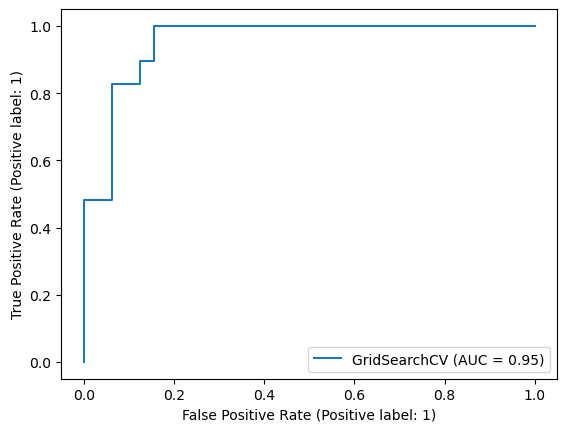

In [38]:
RocCurveDisplay.from_estimator(r_logreg, x_test, y_test);

In [39]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

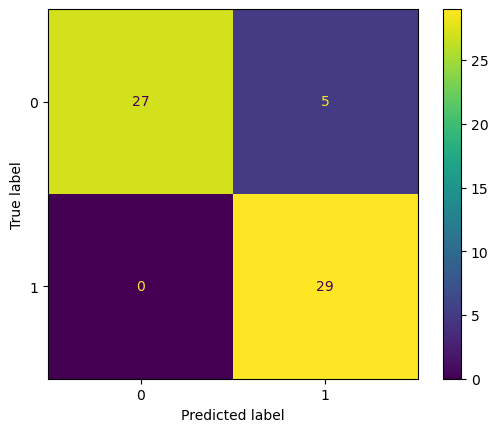

In [40]:
ConfusionMatrixDisplay.from_estimator(r_logreg, x_test, y_test)
plt.grid(False)

Model having no false negatives for predictions of heart disease is actually a good sign, because here false negatives could end up with more serious conclusions compared to false positives

In [41]:
print(classification_report(y_test, y_preds))

### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation using `cross_val_score()`

In [42]:
model = LogisticRegression(**r_logreg.best_params_)

In [43]:
# Cross-validated accuracy
cv_acc = cross_val_score(model, x, y, cv=5, scoring="accuracy")
cv_acc_mean = np.mean(cv_acc)
cv_acc_mean

0.8446994535519126

In [44]:
# Cross-validated precision
cv_precision = cross_val_score(model, x, y, cv=5, scoring="precision")
cv_precision_mean = np.mean(cv_precision)
cv_precision_mean

0.8209150326797385

In [45]:
# Cross-validated recall
cv_recall = cross_val_score(model, x, y, cv=5, scoring="recall")
cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0.9212121212121213

In [46]:
# Cross-validated f1-score
cv_f1 = cross_val_score(model, x, y, cv=5, scoring="accuracy")
cv_f1_mean = np.mean(cv_f1)
cv_f1_mean

0.8446994535519126

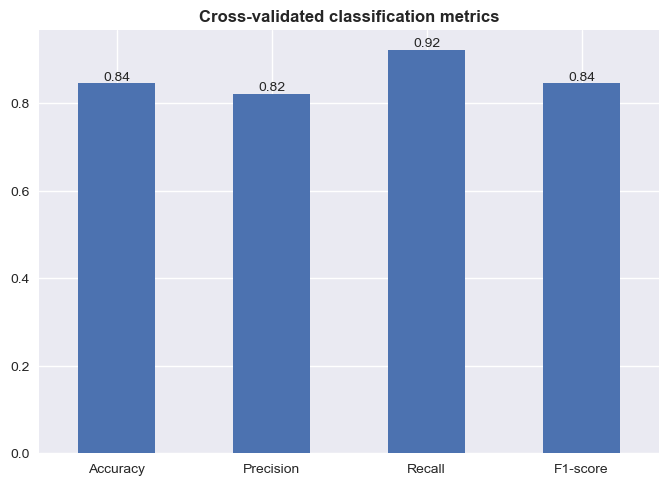

In [47]:
plt.style.use('seaborn-v0_8')
cv_metrics = pd.DataFrame({"Accuracy": cv_acc_mean,
                           "Precision": cv_precision_mean,
                           "Recall": cv_recall_mean,
                           "F1-score": cv_f1_mean},
                           index = [0])
ax = cv_metrics.T.plot.bar(legend=False,rot=0)
ax.set_title("Cross-validated classification metrics", fontweight="bold")
ax.bar_label(ax.containers[0], fmt='%.2f');

### Feature importance

Feature Importance refers to techniques that calculate a score for all the input features for a given model. 

To put it simply, fearture importance is another way of asking, "which features contribute most to the outcomes of the model?"

In [48]:
# Fit an instance of LogisticRegression
model = LogisticRegression(**r_logreg.best_params_)

model.fit(x_train, y_train);

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
model.coef_

array([[ 0.01012292, -1.0945567 ,  0.73084773, -0.01346064, -0.00320402,
        -0.05979294,  0.38562296,  0.02511649, -0.55286882, -0.40633913,
         0.49763463, -0.60618848, -0.61238153]])

In [51]:
feature_dict = dict(zip(df.columns, list(model.coef_[0])))
feature_dict

{'age': 0.010122916943558376,
 'sex': -1.094556699344203,
 'cp': 0.7308477271497313,
 'trestbps': -0.013460642267685372,
 'chol': -0.00320402283484997,
 'fbs': -0.059792940361638604,
 'restecg': 0.38562296088618364,
 'thalach': 0.025116487858016723,
 'exang': -0.552868817839145,
 'oldpeak': -0.4063391304816601,
 'slope': 0.4976346314825826,
 'ca': -0.606188480828847,
 'thal': -0.6123815324041836}

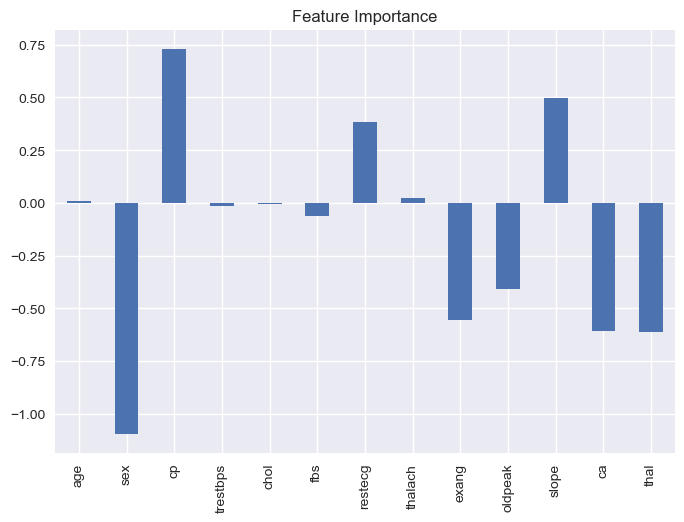

In [52]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index =[0])
feature_df.T.plot.bar(title="Feature Importance", legend =False);

### Save the model

In [53]:
pickle.dump(r_logreg, open("heart_disease_ML_model.pkl", "wb"))

In [54]:
# For future uses
model = pickle.load(open("heart_disease_ML_model.pkl", "rb"))